# Исследование объявлений о продаже квартир

В нашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. 

**Задача** - Установить параметры для определения рыночной стоимости объектов недвижимости. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

**Описание данных:**

* airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
* balcony — число балконов
* ceiling_height — высота потолков (м)
* cityCenters_nearest — расстояние до центра города (м)
* days_exposition — сколько дней было размещено объявление (от публикации до снятия)
* first_day_exposition — дата публикации
* floor — этаж
* floors_total — всего этажей в доме
* is_apartment — апартаменты (булев тип)
* kitchen_area — площадь кухни в квадратных метрах (м²)
* last_price — цена на момент снятия с публикации
* living_area — жилая площадь в квадратных метрах (м²)
* locality_name — название населённого пункта
* open_plan — свободная планировка (булев тип)
* parks_around3000 — число парков в радиусе 3 км
* parks_nearest — расстояние до ближайшего парка (м)
* ponds_around3000 — число водоёмов в радиусе 3 км
* ponds_nearest — расстояние до ближайшего водоёма (м)
* rooms — число комнат
* studio — квартира-студия (булев тип)
* total_area — общая площадь квартиры в квадратных метрах (м²)
* total_images — число фотографий квартиры в объявлении

**План работ:**

**[Шаг 1.](#section_1)** Обзор полученных данных.

**[Шаг 2.](#section_2)** Предобработка данных.
        
**[Шаг 3.](#section_3)** Анализ данных.
        
**[Шаг 4.](#section_4)** Общий вывод. Какие характеристики стоит учитывать для определения рыночной стоимости объектов недвижимости.

<a id='section_1'></a>
### Шаг 1. Обзор полученных данных.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random
import numpy as np

In [2]:
#загружаем данные
data = pd.read_csv('C:/Users/ratus/DATA_SCIENCE/итоговые проекты/1/data.csv', sep='\t')    

In [3]:
#Смотрим общую информацию по датафрейму
data.info()

#И смотрим первые 20 строчек датафрейма
data.head(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

total_images  last_price  total_area first_day_exposition  rooms  \
0             20  13000000.0      108.00  2019-03-07T00:00:00      3   
1              7   3350000.0       40.40  2018-12-04T00:00:00      1   
2             10   5196000.0       56.00  2015-08-20T00:00:00      2   
3              0  64900000.0      159.00  2015-07-24T00:00:00      3   
4              2  10000000.0      100.00  2018-06-19T00:00:00      2   
5             10   2890000.0       30.40  2018-09-10T00:00:00      1   
6              6   3700000.0       37.30  2017-11-02T00:00:00      1   
7              5   7915000.0       71.60  2019-04-18T00:00:00      2   
8             20   2900000.0       33.16  2018-05-23T00:00:00      1   
9             18   5400000.0       61.00  2017-02-26T00:00:00      3   
10             5   5050000.0       39.60  2017-11-16T00:00:00      1   
11             9   3300000.0       44.00  2018-08-27T00:00:00      2   
12            10   3890000.0       54.00  2016-06-30T00:00:00      2   
13            20   3550000.0       42.80  2017-07-01T00:00:00      2   
14             1   4400000.0       36.00  2016-06-23T00:00:00      1   
15            16   4650000.0       39.00  2017-11-18T00:00:00      1   
16            11   6700000.0       82.00  2017-11-23T00:00:00      3   
17             6   4180000.0       36.00  2016-09-09T00:00:00      1   
18             8   3250000.0       31.00  2017-01-27T00:00:00      1   
19            16  14200000.0      121.00  2019-01-09T00:00:00      3   

    ceiling_height  floors_total  living_area  floor is_apartment  ...  \
0             2.70          16.0        51.00      8          NaN  ...   
1              NaN          11.0        18.60      1          NaN  ...   
2              NaN           5.0        34.30      4          NaN  ...   
3              NaN          14.0          NaN      9          NaN  ...   
4             3.03          14.0        32.00     13          NaN  ...   
5              NaN          12.0        14.40      5          NaN  ...   
6              NaN          26.0        10.60      6          NaN  ...   
7              NaN          24.0          NaN     22          NaN  ...   
8              NaN          27.0        15.43     26          NaN  ...   
9             2.50           9.0        43.60      7          NaN  ...   
10            2.67          12.0        20.30      3          NaN  ...   
11             NaN           5.0        31.00      4        False  ...   
12             NaN           5.0        30.00      5          NaN  ...   
13            2.56           5.0        27.00      5          NaN  ...   
14             NaN           6.0        17.00      1          NaN  ...   
15             NaN          14.0        20.50      5          NaN  ...   
16            3.05           5.0        55.60      1          NaN  ...   
17             NaN          17.0        16.50      7          NaN  ...   
18            2.50           5.0        19.40      2          NaN  ...   
19            2.75          16.0        76.00      8          NaN  ...   

    kitchen_area  balcony              locality_name  airports_nearest  \
0          25.00      NaN            Санкт-Петербург           18863.0   
1          11.00      2.0             посёлок Шушары           12817.0   
2           8.30      0.0            Санкт-Петербург           21741.0   
3            NaN      0.0            Санкт-Петербург           28098.0   
4          41.00      NaN            Санкт-Петербург           31856.0   
5           9.10      NaN  городской посёлок Янино-1               NaN   
6          14.40      1.0          посёлок Парголово           52996.0   
7          18.90      2.0            Санкт-Петербург           23982.0   
8           8.81      NaN             посёлок Мурино               NaN   
9           6.50      2.0            Санкт-Петербург           50898.0   
10          8.50      NaN            Санкт-Петербург           38357.0   
11          6.00      1.0                  Ломон

В нашем датафрейме 22 столбца (колонок) и 23699 строк. 
* Нужно переименовать столбец `cityCenters`_nearest
* Столбец first_day_exposition надо будет преобразовать к типу datetime. 
* Нужно будет обратить внимание на столбец is_apartment, там очень много пропусков, и вижу есть False, и он заявлен как булев в описании, однако на данную минуту имеет тип object.
* по пропускам основательно посмотрим ниже

In [4]:
#Переименовываем столбец
data = data.rename(columns={'cityCenters_nearest':'city_center_nearest'})

Найдем количество пропущенных значений для каждого столбца датафрейма. Посмотрим по убыванию

In [5]:
def pass_value_barh(df):
    """
    Функция для отображения пропущенных значений в виде столбчатой диаграммы.
    Принимает на вход датафрейм df.
    """
    try:
        missing_values = (
            (df.isna().mean() * 100)
                .to_frame()
                .rename(columns={0: 'percent_isna'})
                .query('percent_isna > 0')
                .sort_values(by = 'percent_isna', ascending = True)
        )
        
        ax = missing_values.plot(kind='barh', figsize=(10, 5), legend=False, fontsize=12)
        ax.set_xlabel('Процент пропусков', fontsize=12)
        ax.set_ylabel('Название столбца', fontsize=12)
        ax.set_title('Процент пропущенных значений в столбцах датафрейма:', fontsize=14)
        ax.set_xlim(0, 100) 
    except Exception as e:
        print('Пропусков не осталось или произошла ошибка:', e)


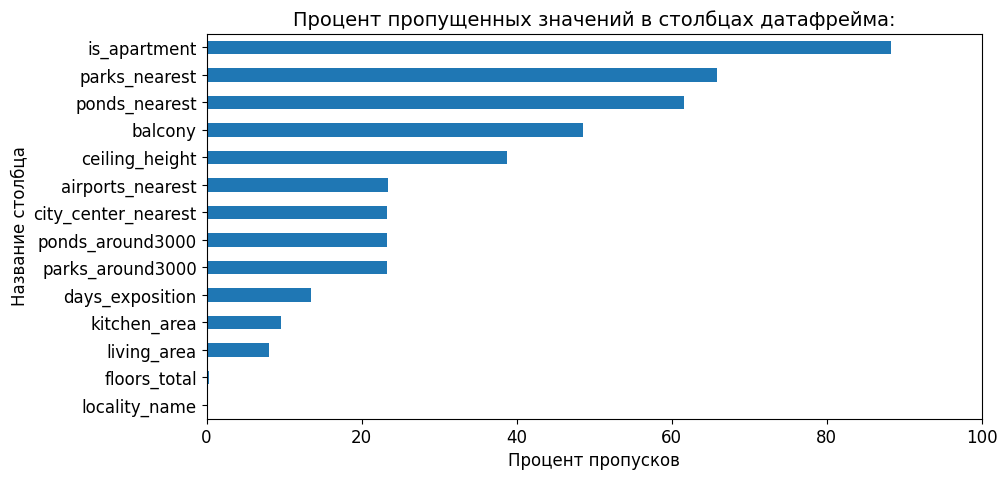

In [6]:
pass_value_barh(data)

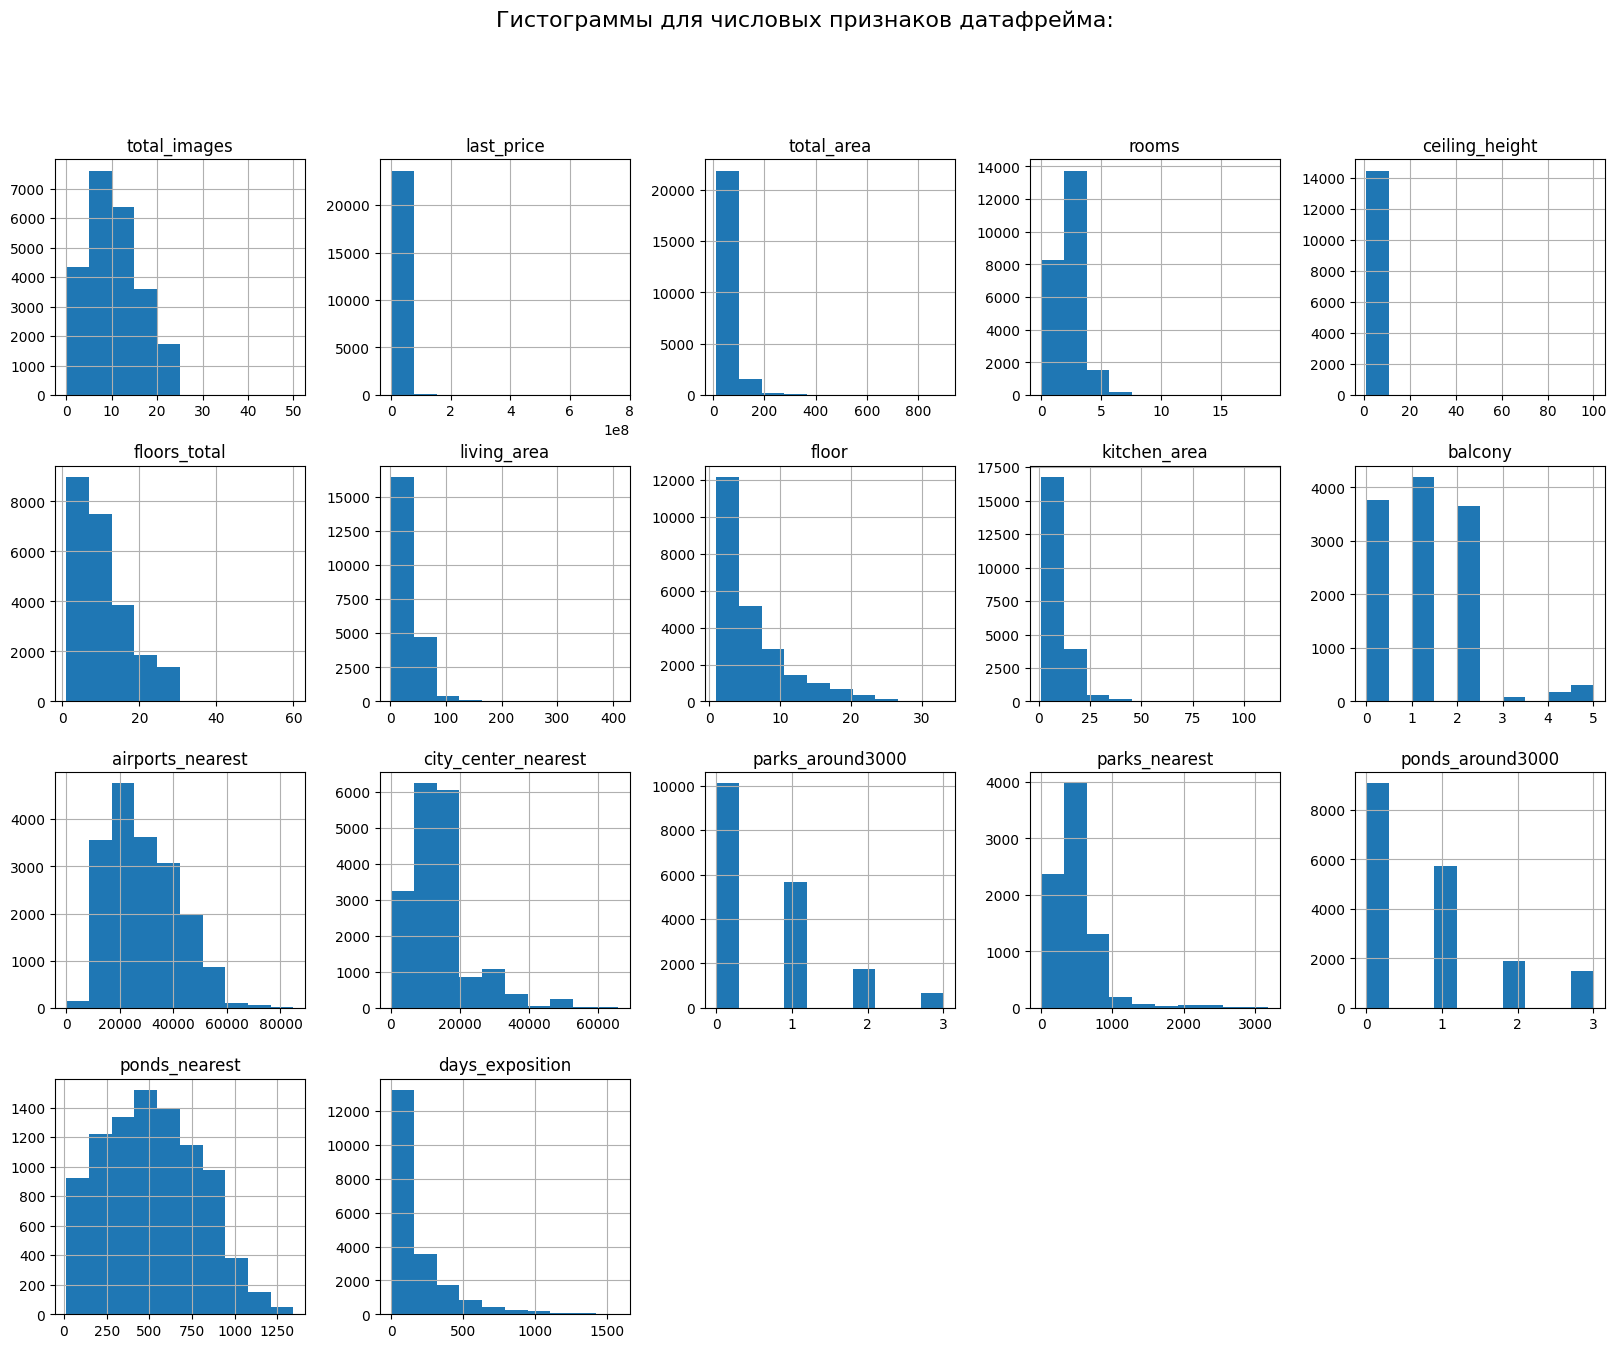

In [7]:
# Общая гистограмма для всех числовых столбцов таблицы
data.hist(figsize=(20, 15), layout=(4,5));
plt.suptitle('Гистограммы для числовых признаков датафрейма:', fontsize=16);

* По `total_images` (число фотографий квартиры в объявлении)- в целом нормальное распределение примерно от 0 до 20 фотографий в объявлении. Но видим также хвост из аномально больших значений
* По `last_price` (цена на момент снятия с публикации) - надо построить отдельно гистограмму, подобрав правильный масштаб. По текущей ничего не понятно. И опять же похоже есть большой хвост из аномальных значений 

**В следующих колонках есть аномальные значения:** 
* `total_images`
* `last_price`
* `total_area`
* `rooms` 
* `ceiling_height`
* `living_area` 
* `kitchen_area` 
* `days_exposition`

Пропуски есть во многих столбцах, посмотрим что можно будет с ними сделать. Хорошо что в одних из самых важных столбцов для задачи (цена, общая площадь, день размещения объявления, название населенного пункта и некот.др.) нет пропусков или их очень мало.

<a id='section_2'></a>
### Шаг 2. Предобработка данных

**1) Столбец `is_apartment`** содержит больше всего пропусков, и, как видно описания, должен быть булевым, но имеет тип object. Чтобы узнать что там внутри, посмотрим уникальные значения этого столбца и их количество:

In [8]:
data['is_apartment'].value_counts().to_frame()

is_apartment
False          2725
True             50

В столбце `is_apartment ` обнаружено самое большое количество пропусков 20924 из 23699а это составляет 88%, а также сами значения очень неравномерно распределены (значений False 2725, значений True 50). 

Из-за большого количества пропусков, столбец врядли пригоден для анализа.

Но можно рассмотреть предположение, что скорее всего пользователи просто забывали проставлять галочку является ли квартира апартаментом или нет. Если не указано, что квартира является апартаментом, то скорее всего она и не является им, и там должно быть значение False. Поэтому заменим эти пропуски на False, и заодно изменим тип столбца на булев, как и должен быть.

В любом случае либо попробуем использовать такой столбец, либо его надо удалять.

In [9]:
#Заменяем пропуски в столбце на False
data.loc[data['is_apartment'].isna(), 'is_apartment'] = False

#Меняем тип данных столбца на булев (bool)
data['is_apartment'] = data['is_apartment'].astype(bool)


**2) Столбцы `parks_nearest` и `parks_around3000`** Данные в этих столбцах заполняются автоматически, на основе картографических данных. Возможные причины пустых строк: неверное определение геопозиции к примеру из-за впн(если при обработке определяется геопозиция), либо ошибка записи/выгрузки данных. 

Пропусков в `park_nearest` очень много (>60%). Можно посмотреть, может есть случаи, для объекта недвижимости с пустым полем `park_nearest` задано значение `parks_around3000`>0 (т.е есть парк в радусе 3000м). Тогда можно хотя-бы 3км выставить вместо пропусков. 

In [10]:
print ('Количество таких строк = ', 
       data.query('parks_nearest.isna() and parks_around3000 > 0 ').shape[0])

Количество таких строк =  0


И наоборот проверим есть ли строки, в которых не было бы задано количество парков в округе, но было бы задано расстояние до ближайшего парка:

In [11]:
print ('Количество таких строк = ', 
       data.query('parks_around3000.isna() and parks_nearest >= 0 ').shape[0])

Количество таких строк =  0


Таких объектов недвижимости 0. Можно предположить, что случаях отсутствия значений в столбцах `parks_nearest` или `parks_around3000`, парка рядом с недвижимостью нет.

Пропуски в столбце `parks_nearest` оставим. Пропуски в `parks_around3000` заполним нулями,  и заодно поменяем тип столбца на целочисленный, так как количество парков не может быть дробным.

In [12]:
#Заменяем пропуски в столбцах
data.loc[data['parks_around3000'].isna(), 'parks_around3000'] = 0

#Меняем тип столбца
data['parks_around3000'] = data['parks_around3000'].astype(int)

#Проверяем что все пропуски заполнены
print (data['parks_around3000'].isna().sum())

0


Также посмотрим на редкие или аномальные значения в этих столбцах: 

In [13]:
# Уникальные значения столбцов и их количество
print (data['parks_nearest'].value_counts(),'\n')
print (data['parks_around3000'].value_counts(),'\n')

441.0     67
392.0     41
173.0     41
456.0     40
471.0     32
          ..
2489.0     1
786.0      1
793.0      1
92.0       1
929.0      1
Name: parks_nearest, Length: 995, dtype: int64 

0    15624
1     5681
2     1747
3      647
Name: parks_around3000, dtype: int64 



В столбце `parks_around3000` уже по уникальным элементам понятно, что нет редких или выбивающихся значений. Для столбца `parks_nearest` округлим значения до первого знака после запятой, и посмотрим характеристики, гистограмму и 99 процентиль:

In [14]:
def hist_column(df, column_name, **kwargs):
    """
    Функция, которая будет для столбца строить гистограмму
    В качестве первого аргумента принимает датафрейм, 
    в качестве второго название столбца, 
    через kwargs можно передать многие параметры для отображения гистограммы.
    """
    df[column_name].hist(**kwargs)
    plt.xlabel(column_name);
    plt.ylabel('count');
    plt.show()

count    8079.0
mean      490.8
std       342.3
min         1.0
25%       288.0
50%       455.0
75%       612.0
max      3190.0
Name: parks_nearest, dtype: float64 

99 процентиль =  2102.0


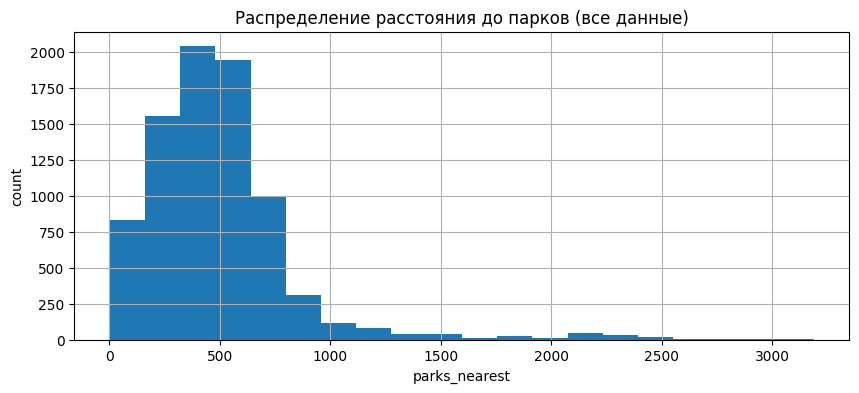

In [15]:
#Округляем до первого знака после запятой
data['parks_nearest'] = round(data['parks_nearest'],1)

#смотрим описание характеристик
print (round(data['parks_nearest'].describe(),1),'\n')

#99 процентиль:
print ('99 процентиль = ', data['parks_nearest'].quantile(.99))

#гистограмма:
plt.title('Распределение расстояния до парков (все данные)')
hist_column(
    data,'parks_nearest',
    figsize = (10,4), bins = 20
)

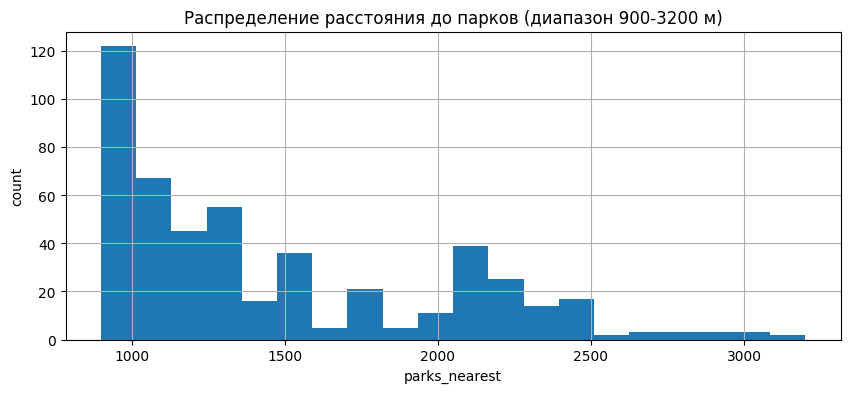

In [16]:
plt.title('Распределение расстояния до парков (диапазон 900-3200 м)')
hist_column(
    data,'parks_nearest',
    figsize = (10,4), range =(900,3200), bins = 20,
)


Уберем из анализа редко встречающиеся значения >2500 (заменим их пропусками):

In [17]:
#Заполняем пустыми значениями
data.loc[data['parks_nearest']>2500,'parks_nearest'] = None

#Выводим сколько теперь пустых значений
print (data['parks_nearest'].isna().sum())

15636


**3) Посмотрим столбцы `ponds_nearest` и `ponds_around3000`** Аналогично данные в этих столбцах заполняются автоматически, на основе картографических данных. Возможные причины пустых строк: неверное определение геопозиции к примеру из-за впн(если при обработке определяется геопозиция), либо ошибка записи/выгрузки данных.

Заметно, что чаще отсутсвуют данные по расстоянию до водоема (или в прошлом случае до парка), чем данные о том есть ли водоем/парк в радиусе 3км. Проверим аналогично предыдущему пункту есть ли случаи, когда для объекта недвижимости с пустым полем `ponds_nearest` задано значение `ponds_around3000`>0 (т.е. есть водоем в радиусе 3000м) или наоборот. 

In [18]:
print ('Количество таких строк = ', 
       data.query('ponds_nearest.isna() and ponds_around3000 > 0 ').shape[0])

print ('Количество таких строк = ', 
       data.query('ponds_around3000.isna() and ponds_nearest >= 0 ').shape[0])

Количество таких строк =  0
Количество таких строк =  0


Таких объектов недвижимости 0. Можно предположить, что случаях отсутствия значений в столбцах `ponds_nearest` или `ponds_around3000`, водоема рядом с недвижимостью нет.

Пропуски в столбце `ponds_nearest` оставим. Пропуски в `ponds_around3000` можно заполнить на нули, и заодно поменяем тип столбца на целочисленный, так как количество водоемов не может быть дробным.

In [19]:
#Заменяем пропуски
data.loc[data['ponds_around3000'].isna(),'ponds_around3000'] = 0

#Меняем тип столбца
data['ponds_around3000'] = data['ponds_around3000'].astype(int)

#Проверяем что все пропуски заполнены
print (data['ponds_around3000'].isna().sum())

0


Также посмотрим на редкие или аномальные значения в этих столбцах: 

In [20]:
# Уникальные значения столбцов и их количество
print (data['ponds_nearest'].value_counts(),'\n')
print (data['ponds_around3000'].value_counts(),'\n')

427.0     70
454.0     41
153.0     40
433.0     39
564.0     37
          ..
1075.0     1
74.0       1
1236.0     1
395.0      1
995.0      1
Name: ponds_nearest, Length: 1096, dtype: int64 

0    14589
1     5717
2     1892
3     1501
Name: ponds_around3000, dtype: int64 



В столбце `ponds_around3000` уже по уникальным элементам понятно, что нет редких или выбивающихся значений. Для столбца `ponds_nearest` округлим значения до первого знака после запятой, и посмотрим характеристики, гистограмму и 99 процентиль:

count    9110.0
mean      518.0
std       277.7
min        13.0
25%       294.0
50%       502.0
75%       729.0
max      1344.0
Name: ponds_nearest, dtype: float64 



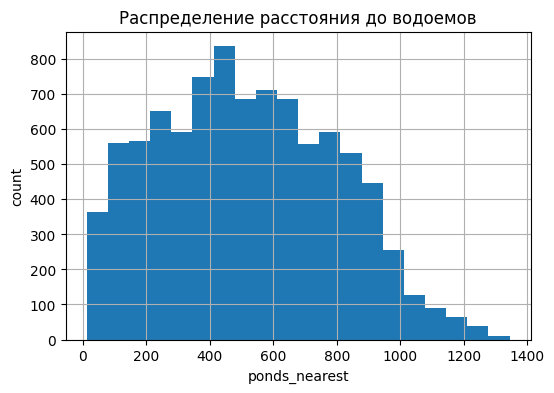

99 процентиль =  1159.0


In [21]:
#Округляем до первого знака после запятой
data['ponds_nearest'] = round(data['ponds_nearest'],1)

#смотрим описание характеристик
print (round(data['ponds_nearest'].describe(),1),'\n')

#гистограмма:
plt.title('Распределение расстояния до водоемов')
hist_column(data,'ponds_nearest',figsize = (6,4), bins = 20)

#99 процентиль:
print ('99 процентиль = ', data['ponds_nearest'].quantile(.99))

Уберем из анализа редко встречающиеся значения >1150 (заменим их пропусками):

In [22]:
#Заполняем пустыми значениями все строки где больше 40
data.loc[data['ponds_nearest']>1150,'ponds_nearest'] = None

#Выводим сколько теперь пустых значений
print (data['ponds_nearest'].isna().sum())


14700


**4) Столбец `balcony`** Можно предположить, что если в объекте недвижимости, пользователь не указал число балконов, то их скорее всего нет. Поэтому заменим пустые строки на нули, и поменяем тип столбца на целочисленный, так как количество балконов не может быть дробным

In [23]:
#Заменяем пропуски в столбце 
data.loc[data['balcony'].isna(), 'balcony'] = 0

#Меняем тип столбца
data['balcony'] = data['balcony'].astype(int)


**5) Столбец `locality_name`** Отсутствие записей в этом столбце может быть обусловлено человеческим фактором или ошибкой записи/выгрузки данных. Пропуски в этом столбце можно заменить, ориентируясь на столбец расстояния до центра города. Посмотрим есть ли строки с пропусками населенного пункта, для которых известно расстояние до центра города: 

In [24]:
print ('Количество строк = ' , 
       data.query('locality_name.isna() and (not city_center_nearest.isna())').shape[0],
       '\n')

Количество строк =  41 



А всего пропусков 49, т.е. скорей всего большую часть пустых строк удастся заполнить.  Для строк с пустыми значениями, в которых расстояние до центра города соответсвует Спб, заменим пропуски на 'Санкт-Петербург'. Остальные строки с пропусками удалим.

In [25]:
#Подтаблица со строками, где название населенного пункта указано Спб:
spb_data = data.loc[
    ~(data['locality_name'].isna())
    &
    (data['locality_name'].str.contains('анкт')) 
]

#Характеристики для расстояния от центра города
spb_centre_nearest_desc = spb_data['city_center_nearest'].describe()

#Индексы строк с пустым значением local_name,
#у кот. расстояние до центра города соответствует Спб 
index_row = data.loc[
    (data['locality_name'].isna())
    &
    (data['city_center_nearest'] > spb_centre_nearest_desc['min'])
    &
    (data['city_center_nearest'] < spb_centre_nearest_desc['max'])
].index

#заполняем эти пропуски:
data.loc[index_row,'locality_name'] = 'Санкт-Петербург'

# Оставшиеся строки с пропусками удаляем
index_names = data.loc[data['locality_name'].isna()].index
data.drop(index_names, inplace = True)

#Обновим индексацию датафрейма
data.reset_index(drop=True, inplace= True)

#Проверяем все ли пропуски заполнились
print (data['locality_name'].isna().sum())

0


Обработаем неявные дуликаты в этом столбце:

In [26]:
#Список уникальных имен столбца:
print (data['locality_name'].sort_values().unique(),'\n')

#Количество уникальных имен
count_locality_uniq_name = len(data['locality_name'].unique())
print ('Количество уникальных имен = ',count_locality_uniq_name ,'\n')

#Частота появления уникальных имен
print (data['locality_name'].value_counts().head(20),'\n')

['Бокситогорск' 'Волосово' 'Волхов' 'Всеволожск' 'Выборг' 'Высоцк'
 'Гатчина' 'Зеленогорск' 'Ивангород' 'Каменногорск' 'Кингисепп' 'Кириши'
 'Кировск' 'Колпино' 'Коммунар' 'Красное Село' 'Кронштадт' 'Кудрово'
 'Лодейное Поле' 'Ломоносов' 'Луга' 'Любань' 'Мурино' 'Никольское'
 'Новая Ладога' 'Отрадное' 'Павловск' 'Петергоф' 'Пикалёво' 'Подпорожье'
 'Приморск' 'Приозерск' 'Пушкин' 'Санкт-Петербург' 'Светогорск'
 'Сертолово' 'Сестрорецк' 'Сланцы' 'Сосновый Бор' 'Сясьстрой' 'Тихвин'
 'Тосно' 'Шлиссельбург' 'городской поселок Большая Ижора'
 'городской поселок Янино-1' 'городской посёлок Будогощь'
 'городской посёлок Виллози' 'городской посёлок Лесогорский'
 'городской посёлок Мга' 'городской посёлок Назия'
 'городской посёлок Новоселье' 'городской посёлок Павлово'
 'городской посёлок Рощино' 'городской посёлок Свирьстрой'
 'городской посёлок Советский' 'городской посёлок Фёдоровское'
 'городской посёлок Янино-1' 'деревня Агалатово' 'деревня Аро'
 'деревня Батово' 'деревня Бегуницы' 'деревн

In [27]:
# Прикинем много ли неявных дубликатов среди нескольких населенных пунктов
print ('Количество строк, содержащих \'анкт\' ', data['locality_name'].str.contains('анкт').sum())
print ('Количество строк, содержащих \'Мур\' ', data['locality_name'].str.contains('Мур').sum())
print ('Количество строк, содержащих \'волож\' ', data['locality_name'].str.contains('волож').sum())
print ('Количество строк, содержащих \'лпин\' ', data['locality_name'].str.contains('лпин').sum())
print ('Количество строк, содержащих \'сное\' ', data['locality_name'].str.contains('сное').sum())
print ('Количество строк, содержащих \'ириш\' ', data['locality_name'].str.contains('ириш').sum())
print ('Количество строк, содержащих \'лхов\' ', data['locality_name'].str.contains('лхов').sum())

Количество строк, содержащих 'анкт'  15759
Количество строк, содержащих 'Мур'  590
Количество строк, содержащих 'волож'  398
Количество строк, содержащих 'лпин'  338
Количество строк, содержащих 'сное'  181
Количество строк, содержащих 'ириш'  125
Количество строк, содержащих 'лхов'  111


Видим есть неявные дубликаты например 'Мурино' 'поселок Мурино' и посёлок Мурино. Вроде не так уж и часто встречаются неявные дубликаты, можно было бы наверное и оставить их. Но если нам важен будет анализ малых группы из разряда деревень, то там количество дубликатов может ощущаться сильнее и искажать результаты, плюс в нашем учебном проекте нас просили их обработать, поэтому обработаем. 
Оставим в элементах столбца `locality_name` только главную часть - слова, написанные с большой буквы, которые как раз отвечают за название населенного пункта.

In [28]:
def make_short_name(l_name): 
    """
    Функция для получения укороченного названия, 
    в качестве параметра передается строка с названием
    """
    try:
        #разбиваем строки на слова
        split_name = l_name.split()
        name = []    
        
        for word in split_name:
        #если слово начинается с большой буквы, 
        #добавляем его в промежуточную переменную name
            if word[0].isupper(): 
                name.append(word)
                
        #Бывают несколько слов с большой буквы, 
        #поэтому важно потом склеить в нормальный вид название
        return ' '.join(name)
        
    except:
        print ('error in row', l_name)
    

#Укорачиваем все названия, тем самым убирая неявные дубликаты
data['locality_name'] = data['locality_name'].apply(make_short_name)

#Сравним изменилось ли количество уникальных значений в столбце
print ('Past count = ',count_locality_uniq_name, 'New count = ', 
       len(data['locality_name'].unique()))

Past count =  364 New count =  305


Изначально количество встречающихся названий населенных пуктов было 364, после удаления неявных дубликатов стало 305

In [29]:
# check
data.locality_name.nunique()

305

**6) Столбец city_center_nearest** Данные в этом столбце были заполнены автоматически, на основе картографических данных. Возможные причины пустых строк: неверное определение геопозиции к примеру из-за впн(если при обработке определяется геопозиция), либо ошибка записи/выгрузки данных.

Пустые значения пока оставим. 

Уберем аномальные редко встречающиеся значения:

8460.0     61
20802.0    32
10720.0    30
20444.0    27
8434.0     27
           ..
11575.0     1
3205.0      1
12747.0     1
8767.0      1
4234.0      1
Name: city_center_nearest, Length: 7639, dtype: int64 

count    18177.000000
mean     14187.843263
std       8604.753739
min        181.000000
25%       9238.000000
50%      13095.000000
75%      16293.000000
max      65968.000000
Name: city_center_nearest, dtype: float64 

99 процентиль =  50064.72


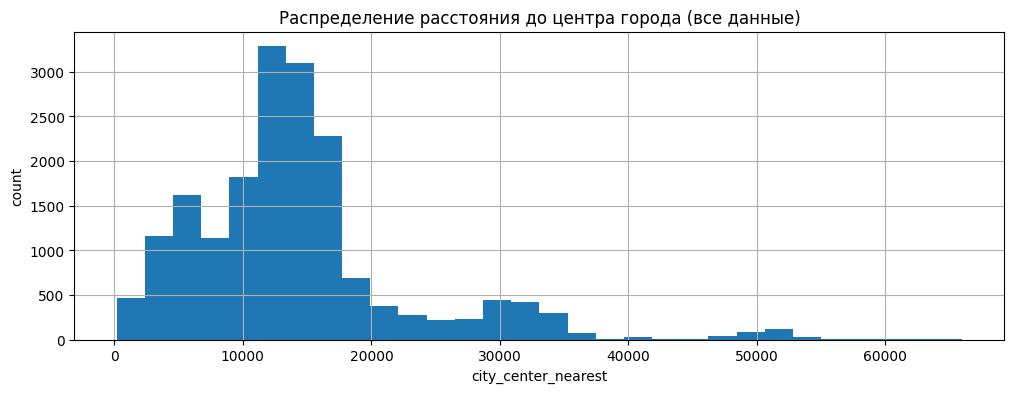

In [30]:
# Уникальные значения столбца и их количество
print (data['city_center_nearest'].value_counts(),'\n')

#смотрим описание характеристик
print (data['city_center_nearest'].describe(),'\n')

#99 процентиль:
print ('99 процентиль = ', data['city_center_nearest'].quantile(.99))

#Строим гистограмму
plt.title('Распределение расстояния до центра города (все данные)')
hist_column(data,'city_center_nearest',figsize = (12,4), bins = 30)


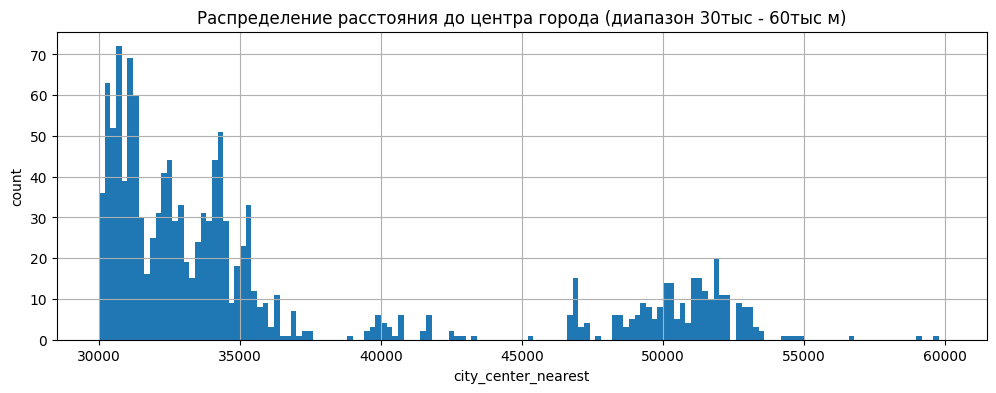

In [31]:
plt.title('Распределение расстояния до центра города (диапазон 30тыс - 60тыс м)')
hist_column(data,'city_center_nearest',figsize = (12,4), range =(30000,60000), bins = 150)

Округлим значения в столбце до первого знака после запятой, и заполним пустыми строками редкие значения > 55000

In [32]:
#Округляем
data['city_center_nearest'] = round(data['city_center_nearest'],1)

#Заполняем пустыми значениями 
data.loc[data['city_center_nearest']>55000,'city_center_nearest'] = None

#Смотрим теперь количество пропусков
print (data['city_center_nearest'].isna().sum())


5523


**7) Столбец airports_nearest** Данные в этом столбце заполняются автоматически, на основе картографических данных. Возможные причины пустых строк: неверное определение геопозиции к примеру из-за впн(если при обработке определяется геопозиция), либо ошибка записи/выгрузки данных. 

Для всех населенных пунктов, кроме самого города Спб, можно попытаться заменить пропуски средним значением, соотвествующему населенному пункту. Кроме самого города, так как направление расположения квартиры относительно аэропорта в рамках города неизвестно, и ошибка может быть велика (в силу того что от одного края города до другого несколько десятков километров). 

Посмотрим много ли таких пустых строк, в объектах недвижимости из области, также посмотрим столбец на редкие выбиващиеся или аномальные значения:

37434.0    61
21928.0    32
44870.0    30
39946.0    30
37407.0    27
           ..
53478.0     1
20335.0     1
33699.0     1
26945.0     1
20875.0     1
Name: airports_nearest, Length: 8272, dtype: int64 

count    18154.000000
mean     28792.944145
std      12629.413445
min          0.000000
25%      18582.750000
50%      26726.000000
75%      37273.000000
max      84869.000000
Name: airports_nearest, dtype: float64 

99 процентиль =  58493.850000000064


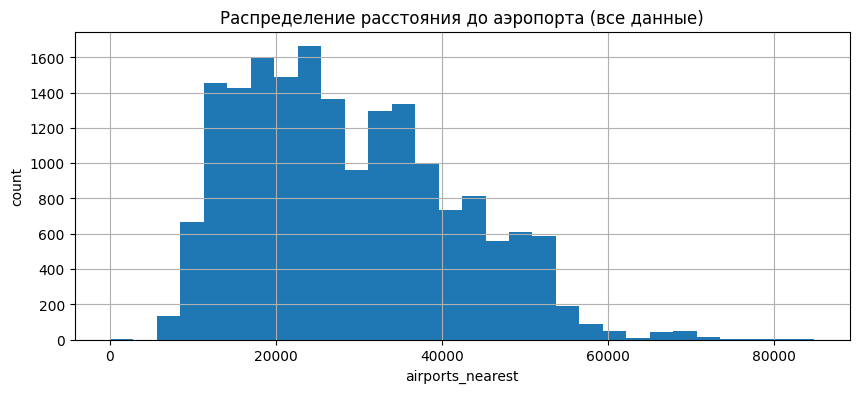

In [33]:
# Уникальные значения столбца и их количество
print (data['airports_nearest'].value_counts(),'\n')

#смотрим описание характеристик
print (data['airports_nearest'].describe(),'\n')

#99 процентиль:
print ('99 процентиль = ', data['airports_nearest'].quantile(.99))

#Строим гистограмму
plt.title('Распределение расстояния до аэропорта (все данные)')
hist_column(data,'airports_nearest',figsize = (10,4), bins = 30)

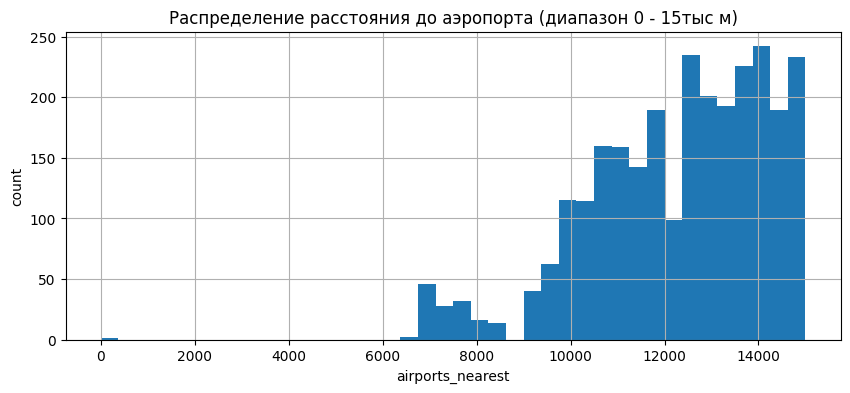

In [34]:
plt.title('Распределение расстояния до аэропорта (диапазон 0 - 15тыс м)')
hist_column(data,'airports_nearest',figsize = (10,4), range =(0,15000), bins = 40)

Округлим значения до ближайших целых чисел, оставив один знак после запятой. Есть аномальные, редко встречающиеся значения больше 60000 или меньше 6000, заполним их пустыми строками.

In [35]:
#Округляем до первого знака после запятой
data['airports_nearest'] = round(data['airports_nearest'],1)

#Заполняем пустыми значениями все строки где больше 40
data.loc[
    (data['airports_nearest']>60000)
    |
    (data['airports_nearest']<6000)
    ,'airports_nearest'] = None

print (data['airports_nearest'].isna().sum())

5708


In [36]:
#кол-во квартир из области, у которых пропуск в поле airports_nearest
print ('Количество объектов недвижимости = ' , 
       data.query(
           'airports_nearest.isna() and locality_name !="Санкт-Петербург"'
       ).shape[0],'\n')

Количество объектов недвижимости =  5622 



Таких объектов ,большинство. Для всех таких населенных пунктов (из области), заменим пропуски средним значением, соотвествующим населенному пункту. Например пропуски в строке с названием населенного пункта Щеглово, будут заполнены средним расстоянием до аэропорта, соответственным Щеглово. 

In [37]:
for el in data['locality_name'].unique():

    try:
        #Создаем подтаблицу для нас.пункта el, собирая туда все строки,
        #где определены расстояния до аэропорта
        airports_nearest_el = data.query('locality_name == @el and not airports_nearest.isna()')
        
        #Заполняем пустые строки таблицы средним по подтаблице airports_nearest_el
        data.loc[
            (data['locality_name'] == el) 
            & 
            (data['airports_nearest'].isna())
            , 'airports_nearest'] =  airports_nearest_el['airports_nearest'].mean()
  
    except:
        print ('i cant')

# проверяем, заполнились ли пропуски
print(data['airports_nearest'].isna().sum())

4982


Относительно количества пропусков, заполнилась не такая уж большая часть (5707-4982 = 725). Похоже есть много населенных пунктов, где ни для одного объекта недвижимости не указано расстояние до аэропорта. Посмотрим количество таких населенных пунктов:

In [38]:
#Создаем список, куда будем помещать названия населенных пунктов, 
#в которых нет ни одной квартиры с указанным airports_nearest 
locality_name_list1 =[]

for el in data['locality_name'].unique():
    #Если есть такая подтаблица для строк с названием el, 
    #в которой все значения airports_nearest пустые,
    #добавляем название el в список locality_name_list1
    count_null_row = data.query('locality_name == @el')['airports_nearest'].isna().sum()
    count_value_row = data.query('locality_name == @el').shape[0]
    if(count_value_row - count_null_row) == 0:
        locality_name_list1.append(el)

print ('Общее кол-во населенных пунктов',len(data['locality_name'].unique()),'\n\n',
       'Кол-во нас. пунктов, где во всех объектах недвижимости не заданы расстояния до эропорта', 
       len(locality_name_list1),'\n\n',
       'Список этих населенных пунктов:', sorted(locality_name_list1),'\n')

Общее кол-во населенных пунктов 305 

 Кол-во нас. пунктов, где во всех объектах недвижимости не заданы расстояния до эропорта 283 

 Список этих населенных пунктов: ['Агалатово', 'Алексеевка', 'Аннино', 'Аро', 'Барышево', 'Батово', 'Бегуницы', 'Белогорка', 'Бокситогорск', 'Большая Вруда', 'Большая Ижора', 'Большая Пустомержа', 'Большие Колпаны', 'Большое Рейзино', 'Большой Сабск', 'Бор', 'Борисова Грива', 'Бугры', 'Будогощь', 'Ваганово', 'Важины', 'Вартемяги', 'Вахнова Кара', 'Вещево', 'Виллози', 'Вознесенье', 'Возрождение', 'Войсковицы', 'Войскорово', 'Володарское', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг', 'Вырица', 'Выскатка', 'Высокоключевой', 'Высоцк', 'Гаврилово', 'Гарболово', 'Гатчина', 'Гладкое', 'Глажево', 'Глебычево', 'Глинка', 'Гончарово', 'Горбунки', 'Гостилицы', 'Громово', 'Дзержинского', 'Дружная Горка', 'Дружноселье', 'Дубровка', 'Елизаветино', 'Ефимовский', 'Жилгородок', 'Жилпосёлок', 'Житково', 'Заводской', 'Заклинье', 'Заневка', 'Запорожское', 'Зеленогорск', 'Зим

Можно предположить, что для этих же населенных пунктов и не указаны как раз данные других автоматически заполняющихся столбцов типа  parks_nearest, ponds_nearest и др. Проверим на примере parks_nearest

In [39]:
for el in locality_name_list1:
    
        count_null_row = data.query('locality_name == @el')['parks_nearest'].isna().sum()
        count_value_row = data.query('locality_name == @el').shape[0]
        
        if(count_value_row - count_null_row) > 0:
            print('Нас. пункты, в кот. есть объекты недвижимости с указанным пар-том parks_nearest',el)
            print (display(data.query('locality_name == @el').head()))

Нас. пункты, в кот. есть объекты недвижимости с указанным пар-том parks_nearest Кронштадт


total_images  last_price  total_area first_day_exposition  rooms  \
72             10   4500000.0        55.0  2018-12-09T00:00:00      2   
120            11   2500000.0        30.9  2017-10-20T00:00:00      1   
594             9   4640000.0        64.0  2018-03-06T00:00:00      3   
654             6   2750000.0        36.0  2017-04-18T00:00:00      1   
885             9   8200000.0        96.0  2018-07-23T00:00:00      3   

     ceiling_height  floors_total  living_area  floor  is_apartment  ...  \
72             2.70           3.0         35.5      2         False  ...   
120            2.75           5.0         16.7      1         False  ...   
594            2.50           9.0         42.0      1         False  ...   
654             NaN           5.0         20.5      5         False  ...   
885            3.62           3.0         61.6      3         False  ...   

     kitchen_area  balcony  locality_name  airports_nearest  \
72            7.5        1      Кронштадт               NaN   
120           6.0        0      Кронштадт               NaN   
594          10.0        0      Кронштадт               NaN   
654           7.8        4      Кронштадт               NaN   
885           8.5        0      Кронштадт               NaN   

    city_center_nearest  parks_around3000  parks_nearest  ponds_around3000  \
72              49984.0                 3          167.0                 3   
120             50722.0                 1          285.0                 2   
594             46918.0                 1          464.0                 1   
654             51511.0                 2           52.0                 3   
885             51415.0                 3           87.0                 3   

     ponds_nearest  days_exposition  
72           118.0            141.0  
120          221.0            360.0  
594          422.0            139.0  
654          313.0            381.0  
885          412.0              NaN  

[5 rows x 22 columns]

None
Нас. пункты, в кот. есть объекты недвижимости с указанным пар-том parks_nearest Зеленогорск


total_images  last_price  total_area first_day_exposition  rooms  \
302              6   3500000.0        31.0  2016-04-05T00:00:00      1   
376             18   8400000.0        84.0  2018-06-26T00:00:00      2   
939             17   3015000.0        31.2  2019-04-16T00:00:00      1   
2035            19   6100000.0        50.0  2018-03-24T00:00:00      2   
2973            13   3200000.0        46.3  2018-03-31T00:00:00      2   

      ceiling_height  floors_total  living_area  floor  is_apartment  ...  \
302             2.55           5.0         17.5      1         False  ...   
376             2.75           3.0         41.0      1         False  ...   
939             2.50           3.0         17.5      1         False  ...   
2035            2.60           5.0         29.0      5         False  ...   
2973            2.50           3.0         29.2      2         False  ...   

      kitchen_area  balcony  locality_name  airports_nearest  \
302            5.4        0    Зеленогорск               NaN   
376           13.0        0    Зеленогорск               NaN   
939            5.8        0    Зеленогорск               NaN   
2035           9.0        1    Зеленогорск               NaN   
2973           7.0        1    Зеленогорск               NaN   

     city_center_nearest  parks_around3000  parks_nearest  ponds_around3000  \
302              53104.0                 3           92.0                 1   
376              54926.0                 0            NaN                 0   
939                  NaN                 0            NaN                 1   
2035             52717.0                 3           37.0                 1   
2973                 NaN                 0            NaN                 0   

      ponds_nearest  days_exposition  
302           571.0            168.0  
376             NaN            201.0  
939           347.0              NaN  
2035          926.0             72.0  
2973            NaN            205.0  

[5 rows x 22 columns]

None


Пока гипотеза подтверждается практически для всех населенных пунктов из списка locality_name_list1. Выберем еще к примеру три случайных населенных пункта из списка locality_name_list1. и посмотрим несколько строк из таблиц с ними:

In [40]:
#Выберем случайно три названия населенных пунктов из списка
locality_name_randomlist = random.sample(locality_name_list1, 3)

for el in locality_name_randomlist:
    print (display(
        data.query('locality_name == @el and parks_nearest.isna()').head()
    ))

total_images  last_price  total_area first_day_exposition  rooms  \
920               7   1750000.0        31.0  2018-11-12T00:00:00      1   
3411             11   1650000.0        31.0  2017-04-09T00:00:00      1   
11988             8   2400000.0        49.0  2018-12-10T00:00:00      2   
19128             7   1400000.0        29.4  2019-02-11T00:00:00      1   

       ceiling_height  floors_total  living_area  floor  is_apartment  ...  \
920              2.50           5.0         17.0      5         False  ...   
3411             2.55           2.0         17.0      1         False  ...   
11988             NaN           5.0         29.0      5         False  ...   
19128             NaN           2.0         16.3      1         False  ...   

       kitchen_area  balcony  locality_name  airports_nearest  \
920             5.0        0         Келози               NaN   
3411            5.0        0         Келози               NaN   
11988           8.0        0         Келози               NaN   
19128           6.2        0         Келози               NaN   

      city_center_nearest  parks_around3000  parks_nearest  ponds_around3000  \
920                   NaN                 0            NaN                 0   
3411                  NaN                 0            NaN                 0   
11988                 NaN                 0            NaN                 0   
19128                 NaN                 0            NaN                 0   

       ponds_nearest  days_exposition  
920              NaN            114.0  
3411             NaN            102.0  
11988            NaN              NaN  
19128            NaN             42.0  

[4 rows x 22 columns]

None


total_images  last_price  total_area first_day_exposition  rooms  \
15626            18    900000.0        60.0  2018-06-27T00:00:00      3   

       ceiling_height  floors_total  living_area  floor  is_apartment  ...  \
15626             NaN           3.0          NaN      1         False  ...   

       kitchen_area  balcony  locality_name  airports_nearest  \
15626           NaN        0        Лужайка               NaN   

      city_center_nearest  parks_around3000  parks_nearest  ponds_around3000  \
15626                 NaN                 0            NaN                 0   

       ponds_nearest  days_exposition  
15626            NaN             57.0  

[1 rows x 22 columns]

None


total_images  last_price  total_area first_day_exposition  rooms  \
1902              5   2500000.0        39.0  2015-12-17T00:00:00      1   
7269              2   2400000.0        51.7  2017-09-12T00:00:00      2   
7424              9   2350000.0        35.0  2017-09-28T00:00:00      1   
8875             20   3100000.0        54.2  2017-04-14T00:00:00      2   
11636             1   3500000.0        65.5  2018-01-17T00:00:00      3   

       ceiling_height  floors_total  living_area  floor  is_apartment  ...  \
1902              NaN           4.0         18.0      3         False  ...   
7269              2.4           6.0         29.7      3         False  ...   
7424              NaN           5.0         18.0      1         False  ...   
8875              NaN           5.0         30.0      3         False  ...   
11636             2.5           5.0          NaN      3         False  ...   

       kitchen_area  balcony  locality_name  airports_nearest  \
1902            9.0        0   Малое Верево               NaN   
7269            8.2        1   Малое Верево               NaN   
7424            7.1        0   Малое Верево               NaN   
8875            8.4        0   Малое Верево               NaN   
11636           NaN        0   Малое Верево               NaN   

      city_center_nearest  parks_around3000  parks_nearest  ponds_around3000  \
1902                  NaN                 0            NaN                 0   
7269                  NaN                 0            NaN                 0   
7424                  NaN                 0            NaN                 0   
8875                  NaN                 0            NaN                 0   
11636                 NaN                 0            NaN                 0   

       ponds_nearest  days_exposition  
1902             NaN            279.0  
7269             NaN             42.0  
7424             NaN            117.0  
8875             NaN            163.0  
11636            NaN            314.0  

[5 rows x 22 columns]

None


 Оказалось что действительно во всех колонках, которые заполнялись автоматически на основе картографических данных - пусто! 
    
Похоже гипотеза верна. Для полного подтверждения, при необходимости, надо дополнительно проанализировать данные. В виду ограниченности времени, и того факта, что это не является целью текущей задачи, этот анализ дальше проводится не стал. 
    
Оставшиеся пропуски в данном столбце оставим. Идей для заполнения нет.

**8) Столбец `ceiling_height`** Пропуски в этом столбце могут быть обусловлены тем, что клиент не захотел/забыл указать эти данные. Можно заполнить пропуски в этих данных медианным значением, только вот у нас в этом столбце встречались аномально большие данные. Посмотрим:

2.50     3515
2.60     1645
2.70     1573
3.00     1112
2.80      993
         ... 
4.25        1
3.39        1
3.93        1
10.30       1
4.65        1
Name: ceiling_height, Length: 183, dtype: int64 

count    14502.000000
mean         2.771516
std          1.261142
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64 

99 процентиль =  3.829899999999998


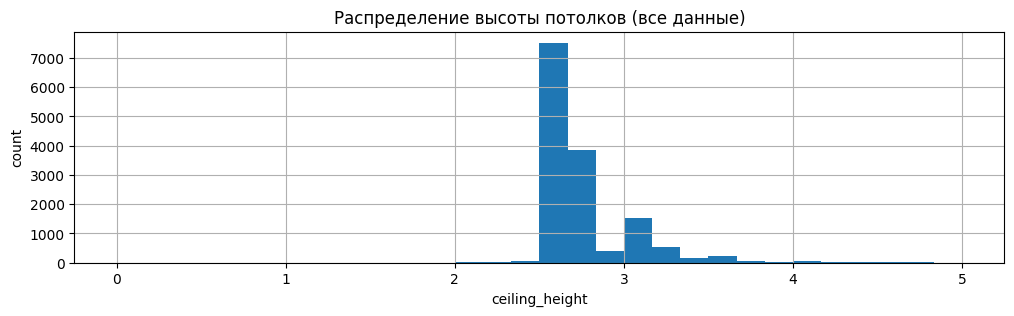

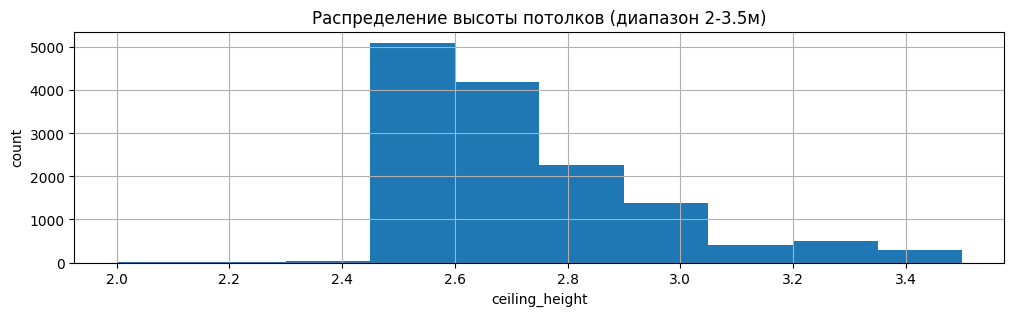

In [41]:
# Уникальные значения столбца и их количество
print (data['ceiling_height'].value_counts(),'\n')

#Посмотрим описание характеристик
print (data['ceiling_height'].describe(),'\n')

#99 процентиль:
print ('99 процентиль = ', data['ceiling_height'].quantile(.99))

#Строим гистограмму
plt.title('Распределение высоты потолков (все данные)')
hist_column(data,'ceiling_height',figsize = (12,3), range=(0,5), bins = 30)

plt.title('Распределение высоты потолков (диапазон 2-3.5м)')
hist_column(data,'ceiling_height',figsize = (12,3), range=(2,3.5), bins = 10)

In [42]:
#количество строк с аномально большими значениями
print ('Количество строк с аномально большими значениями = ' , 
       data.query('ceiling_height > 3.8').shape[0],'\n')

#количество строк с аномально маленькими значениями
print ('Количество строк с аномально маленькими значениями = ' , 
       data.query('ceiling_height < 1.8').shape[0],'\n')

Количество строк с аномально большими значениями =  147 

Количество строк с аномально маленькими значениями =  3 



Заполним все пропуски и значения <1.8 или >3.8 медианным значением 

Медианное значение высоты потолков =  2.65


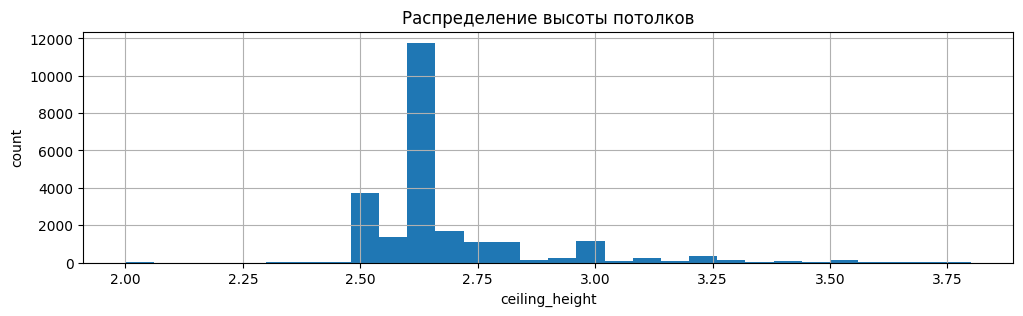

In [43]:
#Находим медиану
ciling_height_median = data.query(
    'ceiling_height <= 3.8 and ceiling_height > 1.8'
)['ceiling_height'].median()
print ('Медианное значение высоты потолков = ', ciling_height_median)

#Заполняем пропуски в столбце
data.loc[data['ceiling_height'].isna(), 'ceiling_height'] = ciling_height_median

#Заменяем аномально большие значения в столбце
data.loc[
    (data['ceiling_height'] > 3.8) | (data['ceiling_height'] < 1.8), 'ceiling_height'
    ] = ciling_height_median

#Строим гистограмму
plt.title('Распределение высоты потолков')
hist_column(data,'ceiling_height',figsize = (12,3), bins = 30)

**9) Столбец `days_exposition`** Пропуски в этом столбце могут быть связаны с человеческим фактором или ошибкой записи/выгрузки данных. Пока пропуски в этом столбце заполнять не будем. Проверим на аномальные данные

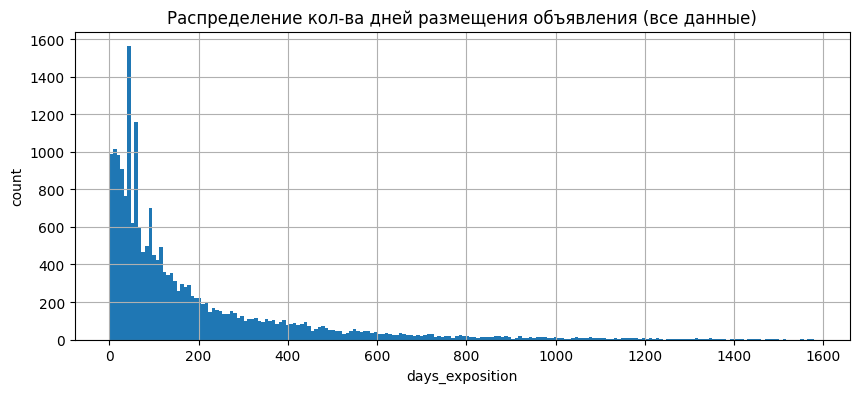

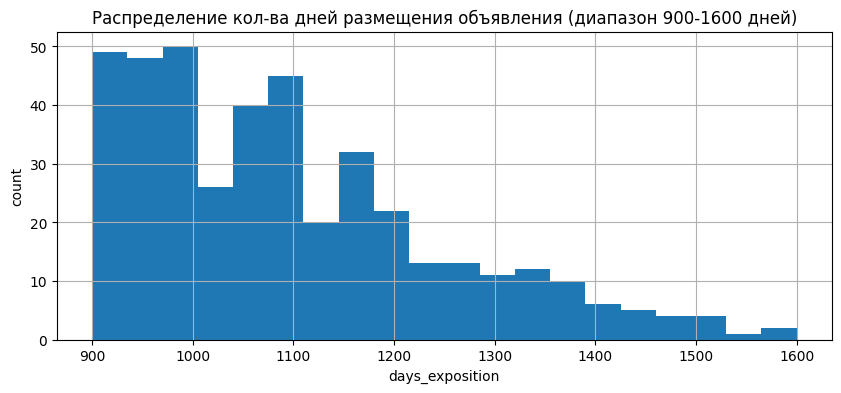

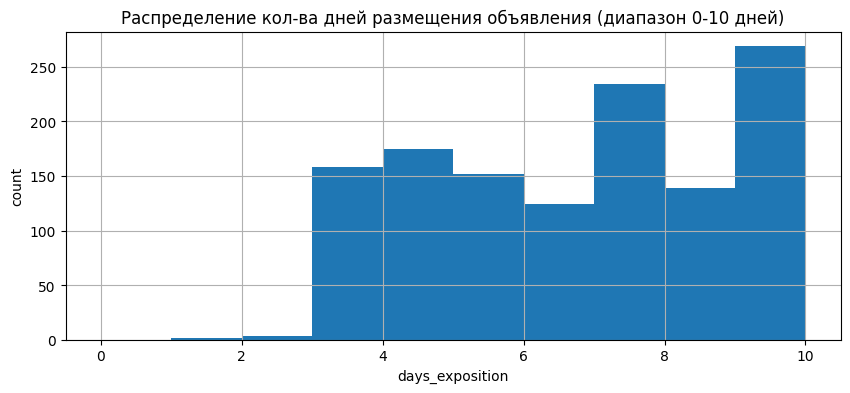

count    20508.000000
mean       180.934026
std        219.766387
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64
45.0      880
60.0      538
7.0       234
30.0      208
90.0      204
         ... 
971.0       1
1179.0      1
748.0       1
1022.0      1
1174.0      1
Name: days_exposition, Length: 1141, dtype: int64
99 процентиль =  1068.8600000000006


In [44]:
#Строим гистограмму
plt.title('Распределение кол-ва дней размещения объявления (все данные)')
hist_column(data,'days_exposition',figsize = (10,4), bins = 200)

plt.title('Распределение кол-ва дней размещения объявления (диапазон 900-1600 дней)')
hist_column(data,'days_exposition',figsize = (10,4), range =(900,1600), bins = 20)

plt.title('Распределение кол-ва дней размещения объявления (диапазон 0-10 дней)')
hist_column(data,'days_exposition',figsize = (10,4), range =(0,10), bins = 10)

#Характеристики:
print (data['days_exposition'].describe())

print (data['days_exposition'].sort_values(ascending=False).value_counts())

#99 процентиль:
print ('99 процентиль = ', data['days_exposition'].quantile(.99))

In [45]:
print (data.loc[data['days_exposition']<3,'days_exposition'].count())

4


Уберем аномальные данные больше 1100 дней или меньше 3 дней, заменим их на пропуски 

In [46]:
#Заполним пустыми значениями
data.loc[
    (data['days_exposition']>1100)
    |
    ((data['days_exposition']<3))
    ,'days_exposition'] = None

#Количество пропусков стало
print (data['days_exposition'].isna().sum())

3347


**10) Столбец `floors_total`** Пропуски в этом столбце обусловлены тем что человек мог не захотеть/забыть указать это значение, а также могут быть связаны с человеческим фактором или ошибкой записи/выгрузки данных. Как заполнить пропуски идей нет, скорей всего оставим пустыми.

Посмотрим на столбец, на аномальность данных и редкие значения. А также изменим тип столбца на целочисленный.

<IntegerArray>
[   1,    2,    3,    4,    5,    6,    7,    8,    9,   10,   11,   12,   13,
   14,   15,   16,   17,   18,   19,   20,   21,   22,   23,   24,   25,   26,
   27,   28,   29,   33,   34,   35,   36,   37,   52,   60, <NA>]
Length: 37, dtype: Int64 



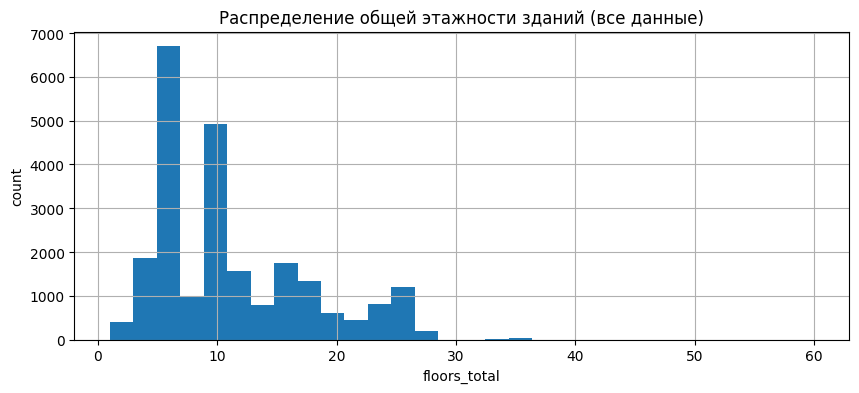

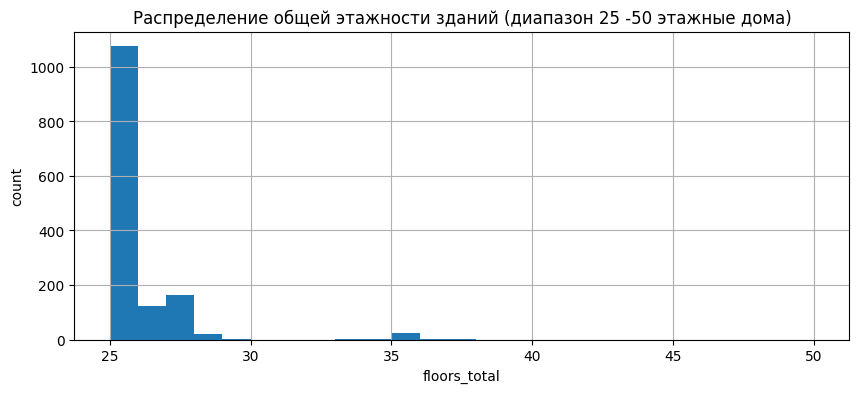

5     5787
9     3758
16    1375
12    1362
4     1196
10    1174
25    1075
6      914
17     833
3      667
7      592
14     553
18     505
24     469
8      390
2      383
15     365
23     352
19     339
22     286
20     271
13     229
11     203
27     164
21     158
26     124
1       25
35      24
28      21
36       3
34       1
60       1
52       1
29       1
33       1
37       1
Name: floors_total, dtype: Int64 



In [47]:
#Меняем тип столбца
data['floors_total'] = data['floors_total'].astype({"floors_total": "Int64"})

#Смотрим уникальные значения
print (data['floors_total'].sort_values().unique(),'\n')

#Гистограмма
plt.title('Распределение общей этажности зданий (все данные)')
hist_column(data,'floors_total',figsize = (10,4), bins = 30)

plt.title('Распределение общей этажности зданий (диапазон 25 -50 этажные дома)')
hist_column(data,'floors_total',figsize = (10,4),range= (25,50), bins = 25)

#Смотрим частоту появления уникальных значений
print (data['floors_total'].value_counts(),'\n')

Есть аномальные и редкие значения в основном после 28 этажа включительно. Квартир, для которых указано больше 28 этажей очень немного. Заполним эти значения пропусками.

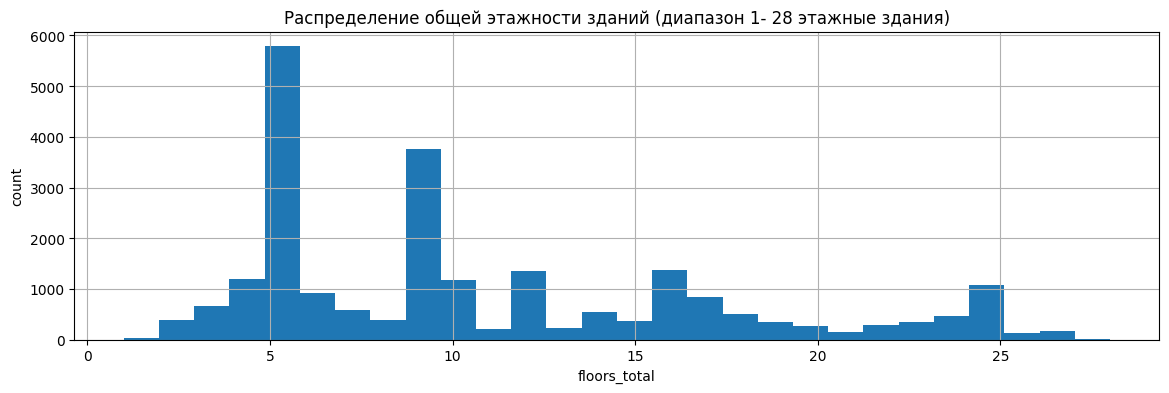

Количество пропусков = 118


In [48]:
#Заменяем значения > нужного этажа на пустые
data.loc[data['floors_total'] > 28, 'floors_total'] = None

#Строим гистограмму
plt.title('Распределение общей этажности зданий (диапазон 1- 28 этажные здания)')
hist_column(data,'floors_total',figsize = (14,4), bins = 28, range=(1,28))

print ('Количество пропусков =', data['floors_total'].isna().sum())
         

**11) По столбцу `floor`** Пропусков тут нет, изменим тип на целочисленный, так как номер этажа не может быть дробным.  В столбце floors_total мы заполнили пустыми строками все значения этажей больше 28, в этом столбце поступим аналогично.

In [49]:
#Меняем тип столбца
data['floor'] = data['floor'].astype({"floor": "Int64"})

#Заменяем значения >33этажа на пустые
data.loc[data['floor'] > 28, 'floor'] = None

print ('sum nan =', data['floor'].isna().sum())

sum nan = 5


**12) По столбцу `total_images`** Пропусков тут нет, тип изменять не нужно. Посмотрим на аномальность данных и редкие значения.

10    1797
9     1724
20    1694
8     1583
7     1520
6     1481
11    1362
5     1301
12    1225
0     1058
13    1015
4      986
14     986
15     948
1      872
3      768
16     761
17     650
18     642
2      637
19     603
23      16
21      12
24       8
22       8
26       5
28       4
32       4
29       3
50       3
27       2
35       2
30       2
31       2
39       1
25       1
42       1
37       1
Name: total_images, dtype: int64 



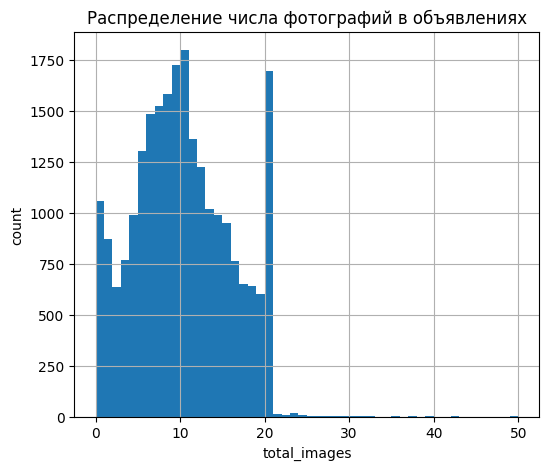

99 процентиль =  20.0


In [50]:
#Смотрим уникальные значения с их частотой появления
print (data['total_images'].sort_values().value_counts(),'\n')

#Строим гистограмму
plt.title('Распределение числа фотографий в объявлениях')
hist_column(data,'total_images',figsize = (6,5), bins = data['total_images'].max())

#99 процентиль:
print ('99 процентиль = ', data['total_images'].quantile(.99))


Уберем из таблицы (заполним пустыми значениями) те строки, где для объекта количество фотографий больше 20. Больше 20 фотографий в объявлении встречается очень редко, и эти значения дадут больше выброс чем пользу

In [51]:
#Заменяем значения на пустые
data.loc[data['total_images'] > 20, 'total_images'] = None

print ('sum nan =', data['total_images'].isna().sum())

sum nan = 75


**13) По столбцу `rooms`** Пропусков тут нет, тип изменять не нужно. Посмотрим на аномальность данных и редкие значения.

In [52]:
#Смотрим уникальные значения  и частоту их появления
data['rooms'].value_counts().to_frame()

rooms
1    8044
2    7936
3    5810
4    1180
5     326
0     197
6     105
7      59
8      12
9       8
10      3
11      2
14      2
19      1
16      1
12      1
15      1

Обрежем аномальные, редко встречающиеся значения 8 и больше комнат, заменим их на пустые значения:

In [53]:
#Заменяем значения на пустые
data.loc[data['rooms'] >= 8, 'rooms'] = None

print ('sum nan =', data['rooms'].isna().sum())

sum nan = 31


**14) Столбец `first_day_exposition`** Изменим тип этого столбца на datetime. И посмотрим на гистограмму и частоту публикаций по годам

total_images  last_price  total_area first_day_exposition  rooms  \
0          20.0  13000000.0       108.0           2019-03-07    3.0   
1           7.0   3350000.0        40.4           2018-12-04    1.0   
2          10.0   5196000.0        56.0           2015-08-20    2.0   
3           0.0  64900000.0       159.0           2015-07-24    3.0   
4           2.0  10000000.0       100.0           2018-06-19    2.0   

   ceiling_height  floors_total  living_area  floor  is_apartment  ...  \
0            2.70            16         51.0      8         False  ...   
1            2.65            11         18.6      1         False  ...   
2            2.65             5         34.3      4         False  ...   
3            2.65            14          NaN      9         False  ...   
4            3.03            14         32.0     13         False  ...   

   kitchen_area  balcony    locality_name  airports_nearest  \
0          25.0        0  Санкт-Петербург           18863.0   
1          11.0        2           Шушары           12817.0   
2           8.3        0  Санкт-Петербург           21741.0   
3           NaN        0  Санкт-Петербург           28098.0   
4          41.0        0  Санкт-Петербург           31856.0   

  city_center_nearest  parks_around3000  parks_nearest  ponds_around3000  \
0             16028.0                 1          482.0                 2   
1             18603.0                 0            NaN                 0   
2             13933.0                 1           90.0                 2   
3              6800.0                 2           84.0                 3   
4              8098.0                 2          112.0                 1   

   ponds_nearest  days_exposition  
0          755.0              NaN  
1            NaN             81.0  
2          574.0            558.0  
3          234.0            424.0  
4           48.0            121.0  

[5 rows x 22 columns]

None
2018    8512
2017    8186
2019    2879
2016    2783
2015    1191
2014     137
Name: first_day_exposition, dtype: int64


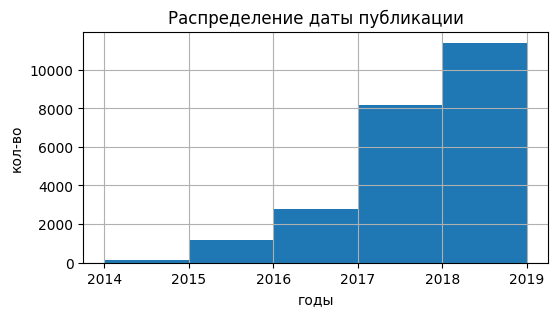

In [54]:
#Изменяем тип
data['first_day_exposition'] = pd.to_datetime(
    data['first_day_exposition'], format = '%Y-%m-%dT%H:%M:%S'
)

#Проверяем
print (display(data.head()))

#Строим гистограмму
data['first_day_exposition'].dt.year.plot(
    kind='hist',
    figsize=(6,3),
    title='Распределение даты публикации', 
    bins=5, 
    grid = True
)
plt.xlabel('годы')
plt.ylabel('кол-во')

#Уникальные значения по годам и их частота появления:
print (data['first_day_exposition'].dt.year.value_counts())


С каждым годом росло количество объявлений. В 2014 году объявлений очень мало, посмотрим все ли месяца попали в 2014 год:

In [55]:
print (data.loc[
    data['first_day_exposition'].dt.year == 2014
]['first_day_exposition'].dt.month.unique())

[12 11]


Возможно потом можно либо удалить либо не использовать данные за 2014 год, так как их очень мало. Выборка видимо велась с ноября 2014г.

проверка до всех обработок условия  total_area*0.9 <= (living_area + kitchen_area):

In [56]:
data1 = data.query('(total_area*0.9) <= (living_area + kitchen_area)')
print (display(
    data1.loc[:,['living_area','kitchen_area','total_area']]
))

living_area  kitchen_area  total_area
41            59.0          12.0        74.0
171           38.0          10.0        49.0
184           26.1           6.2        30.2
220           28.0           9.0        37.0
319           47.4           6.4        59.7
...            ...           ...         ...
23205         90.2          16.0       114.0
23286         42.2           6.0        48.2
23317         40.0          10.0        54.0
23510         44.0          15.3        65.0
23669         52.0           7.0        59.0

[475 rows x 3 columns]

None


Стоит заметить что есть также строки в которых total_area <= (living_area + kitchen_area):

In [57]:
data1 = data.query('(total_area) <= (living_area + kitchen_area)')
print (display(
    data1.loc[:,['living_area','kitchen_area','total_area']]
))

living_area  kitchen_area  total_area
184          26.10          6.20       30.20
220          28.00          9.00       37.00
545          20.00          5.00       23.80
551          30.55          9.28       31.59
601          48.30          7.00       53.70
...            ...           ...         ...
22858        14.00         11.00       25.00
22952        78.00         24.00      102.00
23191        63.00         13.04       67.92
23286        42.20          6.00       48.20
23669        52.00          7.00       59.00

[134 rows x 3 columns]

None


**15) Cтолбец `total_area`**  почистим от аномальных или редких выбивающихся значений. Пустых значений в этой столбце нет. Далее разобъем на категории данные total_area и запишем новый столбец с категориями total_area_category:

[ 12.   13.   13.2 ... 631.  631.2 900. ]
count    23688.000000
mean        60.340126
std         35.651357
min         12.000000
25%         40.000000
50%         52.000000
75%         69.800000
max        900.000000
Name: total_area, dtype: float64


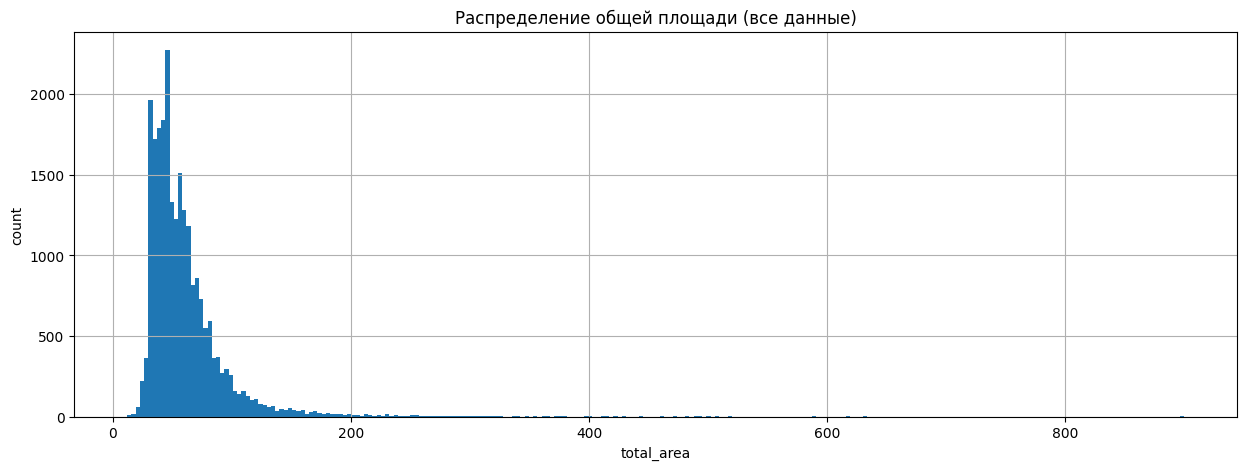

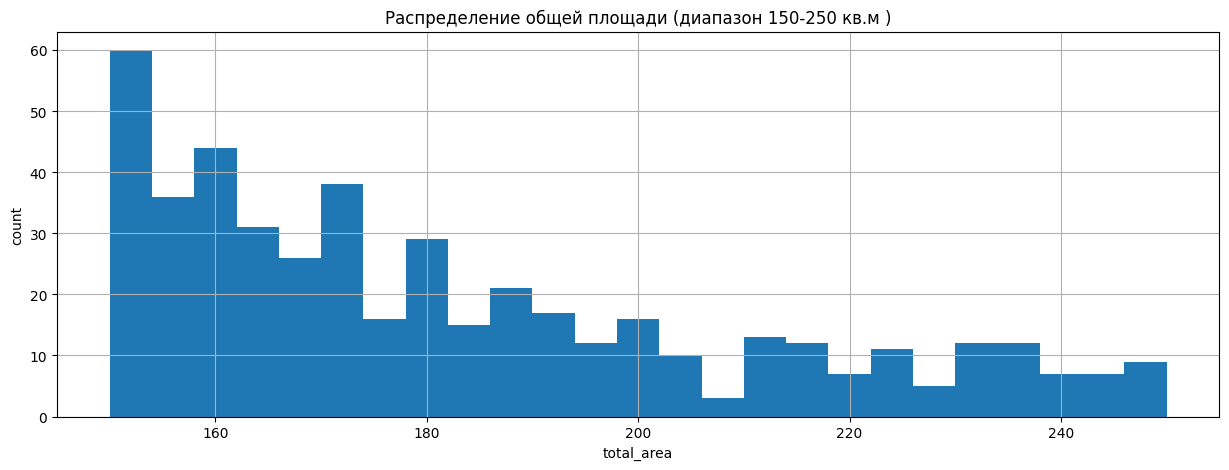

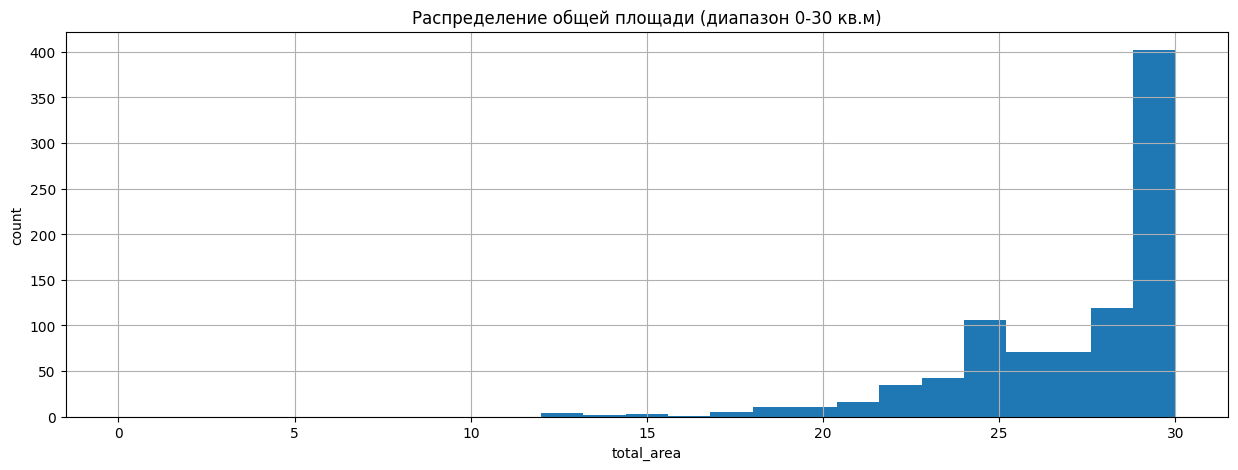

99 процентиль =  197.2910000000007


In [58]:
#Округляем до первого знака после запятой
data['total_area'] = round(data['total_area'],1)

print (data['total_area'].sort_values().unique())
print (data['total_area'].describe())

#Строим гистограмму
plt.title('Распределение общей площади (все данные)')
hist_column(data,'total_area',figsize = (15,5), bins = 250)

plt.title('Распределение общей площади (диапазон 150-250 кв.м )')
hist_column(data,'total_area',figsize = (15,5), range = (150,250), bins = 25)

plt.title('Распределение общей площади (диапазон 0-30 кв.м)')
hist_column(data,'total_area',figsize = (15,5), range = (0,30), bins = 25)

#99 процентиль:
print ('99 процентиль = ', data['total_area'].quantile(.99))

Уберем выбивающиеся малореальные значения больше 200кв м и меньше 20(не бывает квартир меньше 20кв.м), заполним их пустыми значениями. 

In [59]:
# Удаляем строки
index_names = data.query('total_area > 200 or total_area < 20').index
print ('Количество удаляемых строк = ', len(index_names))
data.drop(index_names, inplace = True)

#Обновим индексацию датафрейма
data.reset_index(drop=True, inplace= True)

Количество удаляемых строк =  254


In [60]:
# check
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23434 entries, 0 to 23433
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23361 non-null  float64       
 1   last_price            23434 non-null  float64       
 2   total_area            23434 non-null  float64       
 3   first_day_exposition  23434 non-null  datetime64[ns]
 4   rooms                 23430 non-null  float64       
 5   ceiling_height        23434 non-null  float64       
 6   floors_total          23317 non-null  Int64         
 7   living_area           21571 non-null  float64       
 8   floor                 23429 non-null  Int64         
 9   is_apartment          23434 non-null  bool          
 10  studio                23434 non-null  bool          
 11  open_plan             23434 non-null  bool          
 12  kitchen_area          21211 non-null  float64       
 13  balcony         

Проверка до обработки площади кухни условия  total_area*0.9 <= (living_area + kitchen_area):

In [61]:
data1 = data.query('(total_area*0.9) <= (living_area + kitchen_area)')
print (display(
    data1.loc[:,['living_area','kitchen_area','total_area']]
))

living_area  kitchen_area  total_area
41            59.0          12.0        74.0
170           38.0          10.0        49.0
183           26.1           6.2        30.2
219           28.0           9.0        37.0
318           47.4           6.4        59.7
...            ...           ...         ...
22955         90.2          16.0       114.0
23035         42.2           6.0        48.2
23065         40.0          10.0        54.0
23256         44.0          15.3        65.0
23415         52.0           7.0        59.0

[464 rows x 3 columns]

None


In [62]:
data1 = data.query('(total_area) <= (living_area + kitchen_area)')
print (display(
    data1.loc[:,['living_area','kitchen_area','total_area']]
))

living_area  kitchen_area  total_area
183          26.10          6.20        30.2
219          28.00          9.00        37.0
540          20.00          5.00        23.8
546          30.55          9.28        31.6
595          48.30          7.00        53.7
...            ...           ...         ...
22612        14.00         11.00        25.0
22705        78.00         24.00       102.0
22941        63.00         13.04        67.9
23035        42.20          6.00        48.2
23415        52.00          7.00        59.0

[134 rows x 3 columns]

None


**16) Столбец `kitchen_area`** Пропуски в этом столбце могут быть связаны с человеческим фактором или ошибкой записи/выгрузки данных. 

Посмотрим есть ли строки, в которых задана жилая площадь, но не задана площадь кухни, для таких строк пустое значение площади кухни восстановим разностью общей площади*0,9 и жилой площади.

In [63]:
print (data['kitchen_area'].isna().sum())

#есть ли строки, в которых задана жилая площадь, но не задана площадь кухни
print ('Таких строк = ', data.query(
    'kitchen_area.isna() and not living_area.isna()'
).shape[0])

2223
Таких строк =  789


In [64]:
data.loc[
    (data['kitchen_area'].isna())
    & 
    ~( data['living_area'].isna())
    , 'kitchen_area'] = data['total_area']*0.85  - data['living_area']

print ('Пропусков осталось ',data['kitchen_area'].isna().sum())

Пропусков осталось  1434


Проверка до обработки площади кухни условия  total_area*0.9 <= (living_area + kitchen_area):

In [65]:
data1 = data.query('(total_area*0.9) <= (living_area + kitchen_area)')
print (display(
    data1.loc[:,['living_area','kitchen_area','total_area']]
))

living_area  kitchen_area  total_area
41            59.0          12.0        74.0
170           38.0          10.0        49.0
183           26.1           6.2        30.2
219           28.0           9.0        37.0
318           47.4           6.4        59.7
...            ...           ...         ...
22955         90.2          16.0       114.0
23035         42.2           6.0        48.2
23065         40.0          10.0        54.0
23256         44.0          15.3        65.0
23415         52.0           7.0        59.0

[464 rows x 3 columns]

None


In [66]:
data1 = data.query('(total_area) <= (living_area + kitchen_area)')
print (display(
    data1.loc[:,['living_area','kitchen_area','total_area']]
))

living_area  kitchen_area  total_area
183          26.10          6.20        30.2
219          28.00          9.00        37.0
540          20.00          5.00        23.8
546          30.55          9.28        31.6
595          48.30          7.00        53.7
...            ...           ...         ...
22612        14.00         11.00        25.0
22705        78.00         24.00       102.0
22941        63.00         13.04        67.9
23035        42.20          6.00        48.2
23415        52.00          7.00        59.0

[134 rows x 3 columns]

None


Посмотрим на аномальность данных и редкие значения.

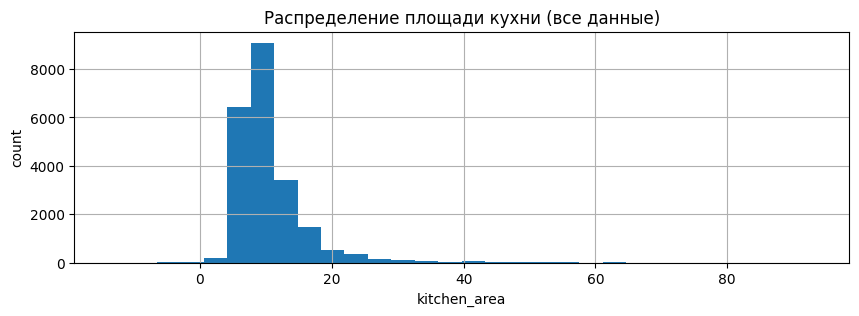

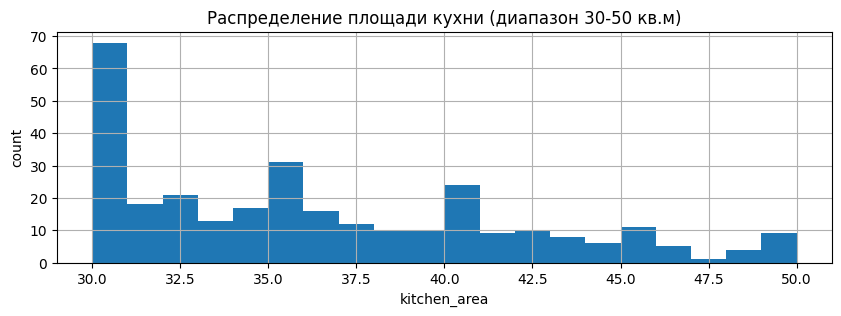

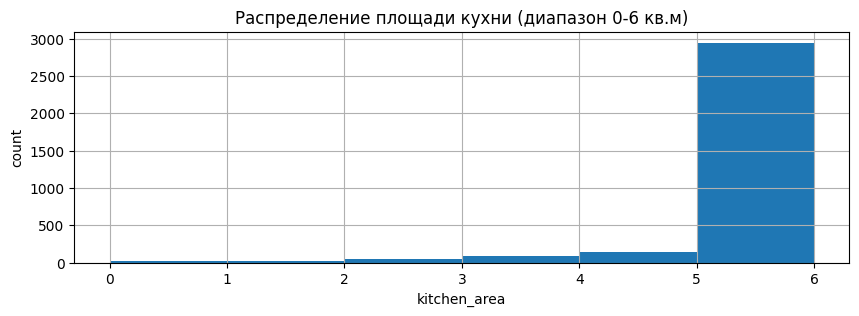

count    22000.000000
mean        10.404201
std          5.553720
min        -13.705000
25%          7.000000
50%          9.000000
75%         12.000000
max         93.200000
Name: kitchen_area, dtype: float64
[-13.705  -8.8    -7.65  ...  93.     93.2       nan]
99 процентиль =  33.101549999999754


In [67]:
plt.title('Распределение площади кухни (все данные)')
hist_column(data,'kitchen_area',figsize = (10,3), bins = 30)

plt.title('Распределение площади кухни (диапазон 30-50 кв.м)')
hist_column(data,'kitchen_area',figsize = (10,3), range = (30,50), bins = 20)

plt.title('Распределение площади кухни (диапазон 0-6 кв.м)')
hist_column(data,'kitchen_area',figsize = (10,3), range = (0,6), bins = 6)

print (data['kitchen_area'].describe())
print (data['kitchen_area'].sort_values().unique())

#99 процентиль:
print ('99 процентиль = ', data['kitchen_area'].quantile(.99))

Округлим значения до ближайших целых чисел, оставив один знак после запятой. Есть выбивающиеся значения, когда пользователь указал площадь кухни до второго знака после запятой. Также есть аномальные значения больше 35 и меньше 5, заполним их пустыми строками.

In [68]:
#Округляем до первого знака после запятой
data['kitchen_area'] = round(data['kitchen_area'],1)

#Заполняем пустыми значениями
data.loc[(data['kitchen_area']>35) | (data['kitchen_area']<5),'kitchen_area'] = None

print (data['kitchen_area'].sort_values().unique())

print ('Кол-во пропусков',data['kitchen_area'].isna().sum())

[ 5.   5.1  5.2  5.3  5.4  5.5  5.6  5.7  5.8  5.9  6.   6.1  6.2  6.3
  6.4  6.5  6.6  6.7  6.8  6.9  7.   7.1  7.2  7.3  7.4  7.5  7.6  7.7
  7.8  7.9  8.   8.1  8.2  8.3  8.4  8.5  8.6  8.7  8.8  8.9  9.   9.1
  9.2  9.3  9.4  9.5  9.6  9.7  9.8  9.9 10.  10.1 10.2 10.3 10.4 10.5
 10.6 10.7 10.8 10.9 11.  11.1 11.2 11.3 11.4 11.5 11.6 11.7 11.8 11.9
 12.  12.1 12.2 12.3 12.4 12.5 12.6 12.7 12.8 12.9 13.  13.1 13.2 13.3
 13.4 13.5 13.6 13.7 13.8 13.9 14.  14.1 14.2 14.3 14.4 14.5 14.6 14.7
 14.8 14.9 15.  15.1 15.2 15.3 15.4 15.5 15.6 15.7 15.8 15.9 16.  16.1
 16.2 16.3 16.4 16.5 16.6 16.7 16.8 16.9 17.  17.1 17.2 17.3 17.4 17.5
 17.6 17.7 17.8 17.9 18.  18.1 18.2 18.3 18.4 18.5 18.6 18.7 18.8 18.9
 19.  19.1 19.2 19.3 19.4 19.5 19.6 19.7 19.8 19.9 20.  20.1 20.2 20.3
 20.4 20.5 20.6 20.7 20.8 20.9 21.  21.1 21.2 21.3 21.4 21.5 21.6 21.7
 21.8 21.9 22.  22.1 22.2 22.3 22.4 22.5 22.6 22.7 22.8 22.9 23.  23.1
 23.2 23.3 23.4 23.5 23.6 23.7 23.8 23.9 24.  24.1 24.2 24.3 24.4 24.5
 24.6 

In [69]:
data1 = data.query('(total_area*0.9) <= (living_area + kitchen_area)')
print (display(
    data1.loc[:,['living_area','kitchen_area','total_area']]
))

living_area  kitchen_area  total_area
41            59.0          12.0        74.0
170           38.0          10.0        49.0
183           26.1           6.2        30.2
219           28.0           9.0        37.0
318           47.4           6.4        59.7
...            ...           ...         ...
22955         90.2          16.0       114.0
23035         42.2           6.0        48.2
23065         40.0          10.0        54.0
23256         44.0          15.3        65.0
23415         52.0           7.0        59.0

[439 rows x 3 columns]

None


In [70]:
data1 = data.query('(total_area) <= (living_area + kitchen_area)')
print (display(
    data1.loc[:,['living_area','kitchen_area','total_area']]
))

living_area  kitchen_area  total_area
183          26.10           6.2        30.2
219          28.00           9.0        37.0
540          20.00           5.0        23.8
546          30.55           9.3        31.6
595          48.30           7.0        53.7
...            ...           ...         ...
22612        14.00          11.0        25.0
22705        78.00          24.0       102.0
22941        63.00          13.0        67.9
23035        42.20           6.0        48.2
23415        52.00           7.0        59.0

[130 rows x 3 columns]

None


**17)** Пропуски в столбце **`living_area`** могут быть связаны с человеческим фактором или ошибкой записи/выгрузки данных. Пропуски в этом столбце можем попытаться заполнить исходя из значений общей площади и площади кухни.

Посмотрим на столбец, на аномальность данных и редкие значения.

1863
[  2.    3.    5.  ... 159.6 164.7   nan] 



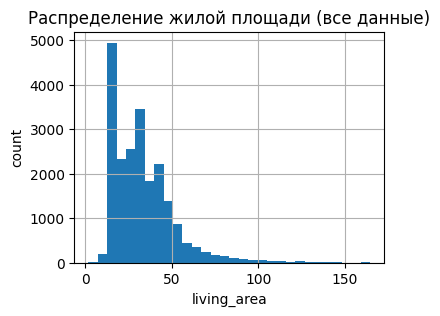

99 процентиль =  96.0


In [71]:
print(data['living_area'].isna().sum())

print (data['living_area'].sort_values().unique(),'\n')

plt.title('Распределение жилой площади (все данные)')
hist_column(data,'living_area',figsize = (4,3), bins = 30)

#99 процентиль:
print ('99 процентиль = ', data['living_area'].quantile(.99))


Аналогично есть выбивающиеся значения, когда пользователь указал площадь до второго знака после запятой. Округлим значения до ближайших целых чисел, оставив один знак после запятой. 

Значения жилой площади заполним разностью общей площади и кухни *0.85, так как могут быть санузлы, балконы и прочее:

In [72]:
#Округляем до первого знака после запятой
data['living_area'] = round(data['living_area'],1)

#Заменяем на пустые значения
data.loc[
    (~data['kitchen_area'].isna())
    &
    (data['living_area'].isna())
    ,'living_area'] = (data['total_area']-data['kitchen_area'])*0.85

print (data['living_area'].sort_values().unique(),'\n')

print (data['living_area'].describe(),'\n')

[  2.    3.    5.  ... 159.6 164.7   nan] 

count    21989.000000
mean        33.462569
std         17.522703
min          2.000000
25%         18.700000
50%         30.000000
75%         42.100000
max        164.700000
Name: living_area, dtype: float64 



In [73]:
data1 = data.query('(total_area*0.9) <= (living_area + kitchen_area)')
print (display(
    data1.loc[:,['living_area','kitchen_area','total_area']]
))

living_area  kitchen_area  total_area
41            59.0          12.0        74.0
170           38.0          10.0        49.0
183           26.1           6.2        30.2
219           28.0           9.0        37.0
318           47.4           6.4        59.7
...            ...           ...         ...
22955         90.2          16.0       114.0
23035         42.2           6.0        48.2
23065         40.0          10.0        54.0
23256         44.0          15.3        65.0
23415         52.0           7.0        59.0

[465 rows x 3 columns]

None


Заполним пустыми строками редко встречающиеся аномальные данные <8 и больше 120

In [74]:
#Заполняем пустыми значениями 
data.loc[(data['living_area']>120) | (data['living_area']<8),'living_area'] = None

print('Кол-во пустых значений', data['living_area'].isna().sum())

Кол-во пустых значений 1508


In [75]:
data1 = data.query('(total_area*0.9) < (living_area + kitchen_area)')
print (display(
    data1.loc[:,['living_area','kitchen_area','total_area']]
))

living_area  kitchen_area  total_area
41            59.0          12.0        74.0
170           38.0          10.0        49.0
183           26.1           6.2        30.2
219           28.0           9.0        37.0
318           47.4           6.4        59.7
...            ...           ...         ...
22955         90.2          16.0       114.0
23035         42.2           6.0        48.2
23065         40.0          10.0        54.0
23256         44.0          15.3        65.0
23415         52.0           7.0        59.0

[445 rows x 3 columns]

None


**18) Столбцы `studio` и `open_plan`** Не требуют обработки. Глянем на количество уникальных значений:

In [76]:
# Уникальные значения столбца и их количество
print (data['studio'].value_counts(),'\n')
print (data['open_plan'].value_counts(),'\n')

False    23292
True       142
Name: studio, dtype: int64 

False    23369
True        65
Name: open_plan, dtype: int64 



Большинство квартир не являются студиями и не подходят под свободную планировку.

**19) Столбец `last_price`** Пропусков в данном столбце нет. Посмотрим на выбивающиеся и аномальные значения.

[1.219000e+04 4.300000e+05 4.400000e+05 ... 1.350000e+08 2.892384e+08
 3.300000e+08] 

count    2.343400e+04
mean     6.031249e+06
std      6.240735e+06
min      1.219000e+04
25%      3.400000e+06
50%      4.600000e+06
75%      6.700000e+06
max      3.300000e+08
Name: last_price, dtype: float64 



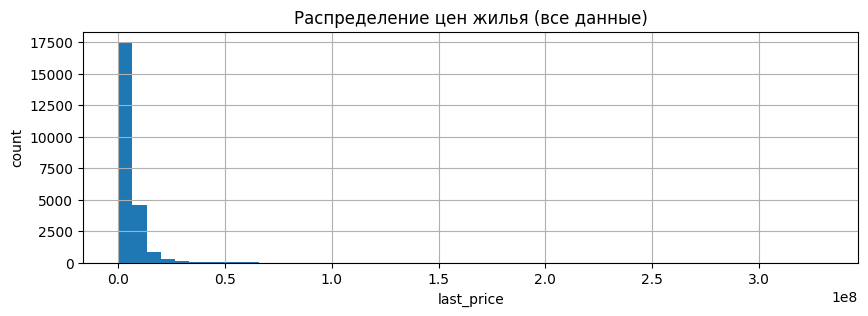

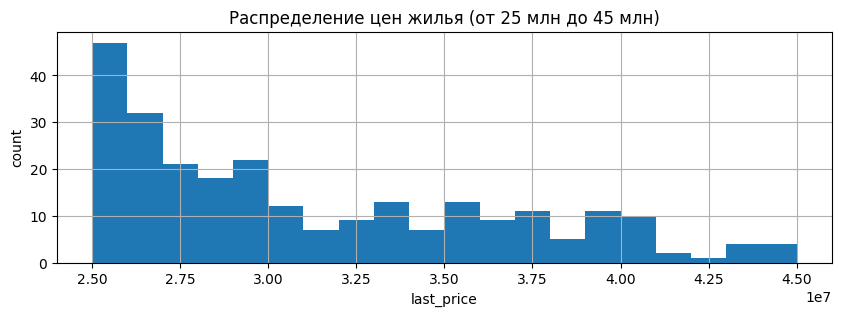

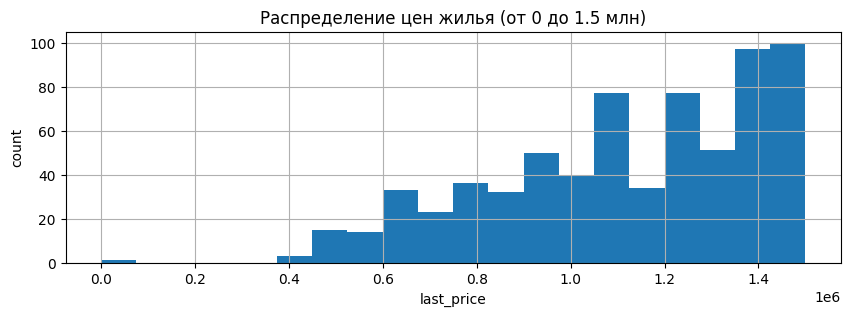

99 процентиль =  27793799.999999754


In [77]:
# Уникальные значения столбца и их количество
print (data['last_price'].sort_values().unique(),'\n')

#Посмотрим описание характеристик
print (data['last_price'].describe(),'\n')

plt.title('Распределение цен жилья (все данные)')
hist_column(data,'last_price',figsize = (10,3), bins = 50)

plt.title('Распределение цен жилья (от 25 млн до 45 млн)')
hist_column(data,'last_price',figsize = (10,3), range = (2.5e+07, 4.5e+07), bins = 20)

plt.title('Распределение цен жилья (от 0 до 1.5 млн)')
hist_column(data,'last_price',figsize = (10,3), range = (0, 1.5e+06), bins = 20)

#99 процентиль:
print ('99 процентиль = ', data['last_price'].quantile(.99))

Посчитаем количество строк с аномальными значениями:

In [78]:
print ('Количество строк = ' , data.query('last_price <= 0.8e+06').shape[0],'\n')
print ('Количество строк = ' , data.query('last_price >= 3.0e+07').shape[0],'\n')

Количество строк =  123 

Количество строк =  191 



Удалим аномальные редко встречающиеся значения < 800тыс и больше 30млн:

In [79]:
data = data.query('last_price < 3.0e+07')
data = data.query('last_price > 0.8e+06')

**20) Проверим есть ли в таблице дубликаты:**

In [80]:
print ('Количество дубликатов = ', data.duplicated().sum())

Количество дубликатов =  0


Проверим датафрейм. Какие аномалии остались

In [81]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23120 entries, 0 to 23433
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23049 non-null  float64       
 1   last_price            23120 non-null  float64       
 2   total_area            23120 non-null  float64       
 3   first_day_exposition  23120 non-null  datetime64[ns]
 4   rooms                 23117 non-null  float64       
 5   ceiling_height        23120 non-null  float64       
 6   floors_total          23003 non-null  Int64         
 7   living_area           21659 non-null  float64       
 8   floor                 23115 non-null  Int64         
 9   is_apartment          23120 non-null  bool          
 10  studio                23120 non-null  bool          
 11  open_plan             23120 non-null  bool          
 12  kitchen_area          21236 non-null  float64       
 13  balcony         

In [82]:
# Показатели о кол-ве объявлений в датасете, минимальных и максимальных значениях 
# в выбранных параметрах о продаже квартир
(
    data[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  'kitchen_area',
          'floor', 'floors_total']]
    .apply (['count', 'min', 'max','median'])   
    .style.format("{:,.2f}")
)

In [83]:
# Значения параметров объектов недвижимости на разных квантилях
(
    data[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  
        'kitchen_area', 'floor',   'floors_total']]
    .quantile([0.0012, 0.01, .5, .99, .9988])
    .style.format("{:,.2f}")
)

### Посчитаем и добавим в таблицу новые столбцы:

**1) Добавим в таблицу столбец `square_metr_price` c ценой одного квадратного метра:**

In [84]:
try:
    data['square_metr_price'] = round((data['last_price'] / data['total_area']),1)
except ZeroDivisionError:
    print ('division error')
    
#Проверяем результат:    
print (display(data.head()))

total_images  last_price  total_area first_day_exposition  rooms  \
0          20.0  13000000.0       108.0           2019-03-07    3.0   
1           7.0   3350000.0        40.4           2018-12-04    1.0   
2          10.0   5196000.0        56.0           2015-08-20    2.0   
4           2.0  10000000.0       100.0           2018-06-19    2.0   
5          10.0   2890000.0        30.4           2018-09-10    1.0   

   ceiling_height  floors_total  living_area  floor  is_apartment  ...  \
0            2.70            16         51.0      8         False  ...   
1            2.65            11         18.6      1         False  ...   
2            2.65             5         34.3      4         False  ...   
4            3.03            14         32.0     13         False  ...   
5            2.65            12         14.4      5         False  ...   

   balcony    locality_name  airports_nearest  city_center_nearest  \
0        0  Санкт-Петербург           18863.0              16028.0   
1        2           Шушары           12817.0              18603.0   
2        0  Санкт-Петербург           21741.0              13933.0   
4        0  Санкт-Петербург           31856.0               8098.0   
5        0          Янино-1               NaN                  NaN   

  parks_around3000  parks_nearest  ponds_around3000  ponds_nearest  \
0                1          482.0                 2          755.0   
1                0            NaN                 0            NaN   
2                1           90.0                 2          574.0   
4                2          112.0                 1           48.0   
5                0            NaN                 0            NaN   

   days_exposition  square_metr_price  
0              NaN           120370.4  
1             81.0            82920.8  
2            558.0            92785.7  
4            121.0           100000.0  
5             55.0            95065.8  

[5 rows x 23 columns]

None


**2) Добавим столбец `name_day_exposition`, содержащий день публикации объявления**

In [85]:
weekdays = ['понедельник', 'вторник', 'среда', 'четверг', 'пятница', 'суббота', 'воскресенье']

# создаем функцию, которая соотносит аргумент (в нашем случае номер дня недели) с названием
def name_weekday(weekday):
    return weekdays[weekday]

In [86]:
#создаем новый столбец, применяя функцию categorize_income методом apply() к столбцу total_area
data['name_day_exposition'] = data['first_day_exposition'].dt.weekday.apply(name_weekday)

#проверяем изменения датафрейма
print(display(data.head(10)))

total_images  last_price  total_area first_day_exposition  rooms  \
0           20.0  13000000.0       108.0           2019-03-07    3.0   
1            7.0   3350000.0        40.4           2018-12-04    1.0   
2           10.0   5196000.0        56.0           2015-08-20    2.0   
4            2.0  10000000.0       100.0           2018-06-19    2.0   
5           10.0   2890000.0        30.4           2018-09-10    1.0   
6            6.0   3700000.0        37.3           2017-11-02    1.0   
7            5.0   7915000.0        71.6           2019-04-18    2.0   
8           20.0   2900000.0        33.2           2018-05-23    1.0   
9           18.0   5400000.0        61.0           2017-02-26    3.0   
10           5.0   5050000.0        39.6           2017-11-16    1.0   

    ceiling_height  floors_total  living_area  floor  is_apartment  ...  \
0             2.70            16       51.000      8         False  ...   
1             2.65            11       18.600      1         False  ...   
2             2.65             5       34.300      4         False  ...   
4             3.03            14       32.000     13         False  ...   
5             2.65            12       14.400      5         False  ...   
6             2.65            26       10.600      6         False  ...   
7             2.65            24       44.795     22         False  ...   
8             2.65            27       15.400     26         False  ...   
9             2.50             9       43.600      7         False  ...   
10            2.67            12       20.300      3         False  ...   

      locality_name  airports_nearest  city_center_nearest  parks_around3000  \
0   Санкт-Петербург           18863.0              16028.0                 1   
1            Шушары           12817.0              18603.0                 0   
2   Санкт-Петербург           21741.0              13933.0                 1   
4   Санкт-Петербург           31856.0               8098.0                 2   
5           Янино-1               NaN                  NaN                 0   
6         Парголово           52996.0              19143.0                 0   
7   Санкт-Петербург           23982.0              11634.0                 0   
8            Мурино           51553.0                  NaN                 0   
9   Санкт-Петербург           50898.0              15008.0                 0   
10  Санкт-Петербург           38357.0              13878.0                 1   

   parks_nearest  ponds_around3000  ponds_nearest  days_exposition  \
0          482.0                 2          755.0              NaN   
1            NaN                 0            NaN             81.0   
2           90.0                 2          574.0            558.0   
4          112.0                 1           48.0            121.0   
5            NaN                 0            NaN             55.0   
6            NaN                 0            NaN            155.0   
7            NaN                 0            NaN              NaN   
8            NaN                 0            NaN            189.0   
9            NaN                 0            NaN            289.0   
10         310.0                 2          553.0            137.0   

    square_metr_price  name_day_exposition  
0            120370.4              четверг  
1             82920.8              вторник  
2             92785.7              четверг  
4            100000.0              вторник  
5             95065.8          понедельник  
6             99195.7              четверг  
7            110544.7              четверг  
8             87349.4                среда  
9             88524.6          воскресенье  
10           127525.3              четверг  

[10 rows x 24 columns]

None


**3) Добавим столбец `month_exposition`, содержащий месяц публикации объявления**

In [87]:
data['month_exposition'] = data['first_day_exposition'].dt.month

**4) Добавим столбец `year_exposition`, содержащий год публикации объявления**

In [88]:
data['year_exposition'] = data['first_day_exposition'].dt.year

**5) Добавим стобец `floor_type`, содержащий тип этажа квартиры (значения — «первый», «последний», «другой»)**

In [89]:
data['floor_type'] = 'другой'
data.loc[(data['floors_total']-data['floor']) ==0,'floor_type'] ='последний'
data.loc[data['floor'] == 1,'floor_type'] ='первый'


**6) Добавим столбец `city_center_nearest_km`, содержащий расстояние в км до центра города**

In [90]:
data['city_center_nearest_km'] = data['city_center_nearest']/1000

#Округляем до большего значения
data['city_center_nearest_km'] = data['city_center_nearest_km'].apply(np.ceil)

<a id='section_3'></a>
### Шаг 3. Исследовательский анализ данных

**1) Изучим следующие параметры:**
* общая площадь;
* жилая площадь;
* площадь кухни;
* цена объекта;
* количество комнат;
* высота потолков;
* этаж квартиры;
* тип этажа квартиры («первый», «последний», «другой»);
* общее количество этажей в доме;
* расстояние до центра города в метрах;
* расстояние до ближайшего аэропорта;
* расстояние до ближайшего парка;
* день и месяц публикации объявления

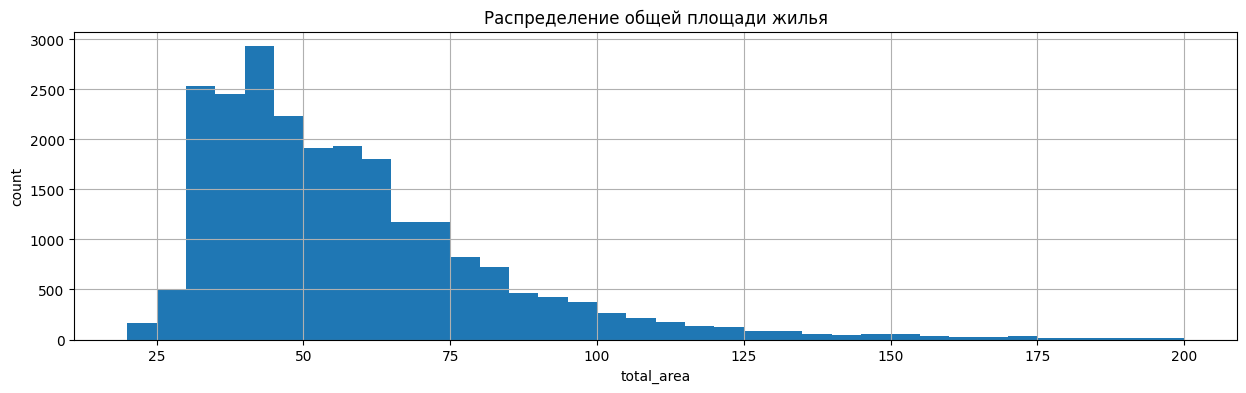

In [91]:
plt.title('Распределение общей площади жилья')
hist_column(data,'total_area',figsize = (15,4), bins = 36)

Похоже на скошенное вправо нормальное распределение. Намного чаще других в продаже можно найти квартиры от 30 кв м до 50.

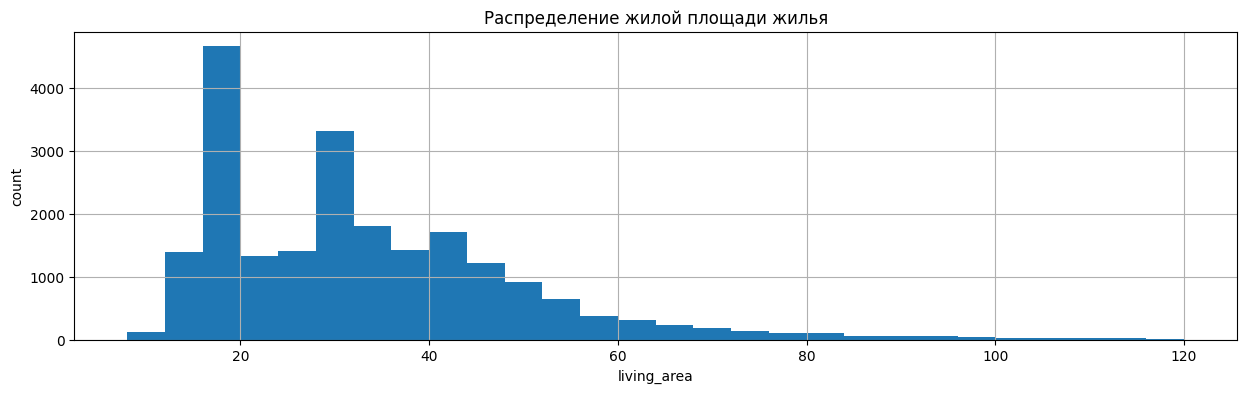

In [92]:
plt.title('Распределение жилой площади жилья')
hist_column(data,'living_area',figsize = (15,4), bins = 28)

Чаще всего встречается объекты с жил.площадью 15-20кв м или 30-35кв м.

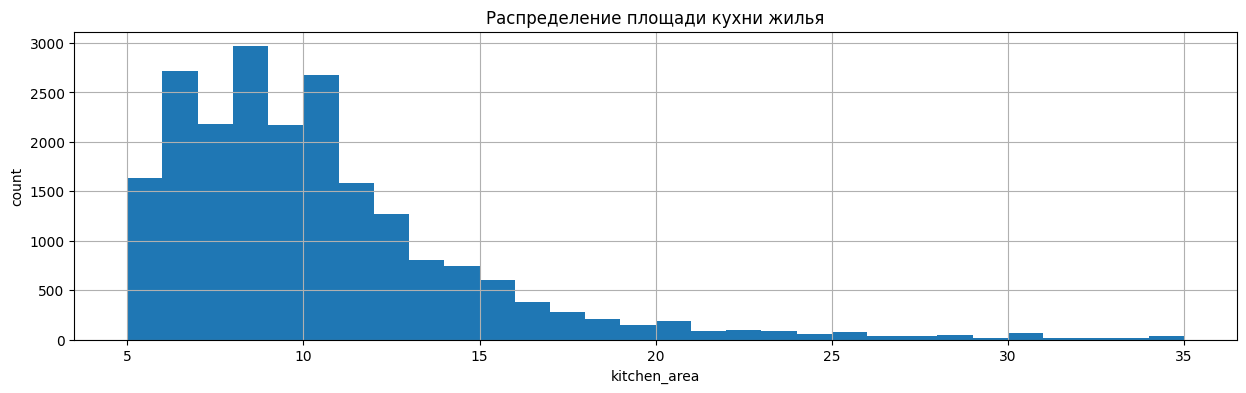

In [93]:
plt.title('Распределение площади кухни жилья')
hist_column(data,'kitchen_area',figsize = (15,4), bins = 30)

Похоже на нормальное распределение чуть скошенное вправо. Чаще всего встречаются кухни площадью 6,8, и 10 кв м.

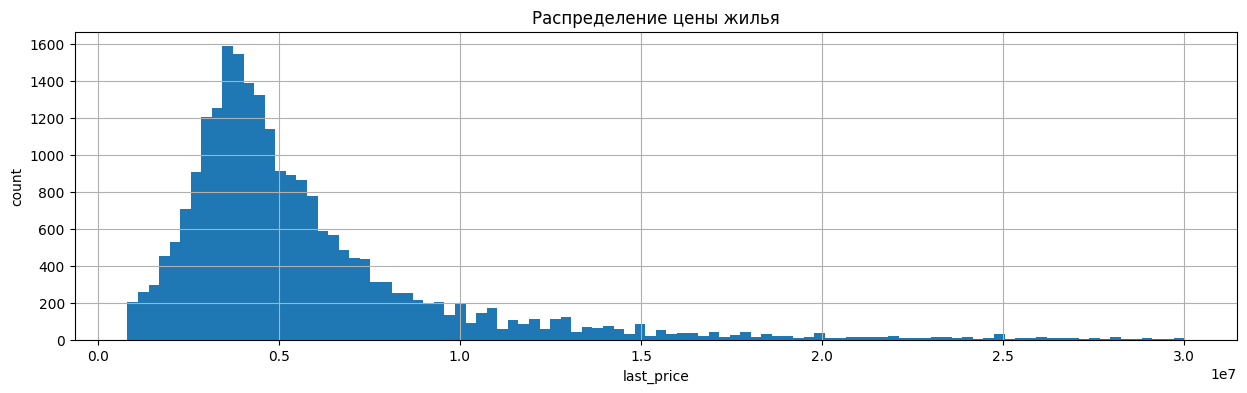

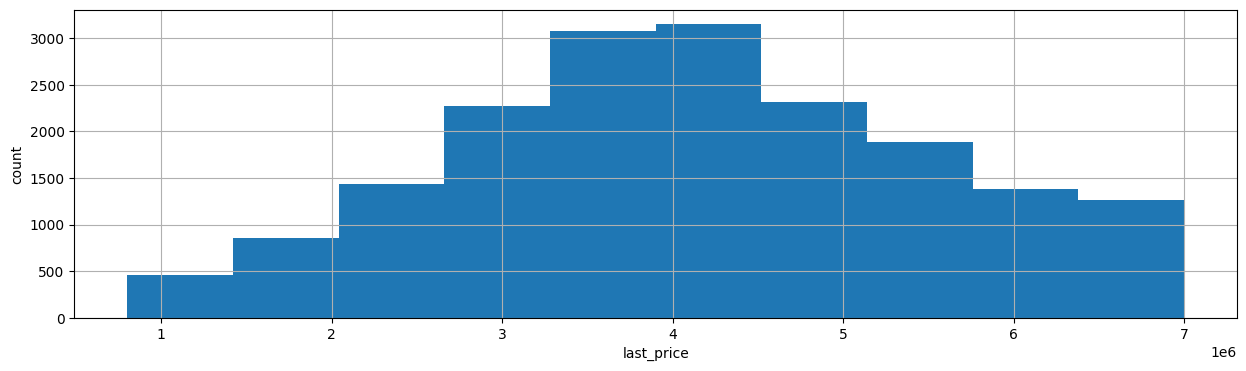

In [94]:
plt.title('Распределение цены жилья')
hist_column(data,'last_price',figsize = (15,4), bins = 100)
hist_column(
    data,'last_price',
    figsize = (15,4), 
    bins = 10, 
    range =(0.8e+6,0.7e+7)
)

Похоже на нормальное распределение, скошенное вправо. Видим плавное увеличение количества объектов от стоимости 1,5 млн до чаще встречаемых 3,5-4,5 млн, и дальше на спад. Объекты дороже 10 млн встречаются уже существенно реже

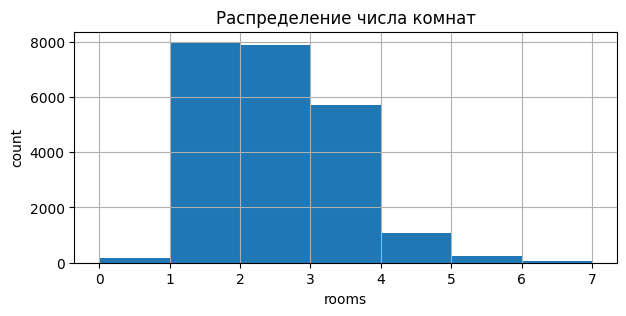

In [95]:
plt.title('Распределение числа комнат')
hist_column(data,'rooms',figsize = (7,3), range =(0,7), bins = 7)

Чаще всего продаются квартиры с 1 или 2 комнатами.

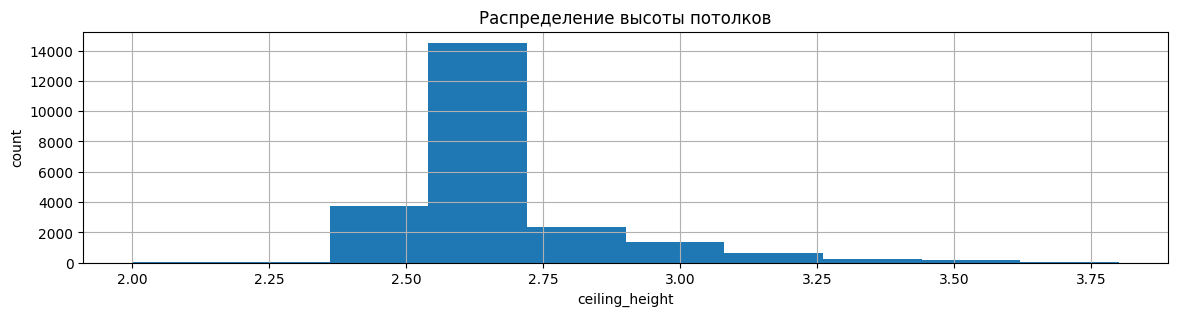

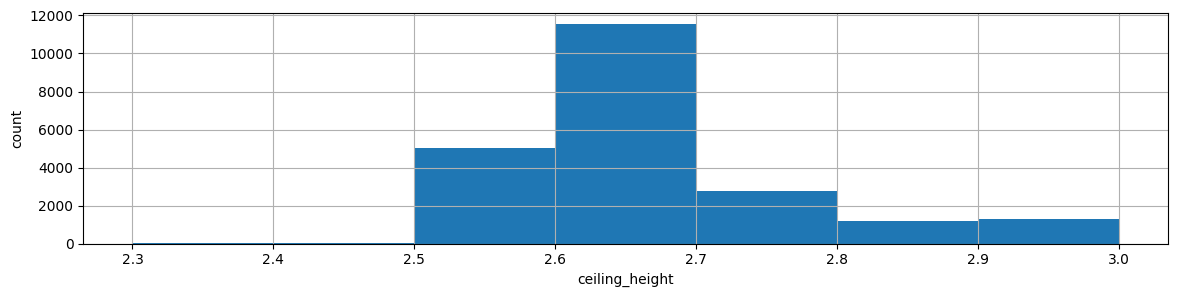

In [96]:
plt.title('Распределение высоты потолков')
hist_column(data,'ceiling_height',figsize = (14,3), bins = 10)
hist_column(
    data,
    'ceiling_height',
    figsize = (14,3), 
    range =(2.3,3), 
    bins = 7)

Наиболее распространенная высота потолков 2.6-2.7м.

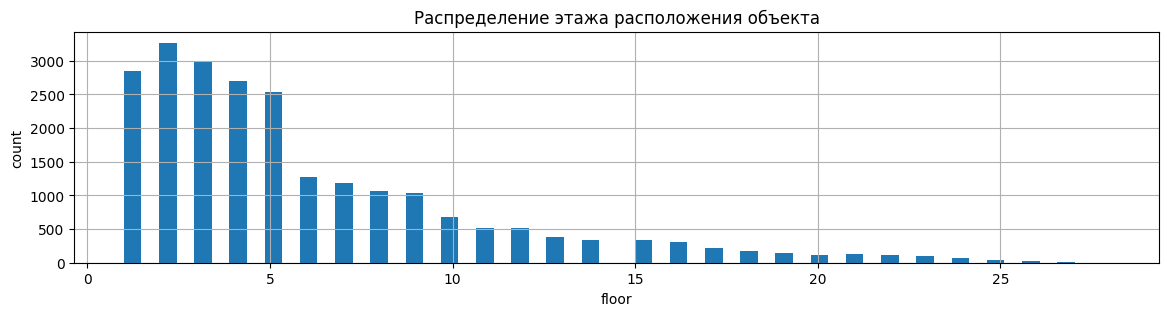

In [97]:
plt.title('Распределение этажа расположения объекта')
hist_column(data,'floor',figsize = (14,3), bins = 56)

Существенно чаще встречаются квартиры, расположенные на этажах 1-5.

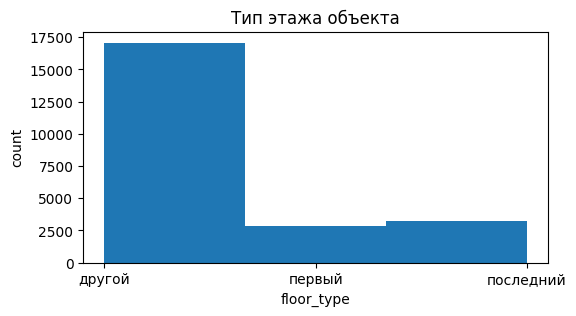

In [98]:
plt.title('Тип этажа объекта')
hist_column(data,'floor_type',figsize = (6,3), bins = 3, grid = False)

Чаще всего встречаются квартиры, расположенные не на первом или последнем этажах.

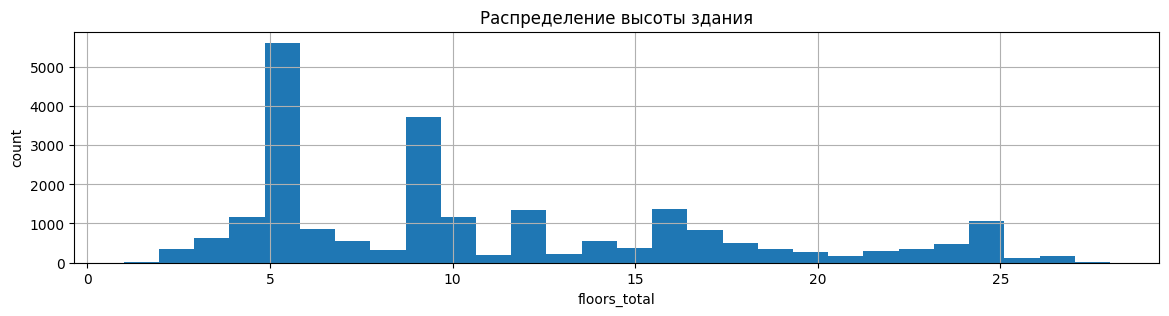

In [99]:
plt.title('Распределение высоты здания')
hist_column(data,'floors_total',figsize = (14,3), bins = 28)

Наиболее частые значения высотностей здания - 5,9,12,16,25 этажки.

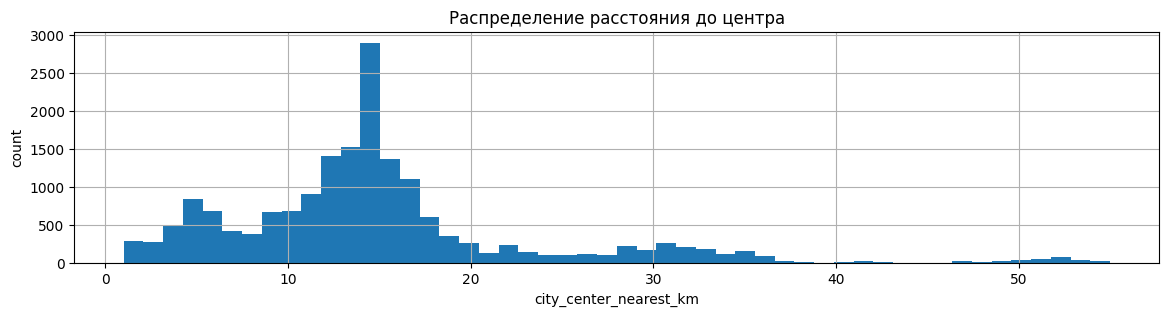

In [100]:
plt.title('Распределение расстояния до центра')
hist_column(data,'city_center_nearest_km',figsize = (14,3), bins = 50)

Значительно чаще других встречаются в продажи квартиры с удаленностью 13-16км от центра города.

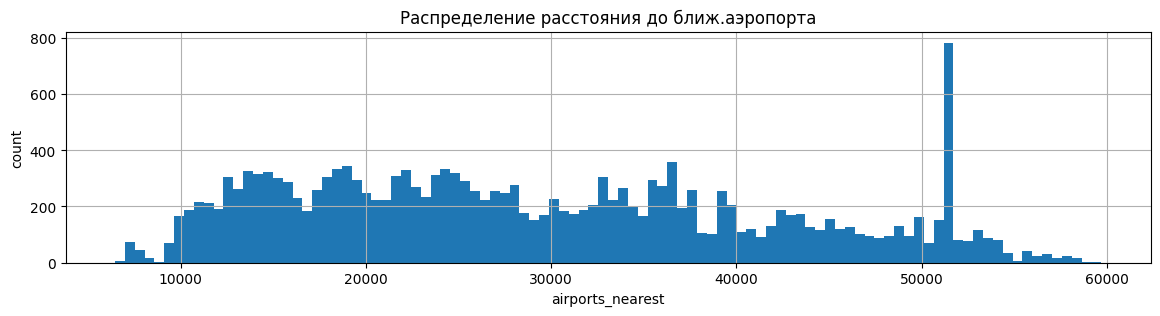

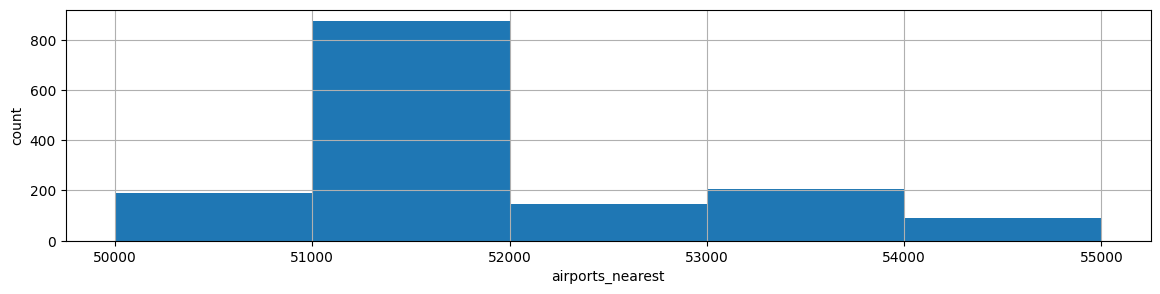

In [101]:
plt.title('Распределение расстояния до ближ.аэропорта')
hist_column(data,'airports_nearest',figsize = (14,3), bins = 100)

hist_column(
    data,'airports_nearest',
    figsize = (14,3), 
    range = (50000,55000),
    bins = 5
)

Наблюдается более менее равномерный разбор по удаленности от аэропорта, единственно видим некоторый пик - часто встречающиеся объекты с удаленностью от аэропорта 51-52км.

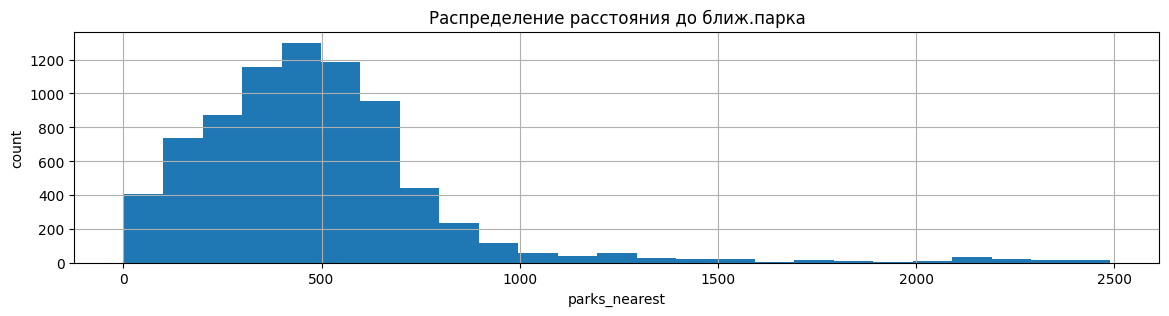

In [102]:
plt.title('Распределение расстояния до ближ.парка')
hist_column(data,'parks_nearest',figsize = (14,3), bins = 25)

Наиболее распространенный вариант - объекты с расстоянием до ближайшего парка = 300-700 метров.

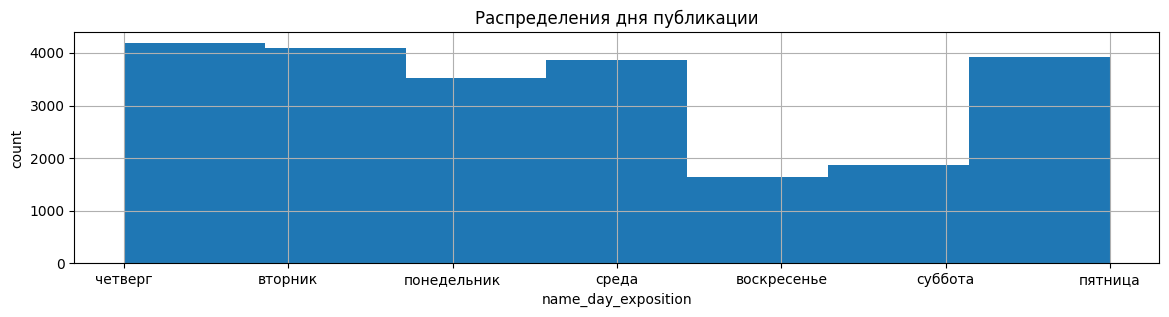

In [103]:
plt.title('Распределения дня публикации')
hist_column(data,'name_day_exposition',figsize = (14,3), bins = 7)

На выходных объявления публикуют реже чем в будни.

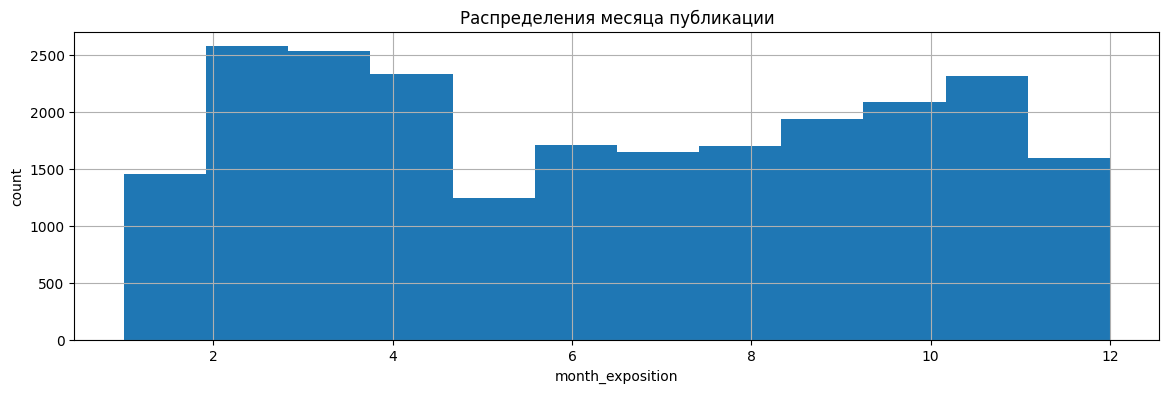

In [104]:
plt.title('Распределения месяца публикации')
hist_column(data,'month_exposition',figsize = (14,4), bins = 12)

Меньше всего объявлений приходится на май месяц.

In [105]:
def describe_column(df, column_name, **kwargs):
    """
    Функция, которая будет выводить диаграмму размаха для столбца и характеристики
    В качестве первого арг. принимает датафрейм, в качестве второго название столбца, 
    через kwargs можно передать доп.параметры для отображения диаграммы.
    """
    df.plot(kind='box', column=column_name, title=column_name,figsize=(4,4), grid=True)
    plt.show()
    
    column_describe = df[column_name].describe()
    IQR = column_describe['75%'] - column_describe['25%']
    
    print ('Характеристики:','\n', column_describe,'\n\n',
           'Межквартильный размах = ', IQR,'\n\n',
           'Пределы нормальных значений (или усы) = ({0},{1})'.
           format((column_describe['25%']-1.5*IQR),(column_describe['75%']+1.5*IQR)),'\n\n')
    

**2) Изучим, как быстро продавались квартиры (столбец `days_exposition`). Этот параметр показывает, сколько дней «висело» каждое объявление.**


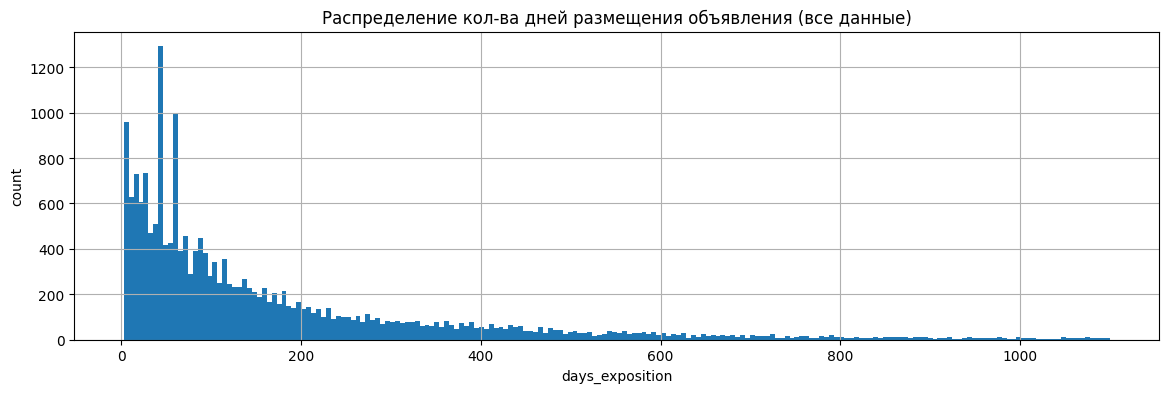

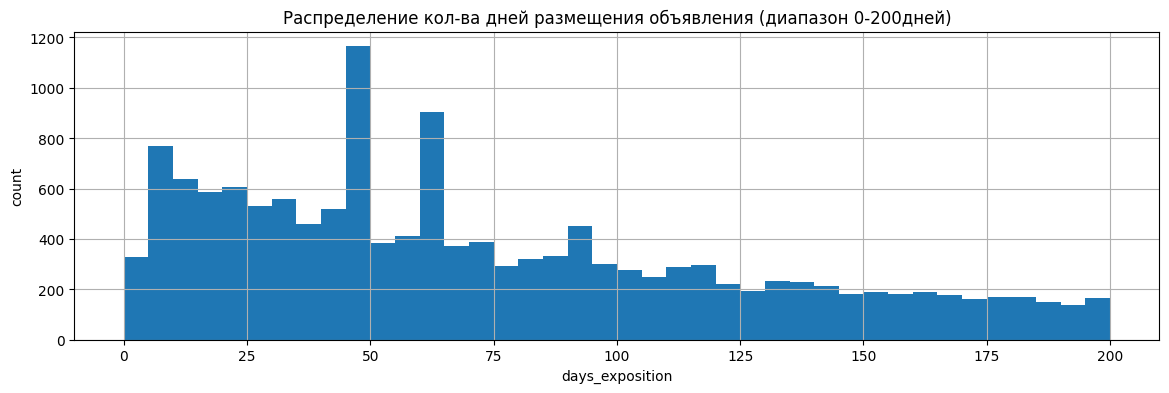

In [106]:
#Построим гистограмму
plt.title('Распределение кол-ва дней размещения объявления (все данные)')
hist_column(data,'days_exposition',figsize = (14,4), bins = 200)

plt.title('Распределение кол-ва дней размещения объявления (диапазон 0-200дней)')
hist_column(
    data,
    'days_exposition',
    figsize = (14,4), 
    range = (0,200), 
    bins = 40)

#Посмотрим  диаграмму размаха и характеристики
# describe_column(data, 'days_exposition')

Распределение величин похоже на распределение Пуассона. 

Чаще всего продажа занимает до 65 дней. Медианное значение количества дней продажи - 93. Быстрыми можно считать продажи до 40 дней, а необычно долгими больше 220 дней.

Также посмотрим на среднюю скорость продаж по годам:

days_exposition
year_exposition                 
2014                  758.604938
2015                  571.393717
2016                  318.003040
2017                  158.305609
2018                   94.054942
2019                   30.868121

None


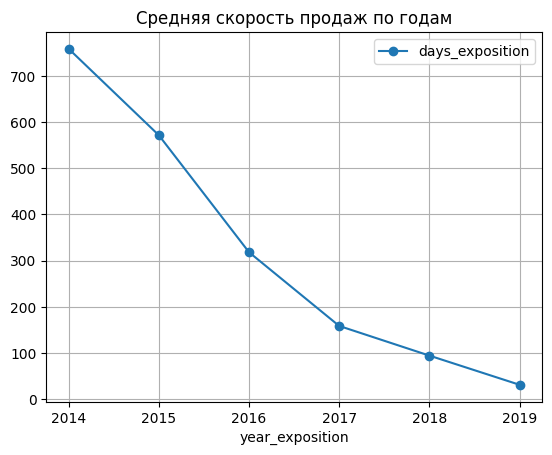

In [107]:
selling_speed_data = data.pivot_table(index = 'year_exposition', values = 'days_exposition')
print (display(selling_speed_data))

selling_speed_data.plot(
    grid=True, 
    style ='o-',
    title = 'Средняя скорость продаж по годам'
);


Если смотреть в разрезе по годам, то заметно как с каждым годом уменьшается количество дней продажи. В 2014-15г среднее количество дней продажи составляло больше 550, в 2019 году это показатель уже составляет 31 день.

**3) Посмотрим, какие факторы больше всего влияют на общую (полную) стоимость объекта? Рассмотрим влияние общей площади на стоимость:** 


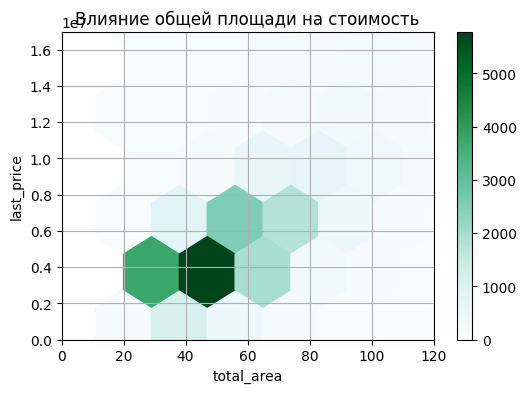

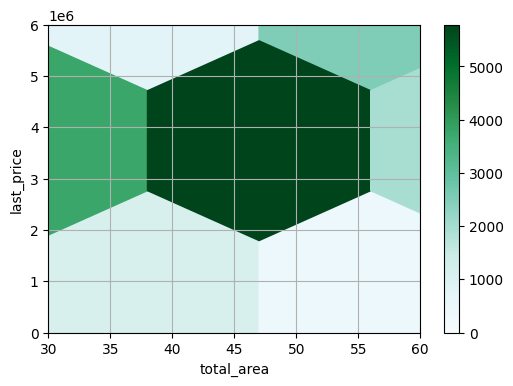

Коэффициент корреляции =  0.785743884386517


Text(0.5, 1.0, 'Влияние общей площади на стоимость')

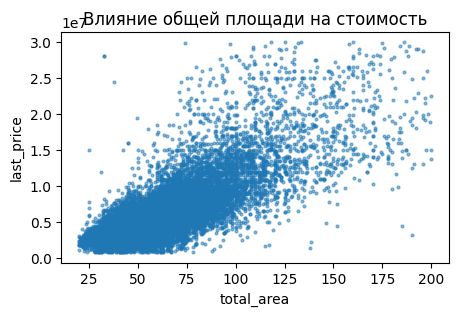

In [108]:
data.plot(
    x='total_area', 
    y='last_price', 
    kind='hexbin', 
    gridsize=10, 
    figsize=(6, 4), 
    sharex=False, 
    grid=True, 
    ylim=(0, 1.7e+7), 
    xlim = (0,120),
    title = 'Влияние общей площади на стоимость'
)
plt.show()

data.plot(
    x='total_area', 
    y='last_price', 
    kind='hexbin', 
    gridsize=10, 
    figsize=(6, 4), 
    sharex=False, 
    grid=True, 
    ylim=(0, 0.6e+7), 
    xlim = (30,60)
)
plt.show()

#Коэф корреляции Пирсона 
print('Коэффициент корреляции = ',data['total_area'].corr(data['last_price']))

data.plot(x='total_area', y='last_price', 
          kind='scatter', figsize=(5, 3),
          alpha = 0.5, s = 4
         ) 
plt.title('Влияние общей площади на стоимость')

Между общей площадью и стоимостью квартиры существует прямая связь (положительная корреляция, коэф.Пирсона = 0.78).

Чаще всего встречаются квартиры с площадью от 36 до 56кв.м и ценой от 1.8 млн до 5.7 млн.

**4) Посмотрим зависимость стоимости от жилой площади и площади кухни:**

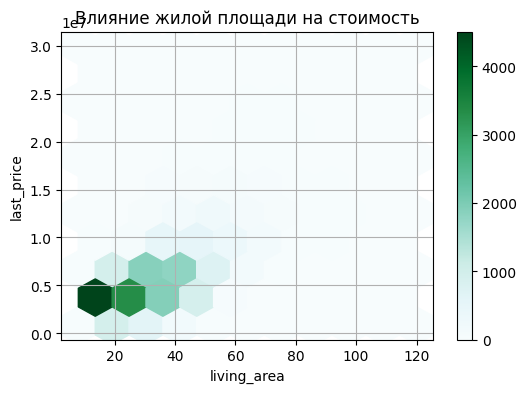

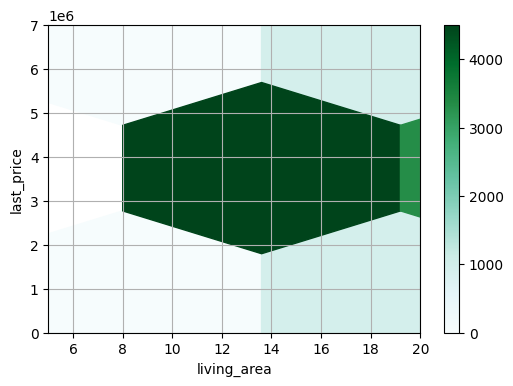

Коэффициент корреляции =  0.6671890158439879


Text(0.5, 1.0, 'Влияние жилой площади на стоимость')

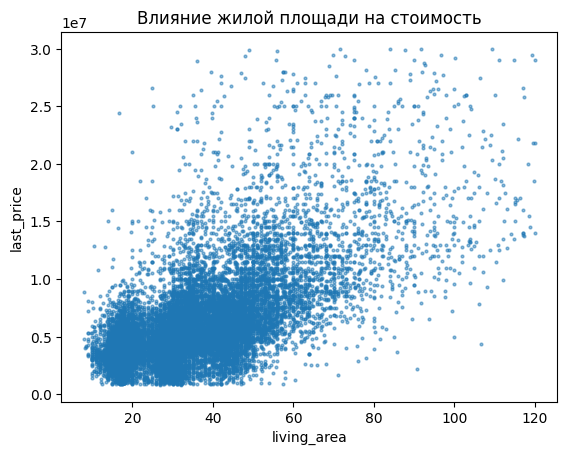

In [109]:
data.plot(
    x='living_area', 
    y='last_price', 
    kind='hexbin', 
    gridsize=10, 
    figsize=(6, 4), 
    sharex=False, 
    grid=True,
    title ='Влияние жилой площади на стоимость'
)
plt.show()

data.plot(
    x='living_area', 
    y='last_price', 
    kind='hexbin', 
    gridsize=10, 
    figsize=(6, 4), 
    sharex=False, 
    grid=True, 
    ylim=(0, 0.7e+7), 
    xlim = (5,20)
)
plt.show()

#Коэф корреляции Пирсона 
print('Коэффициент корреляции = ',data['living_area'].corr(data['last_price']))

data.plot(x='living_area', y='last_price', 
          kind='scatter',alpha = 0.5, s = 4) 
plt.title('Влияние жилой площади на стоимость')

Между жилой площадью и стоимостью квартиры существует прямая связь (положительная корреляция, коэф.Пирсона = 0.66). Не такая сильная как с общей площадью. Примерно до 40 кв.м жилой площади связь ощущается больше, больших квартирах уже не такая отчетливая связь жилой площади с ценой.

Чаще всего встречаются квартиры с жилой площадью от 8 до 19кв.м и ценой от 1.8млн до 5.7 млн.

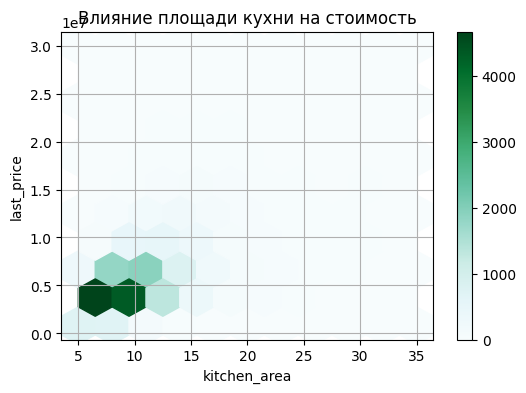

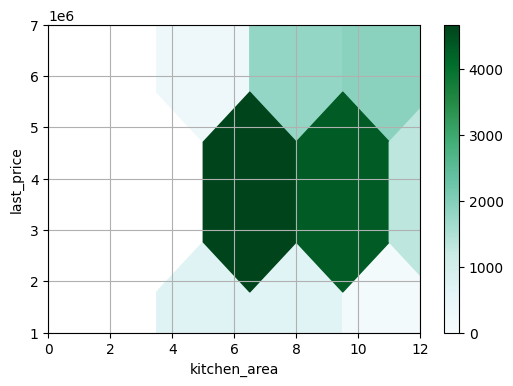

Коэффициент корреляции =  0.5645295835257768


Text(0.5, 1.0, 'Влияние площади кухни на стоимость')

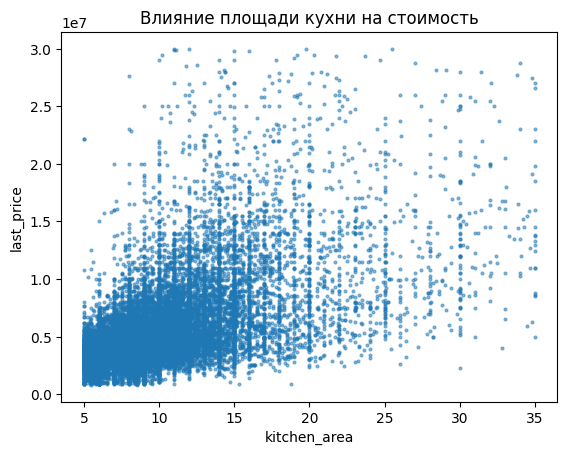

In [110]:
data.plot(
    x='kitchen_area', 
    y='last_price', 
    kind='hexbin', 
    gridsize=10, 
    figsize=(6, 4), 
    sharex=False, 
    grid=True,
    title = 'Влияние площади кухни на стоимость'
)
plt.show()

data.plot(
    x='kitchen_area', 
    y='last_price', 
    kind='hexbin', 
    gridsize=10, 
    figsize=(6, 4), 
    sharex=False, 
    grid=True,
    xlim =(0,12),
    ylim = (0.1e+7,0.7e+7)
)
plt.show()

#Коэф корреляции Пирсона 
print('Коэффициент корреляции = ',data['kitchen_area'].corr(data['last_price']))

data.plot(x='kitchen_area', y='last_price', 
          kind='scatter', alpha = 0.5, s = 4) 
plt.title('Влияние площади кухни на стоимость')

Между площадью кухни и стоимостью квартиры положительная корреляция, но слабо выраженная еще слабее чем с общей площадью (коэф.Пирсона = 0.56).

Чаще всего встречаются квартиры с площадью кухни от 5 до 8кв.м и ценой от 1.8млн до 5.7 млн, и в том же ценовом диапазоне чуть менее выражен блок кухонь от 8 до 11кв.м

Построим для отчета общий график диаграмм рассеяния:

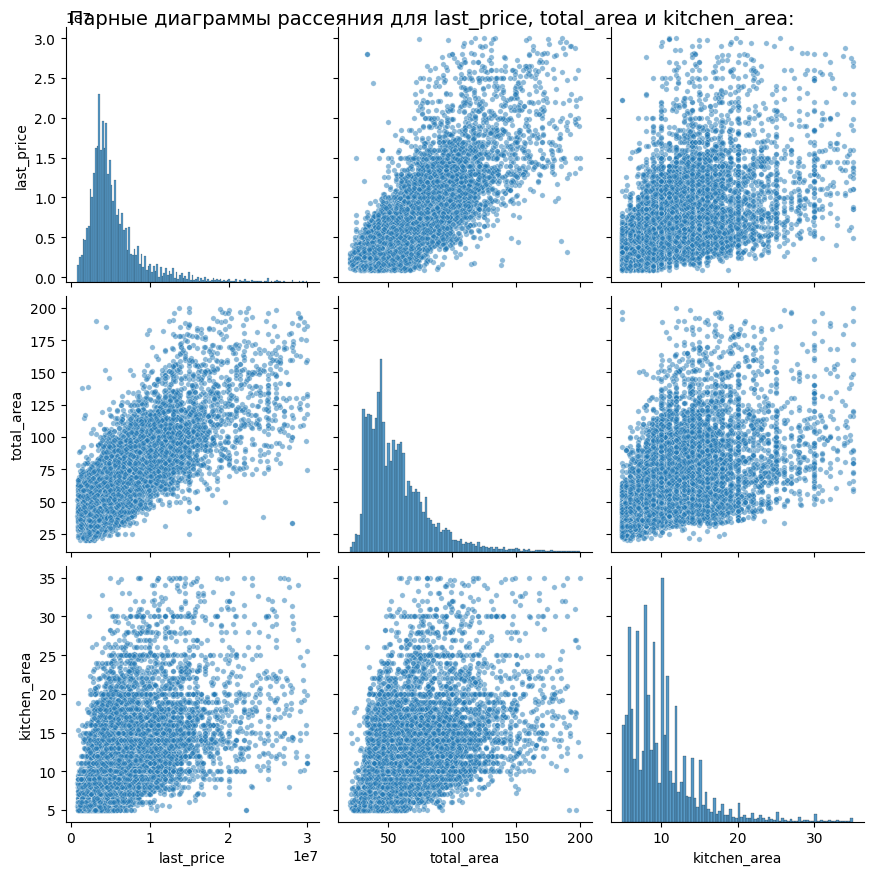

In [111]:
sns.pairplot(data[['last_price', 'total_area', 'kitchen_area']],plot_kws={'alpha': 0.5, 's': 15})
plt.suptitle('Парные диаграммы рассеяния для last_price, total_area и kitchen_area:', fontsize=14);
plt.gcf().set_size_inches(9,9);

**5) Посмотрим зависимость стоимости от количества комнат:**

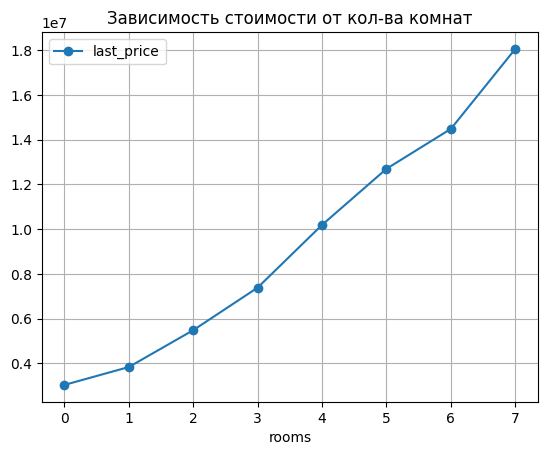

In [112]:
#Группируем таблицу по количеству комнат, 
#для каждой найдем среднюю стоимость и отобразим на графике
data.pivot_table(
    index = 'rooms', 
    values = 'last_price',
).plot(
    grid=True, 
    style ='o-', 
    title = 'Зависимость стоимости от кол-ва комнат');

На графике видна прямая связь между количеством комнат и стоимостью, чем больше комнат - тем больше стоимость.

**6) Посмотрим зависимость стоимости от типа этажа, на котором расположена квартира (первый, последний, другой):**

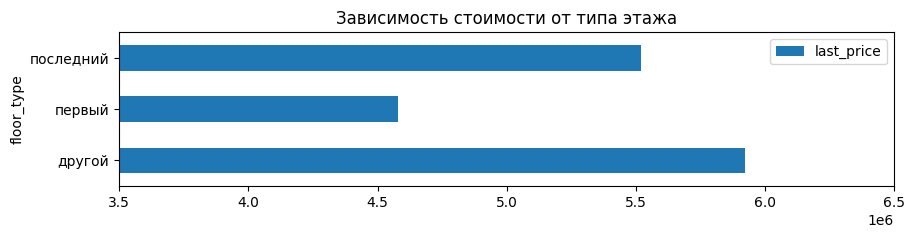

In [113]:
#Сгруппируем таблицу по типу этажа, 
#для каждого найдем среднюю стоимость и отобразим на графике
data.pivot_table(
    index = 'floor_type', 
    values = 'last_price').plot(
    kind='barh', 
    figsize =(10,2), 
    xlim = (3.5e+6,6.5e+6),
    title = 'Зависимость стоимости от типа этажа'
);

Дешевле всего стоят объекты, расположенные на первом этаже. Потом подороже стоят квартиры на последнем этаже, и дороже всех "другой этаж"

**6) Посмотрим зависимость стоимости от даты размещения (день недели, месяц, год):**

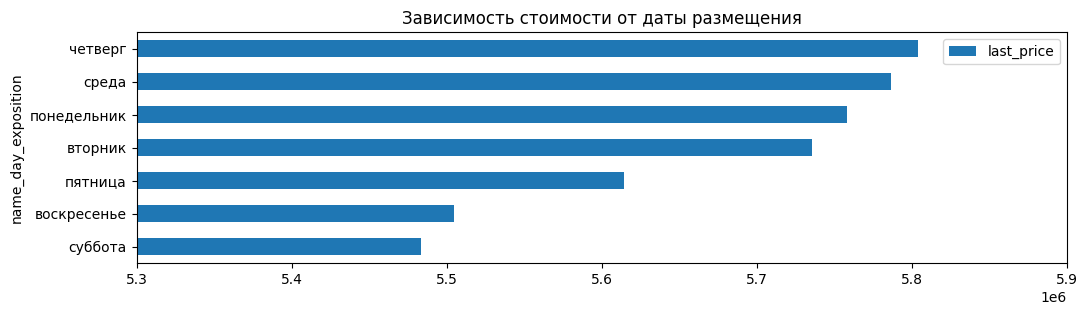

In [114]:
#Сгруппируем таблицу по дню публикации,
#для каждого найдем среднюю стоимость и отобразим на графике
data.pivot_table(
    index = 'name_day_exposition', 
    values = 'last_price').sort_values(by = 'last_price', ascending=True).plot( 
    kind='barh', 
    figsize =(12,3), 
    xlim = (5.3e+6,5.9e+6),
    title = 'Зависимость стоимости от даты размещения'
);

Дешевле всего выставляют квартиры на продажу в выходные (дешевле на 100-300тысяч)

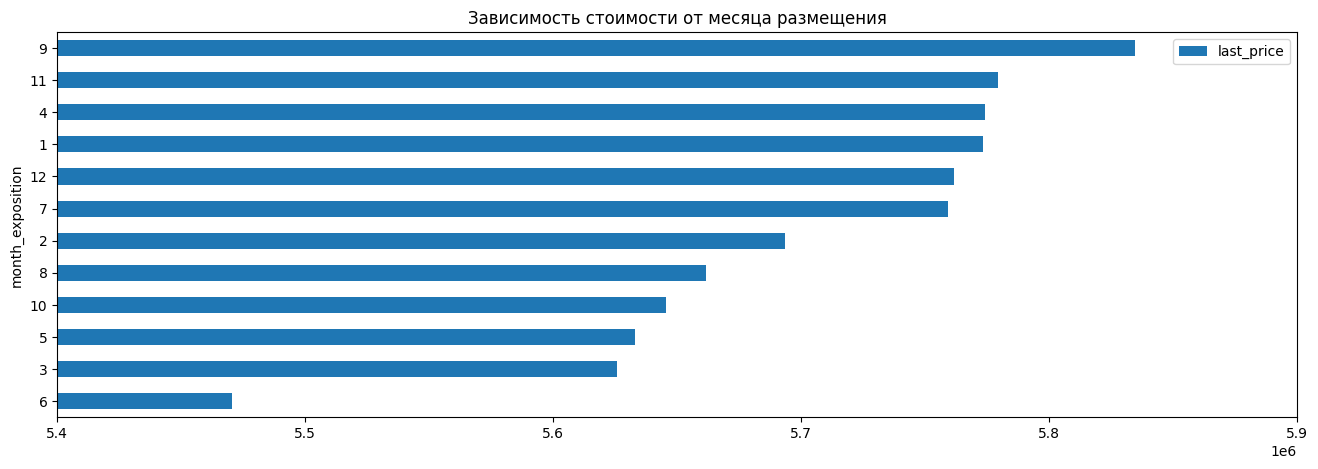

In [115]:
#Сгруппируем таблицу по месяцу публикации,
#для каждого найдем среднюю стоимость и отобразим на графике
data.pivot_table(
    index = 'month_exposition', 
    values = 'last_price').sort_values(by = 'last_price', ascending=True).plot(
    kind='barh', 
    figsize =(16,5), 
    xlim = (5.4e+6,5.9e+6),
    title = 'Зависимость стоимости от месяца размещения'
);


Дешевле всего выставляют квартиры на продажу в июне (дешевле порядка 300-400тысяч). В остальном стоимость не сильно зависит от месяца размещения.

In [116]:
#Сгруппируем таблицу по году публикации,
#для каждого найдем среднюю стоимость,и количество объявлений
data_by_year = data.pivot_table(
    index = 'year_exposition', 
    values = 'last_price',
    aggfunc=['mean', 'count']
)

#Переименуем столбцы
data_by_year.columns = ['mean_price', 'count_exp']

print (display(data_by_year))

mean_price  count_exp
year_exposition                         
2014             9.578262e+06        129
2015             6.532382e+06       1136
2016             5.662236e+06       2698
2017             5.613443e+06       8004
2018             5.520128e+06       8343
2019             6.023354e+06       2810

None


In [117]:
#Сгруппируем таблицу по году публикации,
#для каждого найдем среднюю площадь
total_by_year = data.pivot_table(
    index = 'year_exposition', 
    values = 'total_area',
)

#Объеденим таблицы
data_by_year = data_by_year.join(total_by_year)

print (display(data_by_year))

mean_price  count_exp  total_area
year_exposition                                     
2014             9.578262e+06        129   80.749612
2015             6.532382e+06       1136   65.124032
2016             5.662236e+06       2698   58.840586
2017             5.613443e+06       8004   57.657734
2018             5.520128e+06       8343   56.081733
2019             6.023354e+06       2810   56.683843

None


 Можно заметить, что с каждым годом с 2014 по 2018 включительно уменьшается средняя стоимость недвижимости, а также с каждым годом увеличивается количество объявлений, только выбивается 2019г, возможно у нас в таблице данные не за весь 2019г. Также видим резкое уменьшение средней площади продаваемых квартир с 2014 по 2016года, далее по годам уменьшение площади продолжалось незначительно.

 Но однако одно лишь изменение цены по годам не дает нам полноценного вывода, необходимо еще учитывать кол-во записей за каждый год, изменения кол-ва подданых объявлений из разных локаций (Спб/область, т к они стоят по-разному и в разные годы могло быть больше квартир из города или больше из области и др
 
Посмотрим какие месяца 2019г вошли в нашу таблицу: 

In [118]:
print (data.loc[
    data['first_day_exposition'].dt.year == 2019
]['first_day_exposition'].dt.month.sort_values().unique())

[1 2 3 4 5]


Да, данные в таблице представлены по с ноября 2014г по май 2019г.

Построим еще графики для наглядности:

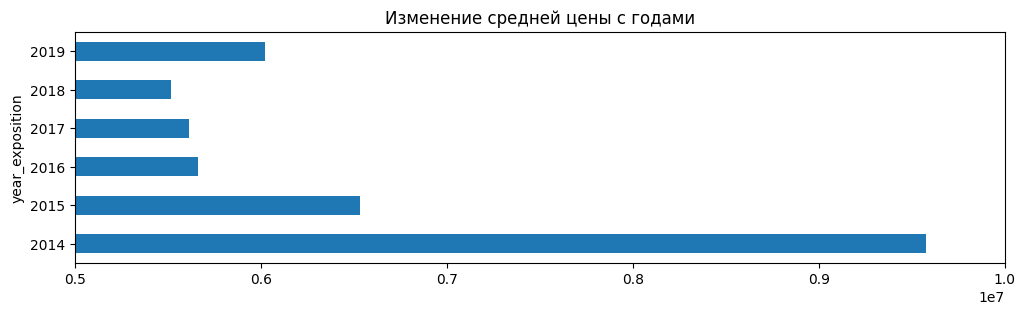

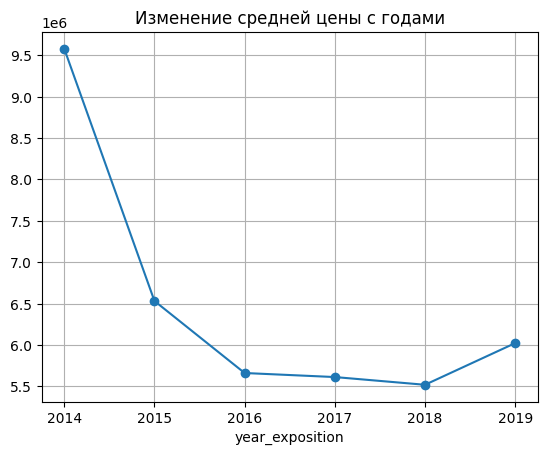

In [119]:
data_by_year['mean_price'].plot(
    kind='barh', 
    figsize =(12,3), 
    xlim = (5e+6,10e+6),
    title = 'Изменение средней цены с годами'
)
plt.show()

data_by_year['mean_price'].plot(
    grid=True, 
    style ='o-',
    title = 'Изменение средней цены с годами'
)
plt.show()


По графику наглядно видно, что с 2014 по 2016 года квартиры дешевели, к 2019 году опять чуть выросли в цене, но не достигли уровня 2014-15годов. Но опять же, у нас данные не за весь 2019г, поэтому полноценных выводов, касаемо этого года, сделать не представляется возможным.

In [120]:
data_by_year.columns

Index(['mean_price', 'count_exp', 'total_area'], dtype='object')

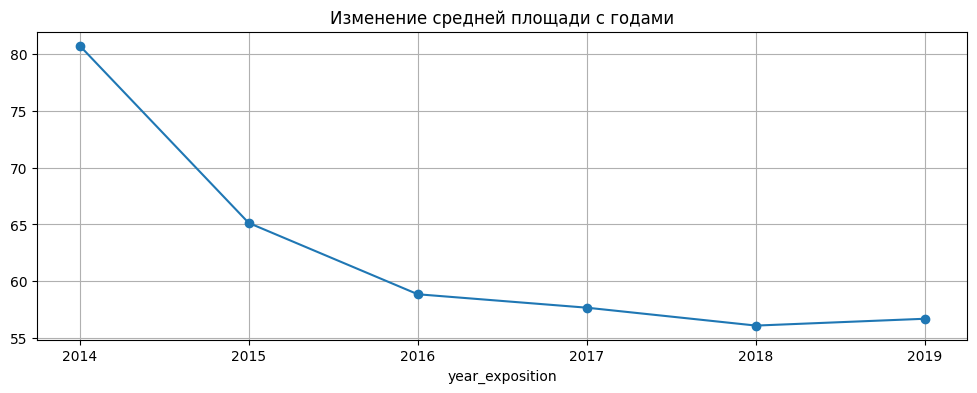

In [121]:
data_by_year['total_area'].plot(
    grid=True, 
    style ='o-', 
    figsize=(12,4), 
    title ='Изменение средней площади с годами')
plt.show()

**7) Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений:**

In [122]:
#сгруппируем по населенному пункту и посчитаем кол-во объявлений 
#и среднюю цену квадратного метра для каждого
mean_price_sq_metr = data.pivot_table(
    index='locality_name',
    values='square_metr_price',
    aggfunc=['mean', 'count'])

#Переименуем столбцы
mean_price_sq_metr.columns = ['mean_sq_metr_price', 'count_exp']

#Округляем до 2 знака после запятой
mean_price_sq_metr['mean_sq_metr_price'] = round (
    mean_price_sq_metr['mean_sq_metr_price'],2
)

#Выведем ср. цену кв метра для 10 населенных пунктов с наибольшим числом объявлений
print (display(
    (
        mean_price_sq_metr
        .sort_values(by='count_exp',ascending=False).head(10)
        .sort_values(by='mean_sq_metr_price',ascending=False)
    )
),'\n')


mean_sq_metr_price  count_exp
locality_name                                 
Санкт-Петербург           110567.31      15335
Пушкин                    103077.24        363
Кудрово                    95323.60        472
Парголово                  90333.59        326
Мурино                     86087.59        590
Шушары                     78656.22        439
Колпино                    75333.05        337
Гатчина                    68746.10        307
Всеволожск                 68655.36        398
Выборг                     58454.50        235

None 



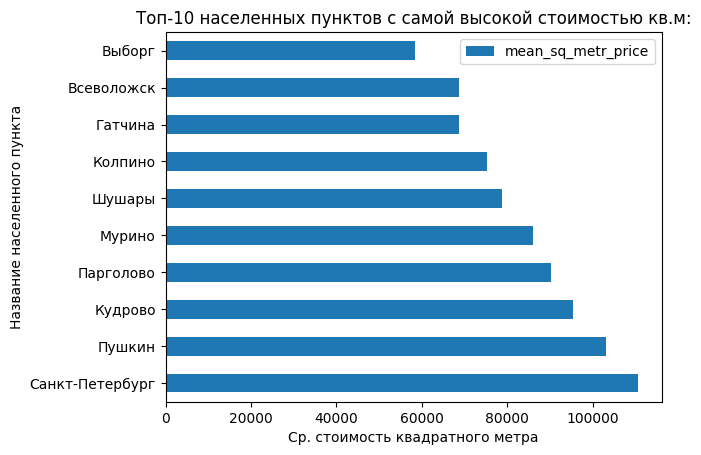

In [123]:
(
    mean_price_sq_metr
    .sort_values(by='count_exp',ascending=False).head(10)[['mean_sq_metr_price']]
    .sort_values(by='mean_sq_metr_price',ascending=False)
    .plot.barh(title ='Топ-10 населенных пунктов с самой высокой стоимостью кв.м:')
)
plt.xlabel('Ср. стоимость квадратного метра')
plt.ylabel('Название населенного пункта');

Населенный пункт с самой высокой стоимостью квадратного метра - Санкт-Петербург. Далее идут Пушкин, Кудрово и Парголово.

**8) Посмотрим как стоимость недвижимости зависит от расстояния до центра города:** 

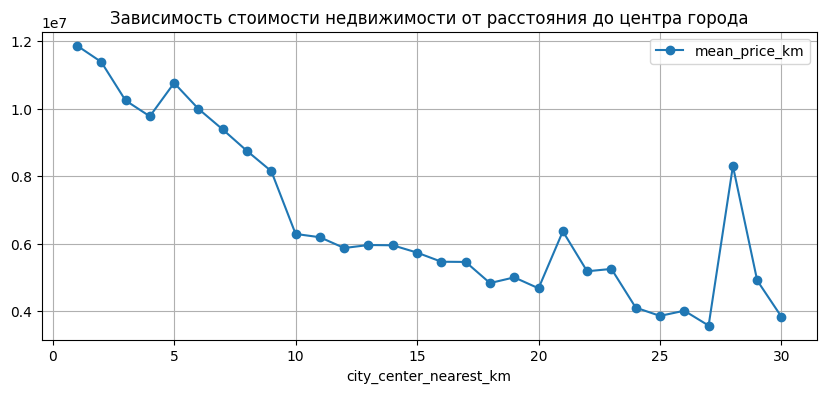

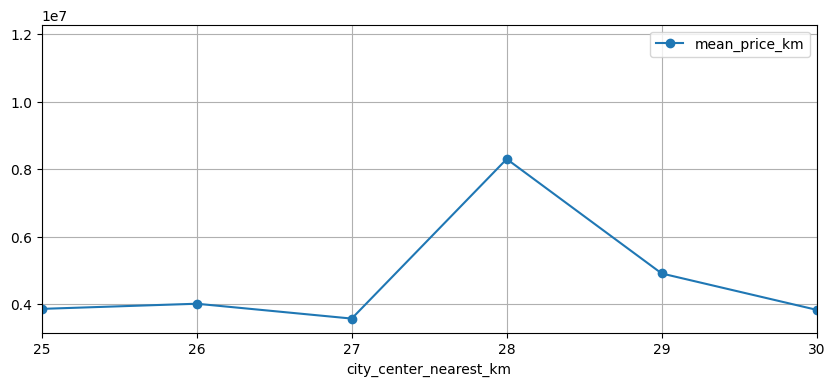

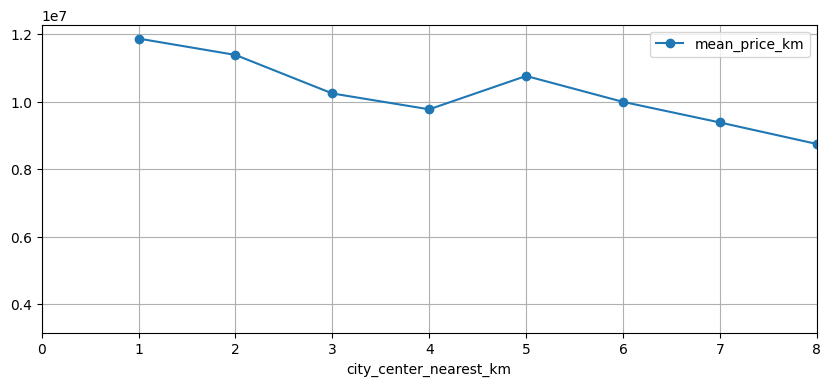

In [124]:
#Формируем таблицу из объектов недвижимости в СПб
spb_data = data.query('locality_name == "Санкт-Петербург"')

#Создадим табл. сгруппированную по км до центра 
#и посчитаем среднюю цену каждого километра
price_km_to_center = spb_data.pivot_table(
    index='city_center_nearest_km',
    values='last_price'
)

#Переименуем столбец
price_km_to_center.columns = ['mean_price_km']

price_km_to_center.plot(
    figsize=(10,4),
    grid = True,
    style ='o-', 
    title = 'Зависимость стоимости недвижимости от расстояния до центра города'
)

price_km_to_center.plot(
    figsize=(10,4),
    grid = True,
    style ='o-', 
    xlim = (25,30)
);

price_km_to_center.plot(
    figsize=(10,4),
    grid = True,
    style ='o-', 
    xlim = (0,8)
);

Чем ближе к центру города, тем дороже цена квартиры, но наблюдается всплеск цены на удаленных районах >27км.

In [125]:
print (display(
    spb_data.query('city_center_nearest_km in [27,28,29]').sort_values(by='city_center_nearest_km')
))

total_images  last_price  total_area first_day_exposition  rooms  \
7640           20.0   3975000.0        74.0           2018-08-20    3.0   
13983          18.0   4150000.0        36.0           2018-09-05    1.0   
18183           9.0   2600000.0        46.0           2017-11-10    1.0   
739            13.0  14350000.0        74.0           2017-11-28    2.0   
5894            6.0   2250000.0        32.0           2018-02-27    1.0   
803             0.0   7600000.0       111.0           2017-07-26    3.0   
1096            0.0   4072000.0        38.0           2015-10-14    1.0   
9451            0.0   3413000.0        43.0           2015-11-10    1.0   
10666          10.0   4850000.0        62.0           2017-05-16    3.0   
11515          16.0   4700000.0        51.0           2016-06-07    2.0   
17605           0.0   4990000.0        71.0           2015-10-14    3.0   
18741           0.0   3666000.0        39.0           2015-11-09    1.0   
19681          20.0   4370000.0        54.7           2016-03-23    3.0   
22658           0.0   5144000.0        64.0           2015-10-14    2.0   
22885          17.0   6300000.0        92.0           2017-07-20    3.0   

       ceiling_height  floors_total  living_area  floor  is_apartment  ...  \
7640             3.20             3         43.8      2         False  ...   
13983            2.50            10         20.0      7         False  ...   
18183            2.65             2         20.0      1         False  ...   
739              3.13             5         30.0      3         False  ...   
5894             2.65             2         16.5      2         False  ...   
803              3.00            16         63.0     12         False  ...   
1096             2.65             5         16.0      4         False  ...   
9451             2.65             5         18.0      1         False  ...   
10666            2.65             5         35.7      1         False  ...   
11515            2.60             5         30.0      1         False  ...   
17605            2.65             5         42.0      1         False  ...   
18741            2.65             5         16.0      2         False  ...   
19681            2.50             5         32.8      5         False  ...   
22658            2.65             5         33.0      5         False  ...   
22885            2.65            16         46.0      7         False  ...   

       parks_nearest  ponds_around3000  ponds_nearest  days_exposition  \
7640             NaN                 1          498.0            112.0   
13983            NaN                 0            NaN             45.0   
18183            NaN                 0            NaN             29.0   
739           1496.0                 0            NaN            128.0   
5894             NaN                 0            NaN            178.0   
803            185.0                 2           72.0             66.0   
1096             NaN                 0            NaN            285.0   
9451             NaN                 0            NaN            258.0   
10666            NaN                 0            NaN             63.0   
11515            NaN                 0            NaN            539.0   
17605            NaN                 0            NaN            285.0   
18741            NaN                 0            NaN            259.0   
19681            NaN                 0            NaN            939.0   
22658            NaN                 0            NaN            285.0   
22885           36.0                 2           46.0             14.0   

      square_metr_price  name_day_exposition  month_exposition  \
7640            53716.2          понедельник                 8   
13983          115277.8                среда                 9   
18183           56521.7              пятница                11   
739            193918.9              вторник                11   
5894            70312.5              вторн

None


In [126]:
print (display(spb_data.query('city_center_nearest_km in [28]')))

total_images  last_price  total_area first_day_exposition  rooms  \
739           13.0  14350000.0        74.0           2017-11-28    2.0   
5894           6.0   2250000.0        32.0           2018-02-27    1.0   

      ceiling_height  floors_total  living_area  floor  is_apartment  ...  \
739             3.13             5         30.0      3         False  ...   
5894            2.65             2         16.5      2         False  ...   

      parks_nearest  ponds_around3000  ponds_nearest  days_exposition  \
739          1496.0                 0            NaN            128.0   
5894            NaN                 0            NaN            178.0   

     square_metr_price  name_day_exposition  month_exposition  \
739           193918.9              вторник                11   
5894           70312.5              вторник                 2   

      year_exposition  floor_type  city_center_nearest_km  
739              2017      другой                    28.0  
5894             2018   последний                    28.0  

[2 rows x 28 columns]

None


На 28ом километре скачок средней цены за квадратный метр, из-за того что в выборке только две квартиры на 28-ом км, и одна из них стоит 2,2млн а другая 14,3млн. т.е это не показательный скачок. 

Также посмотрим на долю квартир разных категорий (первый, последний, другой), которые продаются на 2 (перед провалом), 4(провал) и 5-ом км(скачок), чтобы объяснить пик и провал в центре:

In [127]:
#Напишем функцию для отображени долей кв по типу этажа
#на выбранном км
def data_plot_pie(data, km):
   
    data_km = data.query('city_center_nearest_km in [@km]').groupby(
    by='floor_type')['floor_type'].count()

    ax = data_km.plot(
        kind='pie',
        figsize = (4,5),
        autopct='%1.1f%%',
        title = 'Доля квартир по типу этажа на {0} километре'.format(km))
    ax.set_ylabel('')
    plt.show()

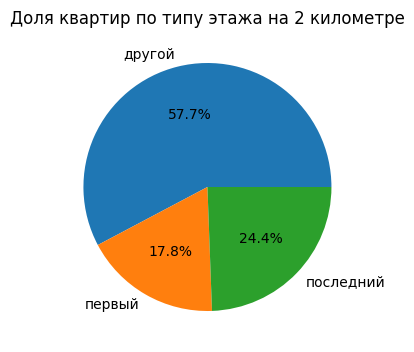

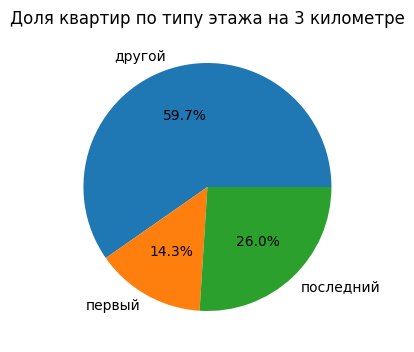

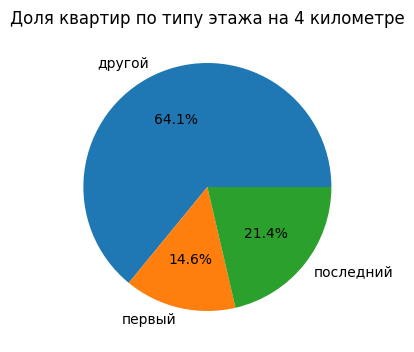

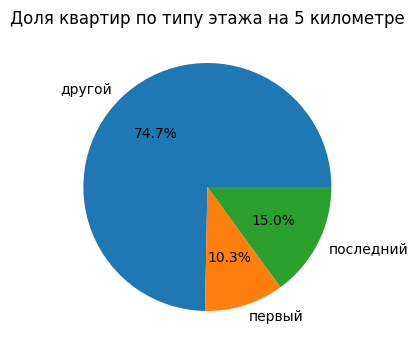

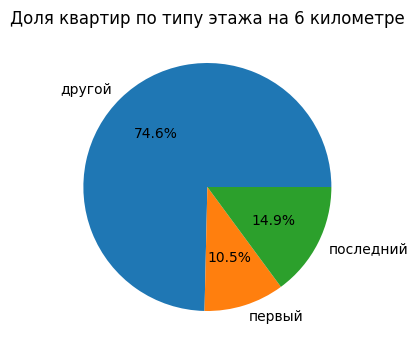

In [128]:
data_plot_pie(spb_data, 2)
data_plot_pie(spb_data, 3)
data_plot_pie(spb_data, 4)
data_plot_pie(spb_data, 5)
data_plot_pie(spb_data, 6)

На первых километрах больше встречались квартиры на первом или последнем этажах, соответсвенно мы видим одну тенденцию на участке 0-4 км. Далее, начиная с 5 километра доля квартир с типом этажа "другой" возрастает на 10,5%, что обуславливает скачок цены на графике, и на последующих километрах эта тенденция сохраняется.

Проанализировав информацию, можно сделать общий вывод: чем ближе к центру города, тем дороже цена квартиры
 

<a id='section_4'></a>
### Шаг 4. Общий вывод


#### Цели исследования:

Установить параметры для определения рыночной стоимости объектов недвижимости. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

***

#### Полученные данные были проверены на пропуски, аномалии и ошибки. и прошли следующую предобработку:
* В столбце `is_apartment ` обнаружено самое большое количество пропусков 20924 из 23699а это составляет 88%, а также сами значения очень неравномерно распределены (значений False 2725, значений True 50). Из-за большого количества пропусков, столбец врядли пригоден для анализа.

    Но можно предположить, что скорее всего пользователи просто забывали проставлять галочку является ли квартира апартаментом или нет. Если не указано, что квартира является апартаментом, то скорее всего она и не является им, и там должно быть значение False. Поэтому заменили эти пропуски на False, и заодно изменили тип столбца на булев, как и должен быть.

*  Столбцы `parks_nearest` и `parks_around3000` имеют по 15620 (это > 60%) и 5518 пропущенных значений соответственно. Возможные причины пустых строк: неверное определение геопозиции к примеру из-за впн(если при обработке определяется геопозиция), либо ошибка записи/выгрузки данных.  

    Можно предположить, что случаях отсутствия значений в столбцах `parks_nearest` или `parks_around3000`, парка рядом с недвижимостью нет.
    
    В столбце `parks_nearest` данные были представлены с учетом 6-ого знака после запятой, для более точного анализа произвели округление значений до одного знака после запятой.  Есть редко встречающиеся значения больше 2500, заполнили их пустыми значениями, после чего количество пропусков увеличилось до 15636. Пропуски в этом столбце оставили.
    
    Пропуски в `parks_around3000` нулями, и изменили тип столбца на целочисленный, так как количество парков не может быть дробным.
    
* Столбцы `ponds_nearest` и `ponds_around3000` имеют по 14589 и 5518 пропущенных значений. Аналогично данные в этих столбцах заполняются автоматически, на основе картографических данных. Возможные причины пустых строк: неверное определение геопозиции к примеру из-за впн(если при обработке определяется геопозиция), либо ошибка записи/выгрузки данных.

    Заметно, что чаще отсутсвуют данные по расстоянию до водоема (или в прошлом случае до парка), чем данные о том есть ли водоем/парк в радиусе 3км. 
    
    Можно предположить, что случаях отсутствия значений в столбцах `ponds_nearest` или `ponds_around3000`, водоема рядом с недвижимостью нет.
    
    В столбце `ponds_nearest` данные были представлены с учетом 6-ого знака после запятой, для более точного анализа произвели округление значений до одного знака после запятой.  Есть редко встречающиеся значения больше 1150, заполнили их пустыми значениями, после чего количество пропусков увеличилось до 14700. Пропуски в этом столбце оставили.
    
    Пропуски в `ponds_around3000` заменили нулями, и поменяли тип столбца на целочисленный, так как количество водоемов не может быть дробным.

* Столбец `balcony` имеет 11519 пропущенных значений. Можно предположить, что если в объекте недвижимости, пользователь не указал число балконов, то их скорее всего нет. Поэтому заменили пустые строки на нули, и также поменяли тип столбца на целочисленный, так как количество балконов не может быть дробным.

* Столбец `locality_name` содержал 49 пропусков. Отсутствие записей в этом столбце может быть обусловлено человеческим фактором или ошибкой записи/выгрузки данных. 

    Для строк с пустыми значениями, в которых расстояние до центра города соответсвует Спб, заменили пропуски на значение 'Санкт-Петербург' (таким методом удалось заполнить 38 значений). Остальные строки с пропусками удалили (11 строк).
    
    Также поработали с неявными дубликатами в названиях: изначально количество встречающихся названий населенных пуктов в столбце было 364, после удаления неявных дубликатов стало 305.

* Столбец `city_center_nearest` содержит 5519 пропущенных значений. Данные в этом столбце были заполнены автоматически, на основе картографических данных. Возможные причины пустых строк: неверное определение геопозиции к примеру из-за впн(если при обработке определяется геопозиция), либо ошибка записи/выгрузки данных. Пустые значения пока оставим.

     Данные были представлены с учетом 6-ого знака после запятой, для более точного анализа произвели округление значений до одного знака после запятой.  Есть аномальные, редко встречающиеся значения больше 55000, заполнили их пустыми значениями, после чего количество пропусков увеличилось до 5523

* Столбец `airports_nearest` содержал 5542 пропуска. Данные в этом столбце заполняются автоматически, на основе картографических данных. Возможные причины пустых строк: неверное определение геопозиции к примеру из-за впн(если при обработке определяется геопозиция), либо ошибка записи/выгрузки данных. 

     Данные были представлены с учетом 6-ого знака после запятой, для более точного анализа произвели округление значений до одного знака после запятой.  Есть аномальные, редко встречающиеся значения больше 60000 и меньше 6000, заполнили их пустыми строками, после чего количество пропусков увеличилось до 5708

   Был рассмотрен вариант: Для всех населенных пунктов, кроме самого города Спб, можно попытаться заменить пропуски средним значением, соотвествующему населенному пункту. Кроме самого города, так как направление расположения квартиры относительно аэропорта в рамках города неизвестно, и ошибка может быть велика (в силу того что от одного края города до другого несколько десятков километров).
   И как раз большинство пропущенных значений не в Спб, а с населенных пунктов из области.

    Но, таким путем удалось заполнить только 725 пропусков. Оказалось что есть 283 населенных пункта из области, где ни в одном объекте недвижимости не заданы расстояния до эропорта. Напомним, что всего количество населенных пунктов, включая Спб = 305. Т.е в большинстве не указано расстояние до аэропорта.
    
    Была выдвинута гипотеза: *"Можно предположить, что для этих же населенных пунктов и не указаны как раз данные других автоматически заполняющихся столбцов на основе картографических данных типа  `parks_nearest`, `ponds_nearest` и др."* Список этих 283 населенных пунктов находится в переменной locality_name_list1.
    
    Проверили на примере `parks_nearest`, оказалось что у всех этих населенных пунктов, за исключением Кронштада и Зеленогорска действительно отсутсвуют данные и в столбце `park_nearest` и в столбце `airports_nearest`. Также визуально посмотрели на 5 строк для трех случайно выбранных населенных пунктов, и там оказалось что действительно во всех колонках, которые заполнялись автоматически на основе картографических данных - пусто! 
    
    Похоже гипотеза верна. Для полного подтверждения, при необходимости, надо дополнительно проанализировать данные. В виду ограниченности времени, и того факта, что это не является целью текущей задачи, этот анализ дальше проводится не стал. 
    
    Оставшиеся пропуски в данном столбце оставили.
   
* Столбец `ceiling_height` содержал 9195 пропусков. Пропуски в этом столбце могут быть обусловлены тем, что клиент не захотел/забыл указать эти данные. В столбце было обнаружено 147 аномальных значений >3.8м и 3 значения <1.8. Пропуски и аномальные значения заменили медианным значением (2,65м).

* Столбец `days_exposition` содержал 3181 пропуска. Пропуски могут быть связаны с человеческим фактором или ошибкой записи/выгрузки данных. Пропуски в этом столбце заполнять не стали.
    Обработали значения для дальнейшего анализа, исключив аномальные значения больше 1100 дней или меньше 3 дней. Количество пропусков в столбце после манипуляций составило 3347.
    
* Столбец `floors_total` содержал 86 пропусков. Пропуски в этом столбце могут быть обусловлены тем, что человек мог не захотеть/забыть указать это значение, а также могут быть связаны с человеческим фактором или ошибкой записи/выгрузки данных. Пропуски оставили.

    Изменили тип столбца на целочисленный, так как общее количество этажей не может быть дробным.
     
    Также данные содержали аномальные и редкие значения в основном после 28 этажа включительно, заменили их на пустые значения. Количество пустых значений в столбце после манипуляций составило 118.

* В столбце `floor` аналогично изменили тип столбца на целочисленный, так как номер этажа не может быть дробным, и заполнили пустыми строками все редкие выбивающиеся значения этажей больше 28. Количество пустых значений в столбце после манипуляций составило 5.

* Cтолбцу `total_images` Убрали из анализа (заполнили пустыми значениями) те строки, где для объекта количество фотографий больше 20. Больше 20 фотографий в объявлении встречается очень редко, и эти значения дадут больше выброс чем пользу. Количество пустых значений в столбце после манипуляций составило 75.

* По столбцу `rooms` Убрали из анализа (заполнили пустыми значениями) те строки, где 8 и больше комнат. Количество пустых значений в столбце после манипуляций составило 118.

* Изменили тип столбца `first_day_exposition` на datetime. Столбец содержит данные за 2014-2019 года. Но данных за 2014 год очень мало в сравнении с другими годами, так как в полученном датафрейме есть данные о квартирах только с ноября 2014г. Также заметно, что с каждым годом количество объявлений росло.

* Данные в столбце `total_area` округлили до первого знака после запятой, удалили аномальные или редко встречающиеся значения больше 200кв м и меньше 20(не бывает квартир меньше 20кв.м). Количество удаленных строк = 254

* Столбец `kitchen_area` содержал 2223 пропуска. Пропуски могут быть связаны с человеческим фактором или ошибкой записи/выгрузки данных. 
    В строках, в которых задана жилая площадь, но не задана площадь кухни, пустое значение площади кухни восстановили разностью общей площади*0,85 и жилой площади. Таким путем удалось заполнить 789 значений.

    В данных есть выбивающиеся значения, когда пользователь указал площадь кухни до второго знака после запятой, поэтому значения в столбце округлили, оставив один знак после запятой. Также есть аномальные значения больше 35 или меньше 5, заполнили их пустыми строками. Количество пустых значений в столбце после манипуляций составило 1951.
    
* Cтолбеw `living_area` содержал 1863 пропуска. Пропуски могут быть связаны с человеческим фактором или ошибкой записи/выгрузки данных. Есть выбивающиеся значения, когда пользователь указал площадь до второго знака после запятой, поэтому для анализа округлили значения до ближайших целых чисел, оставив один знак после запятой. 
    Пропуски значений жилой площади, где это возможно, заполнили разностью общей площади и кухни *0.85, так как могут быть санузлы, балконы и прочее. Редко встречающиеся аномальные данные <8 и больше 120 заменили на пустые значения. Количество пустых значений после всех манипуляций составило 1507.

* Из столбца `last_price` были удалены аномальные и редко встречающиеся значения <800тыс или > 30млн. Количество удаленных строк = 314

* Дубликатов в таблице не обнаружено.
    
* В таблицу были добавлены следующие столбцы: 
    * `square_metr_price` c ценой одного квадратного метра
    * `name_day_exposition`, содержащий день публикации объявления (понедельник, вторник и т.д.)
    * `month_exposition`, содержащий месяц публикации объявления
    * `year_exposition`, содержащий год публикации объявления
    * `floor_type`, содержащий тип этажа квартиры (значения — «первый», «последний», «другой»)
    * `city_center_nearest_km`, содержащий расстояние в км до центра города
***

#### Анализ и исследования:


Были изучены параметры, проанализированы гистограммы и характеристики. Выводы:

* Намного чаще других в продаже можно найти квартиры с общей площадью от 30 кв м до 50.
* Чаще всего встречается объекты с жил.площадью 15-20кв м или 30-35кв м.
* Чаще всего встречаются кухни площадью 6,8, и 10 кв м.
* Наблюдается плавное увеличение количества объектов от стоимости 1,5 млн до чаще встречаемых 3,5-4,5 млн, и дальше на спад. Объекты дороже 10 млн встречаются уже существенно реже.
* Чаще всего продаются квартиры с 1 или 2 комнатами.
* Существенно чаще встречаются квартиры, расположенные на этажах 1-5. В целом, при сравнении по трем характеристикам (1 этаж, последний или другой), чаще всего встречаются объекты стипом этажа -'другой'.
* Наиболее частые значения высотностей здания - 5,9,12,16,25 этажки.
* Значительно чаще других встречаются в продажи квартиры с удаленностью 13-16км от центра города.
* Наблюдается более менее равномерный разбор по удаленности от аэропорта, единственно видим некоторый пик - чаще встречающиеся объекты с удаленностью от аэропорта 51-52км.
* Наиболее распространенный вариант - объекты с расстоянием до ближайшего парка = 300-700 метров.
* На выходных объявления публикуют реже чем в будни.
* Меньше всего объявлений приходится на май месяц.

**Как быстро продаются квартиры?** 

* Чаще всего продажа занимает до 65 дней. Медианное значение количества дней продажи - 93. Быстрыми можно считать продажи до 40 дней, а необычно долгими больше 220 дней.
 
  Если смотреть в разрезе по годам, то заметно как с каждым годом уменьшается количество дней продажи. В 2014-15г среднее количество дней продажи составляло больше 550дней, а в 2018 и 2019 годах это показатель уже составляет 94 и 31 дня соответсвенно.

**Влияние различных параметров на стоимость объектов:**

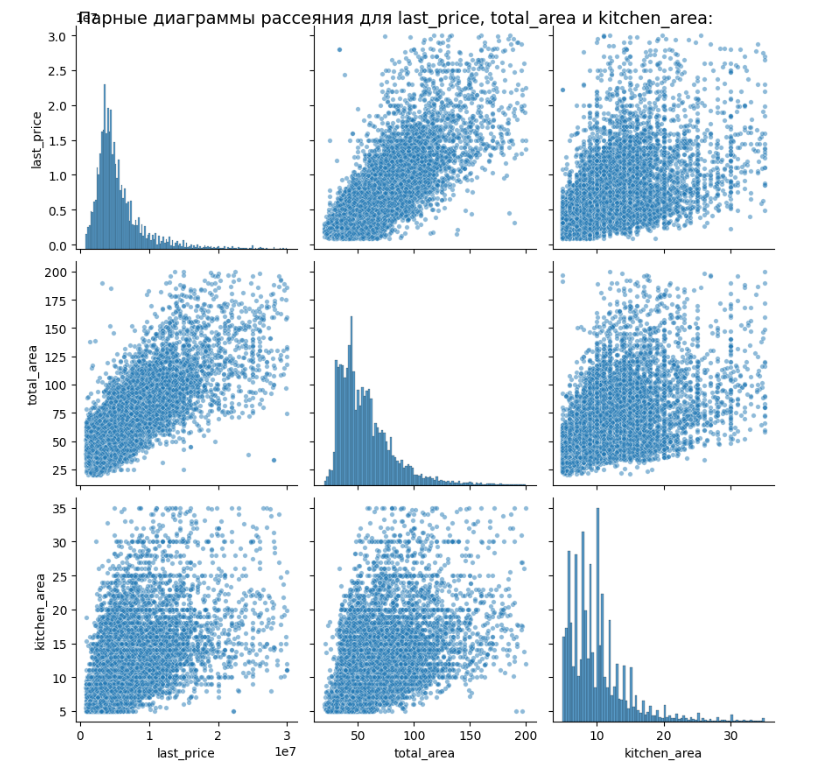

* На стоимость квартиры напрямую влияет общая площадь. Чем больше площадь, тем выше стоимость. Коэффициент корреляции Пирсона = 0.78. Чаще всего встречаются квартиры с площадью от 36 до 56кв.м и ценой от 1.8 млн до 5.7 млн.

* Между жилой площадью и стоимостью квартиры существует прямая связь (положительная корреляция, коэф.Пирсона = 0.66). Не такая сильная как с общей площадью. Примерно до 40 кв.м жилой площади связь ощущается больше, в больших квартирах уже не такая отчетливая связь жилой площади с ценой. 
Чаще всего встречаются квартиры с жилой площадью от 8 до 19кв.м и ценой от 1.8млн до 5.7 млн. 

* Между площадью кухни и стоимостью квартиры положительная корреляция, но слабо выраженная еще слабее чем с общей площадью (коэф.Пирсона = 0.56). Чаще всего встречаются квартиры с площадью кухни от 5 до 8кв.м и ценой от 1.8млн до 5.7 млн, и в том же ценовом диапазоне чуть менее выражен блок кухонь от 8 до 11кв.м

* Также из анализа видна прямая связь между количеством комнат и стоимостью, чем больше комнат - тем больше стоимость:

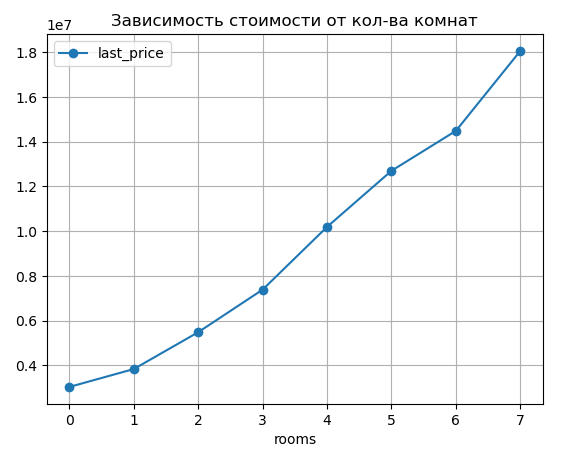

* Дешевле всего стоят объекты, расположенные на первом этаже. Потом подороже стоят квартиры на последнем этаже, и дороже всех "другой этаж"

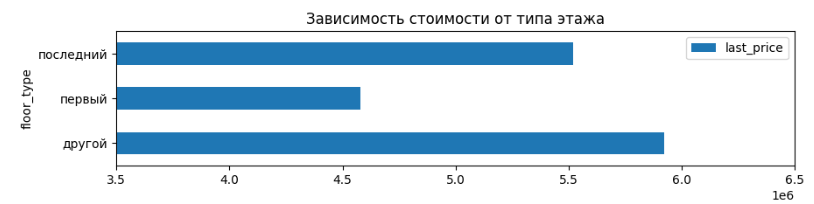

* Дешевле всего выставляют квартиры на продажу в выходные (дешевле на 100-300тысяч)

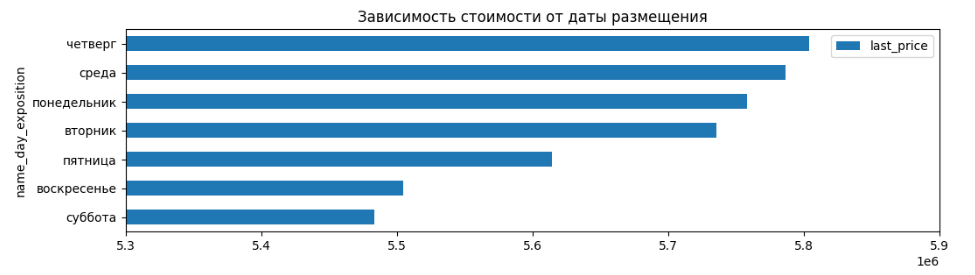

* Дешевле всего выставляют квартиры на продажу в июне (дешевле порядка 300-400тысяч). В остальном стоимость не сильно зависит от месяца размещения.

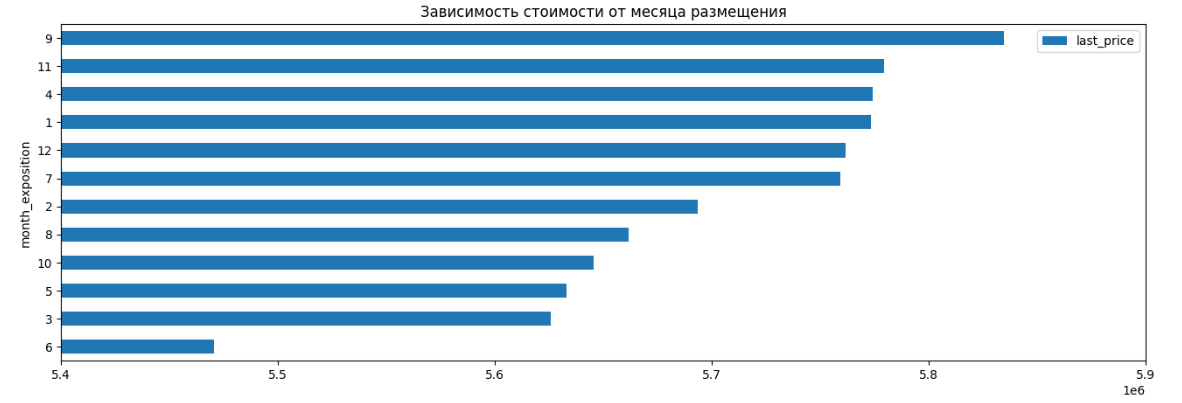

* Для анализа были представлены данные с ноября 2014 по май 2019. Можнно заметить, что с каждым годом с 2014 по 2018 включительно уменьшается средняя стоимость недвижимости, а также с каждым годом увеличивается количество объявлений, только выбивается 2019г, но это из-за того, что данные представлены не за весь год. Выводы по 2019 можно будет сделать, только получив полные данные за год.
  Также видим резкое уменьшение средней площади продаваемых квартир с 2014 по 2016года, далее по годам уменьшение площади продолжалось незначительно.
  
  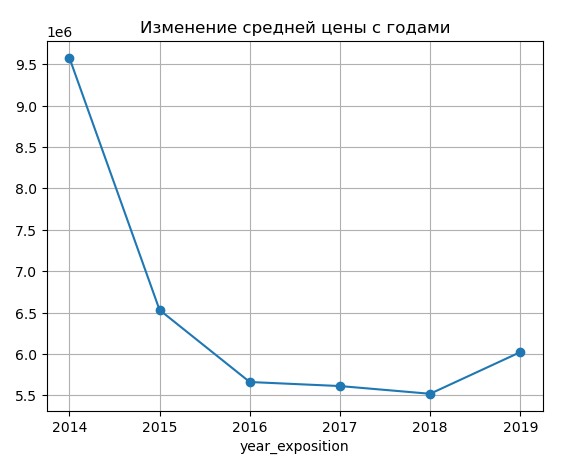
  
  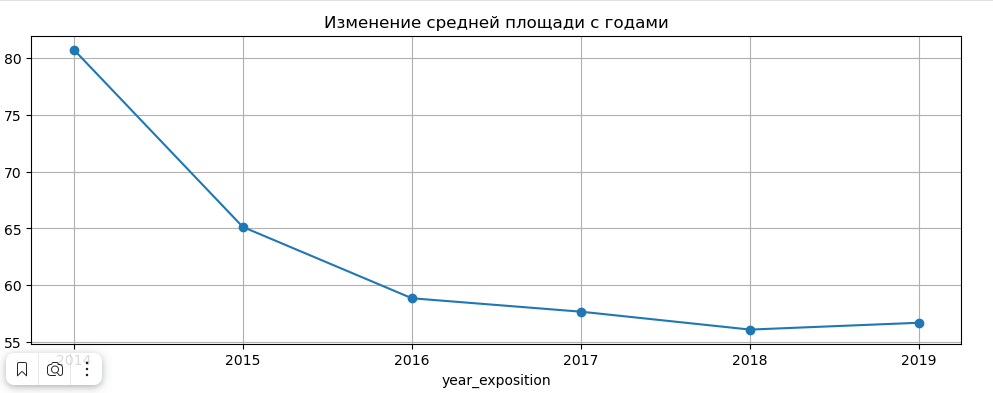
  
* Чем ближе к центру города, тем дороже цена квартиры.

**Средняя цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений:**

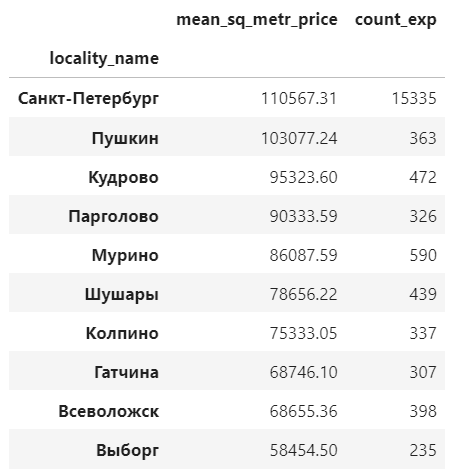

Населенный пункт с самой высокой стоимостью квадратного метра - Санкт-Петербург, цена за кв.м = 110567. Далее идут Пушкин, Кудрово и Парголово.

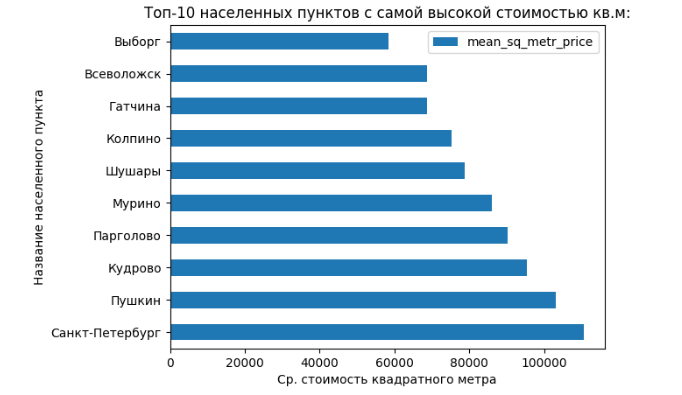

***

#### Дополнительные результаты и выводы исследования:

* Почти для 280 населенных пунктов (содержатся в списке locality_name_list1) отсутсвуют данные в колонках, которые заполняются автоматически на основе картографических данных (напр. `parks_nearest`, `ponds_nearest` и др.)



***
### Рекомендации:

Для определения рыночной стоимости объектов недвижимости следует учитывать населенный пункт, общую и жилую площадь, количество комнат, расстояние до центра города и этаж.
